#  PROJET MACHINE LEARNING EN R SUR DES DONNEES METEOROLOGIQUES

## Introduction

# <FONT COLOR="Red">Épisode 1</font>

## Prise en charge des données

Présentation du jeu de données : La population étudiée dans ce jeu de données est l’ensemble des observations météorologiques d'une station de Météo France. Notre échantillon se compose de 688 stations. Le jeu de données comprend 18 variables statistiques (dont 2 qualitatives et 16 quantitatives). Concernant les variables qualitatives, la date est qualitative ordinale avec 688 modalités, la variable rain_class a 4 modalités (1: high_rain, 2:low_rain, 3:no_rain). 

Les données ont été extraites et mises en forme par le service concerné de Météo France. Elles sont décrites par les variables suivantes :

PARAMETRES METEOROLOGIQUES OBSERVES LE JOUR J:
* **date** : date du jour actuel ;
* **ff** : vitesse du vent (en $m.s^{-1}$);
* **t** :température (en Kelvin K);
* **td** : point de rosée (en K) ;
* **hu** : l'humidité (en %);
* **dd** : direction du vent (en degrés) ;
* **precip** : quantité totale des précipitations ($kg.m^{−2}$) ;

PREVISIONS METEOS DU JOUR SUIVANT PAR LE MODELE AROME:
* **ws_arome** : vitesse du vent (en $m.s^{-1}$);
* **p3031_arome** : direction du vent (en degrés);
* **u10_arome**: composantes du vent d'Ouest à Est prise à 10m de hauteur (en $m.s^{-1}$);
* **v10_arome**:composantes du vent du Sud au Nord prise à 10m de hauteur (en $m.s^{-1}$);
* **t2m_arome**: température à 2mètres du sol (K);
* **d2m_arome**: point de rosée à 2m du sol(K);
* **r_arome**: humidité (en %) ;
* **tp_arome**: quantité totale de précipitations ($kg.m^{−2}$);
* **msl_arome**: pression atmosphérique (en Pa);

VARIABLES REPONSE
* **rain** : quantité totale de précipitation le jour suivant $kg.m^{−2}$;
* **rain_class**: catégorie de précipitations : -no_rain (si rain=0), -low_rain (si 0<rain<2), -high_rain (si rain>2)

## 1. Chargement et mise en forme des données

In [3]:
options(warn=-1) #options(warn=0) pour remettre les warnings

In [4]:
#DECOMMENTER SI BESOIN -- SVP rassemblez toutes les installations de librairies ici

#install.packages("nortest")
#install.packages("MASS")
#install.packages("corrplot")
#install.packages("ggplot2")
#install.packages("FactoMineR")
#install.packages("factoextra")
#install.packages("glmnet")
#install.packages("plotrix") 
#install.packages("ROCR") 

In [5]:
library("nortest")
library("MASS")
library("corrplot")
library("ggplot2")
library("factoextra")
library("FactoMineR") #pour la PCA
library("patchwork") #pour plot 2 ggplots cote à cote 
library("glmnet") #pour faire la regression lasso
library("plotrix") #pour faire des plot (lasso par ex)
library("nnet") #pour la regression logistique multiclasses
library("ROCR") #pour les courbes ROC
library("glmnet")
library("MASS") #pour l'analyse discriminante
library("class") #pour kNN
library("e1071") #pour tunner k dans kNN
library("rpart") #arbre de décision binaire
library("partykit") #visualisation des arbres 
library("randomForest")
library("nnet") #réseaux de neurones
library("e1071") #validation croisée pour réseaux de neurones
library("ramify") #pour calculer l'argmax d'une matrice
library("gbm") #gradient boosting models
library("MLmetrics") #pour calculer le F1_score 

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attachement du package : 'patchwork'


L'objet suivant est masqué depuis 'package:MASS':

    area


Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-3

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqué depuis 'package:ggplot2':

    margin



Attachement du package : 'ramify'


Les objets suivants sont masqués depuis 'package:Matrix':

    tril, triu


L'objet suivant est masqué depuis 'package:graphics':

    clip


Loaded gbm 2.1.8


Attachement du package : 'MLmetrics'


L'objet suivant est masqué depuis 'package:base':

    Recall




In [6]:
# Lecture des données
path <- ""
meteo <- read.table(paste(path, "rain_project.txt", sep = ""), header = TRUE)
meteo<-meteo[,c(2:19)] #supprimer la première colonne 

# Vérification du contenu
head(meteo)

,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2017-06-11,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,2016-03-06,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,2016-07-29,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,2016-05-16,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,2016-02-03,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,2016-12-29,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


In [7]:
# Changement du type des variables qualitatives en facteur et ajout d'une classe mois
meteo[, "rain_class"] <- as.factor(meteo[, "rain_class"]) 
meteo[, "date"] <- months(as.Date(meteo[, "date"])) 
#transforme les données en format date et récupère le mois associé
meteo[, "date"] <- as.factor(meteo[, "date"])
head(meteo)

,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,juin,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,mars,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,juillet,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,mai,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,février,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,décembre,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


## 2. Analyse Unidimensionnelle

Remarquer le type des variables. Il est nécessaire d'en étudier la distribution. Noter la symétrie ou non de celles-ci .

### Analyse proposée par thème :  

1. Imput :

- Les variables relatives à la vitesse du vent (ff_mod, ws_arome_mod) 
- les variables relatives aux précipitations (precip_mod et tp_arome)
- Les variables relatives à la température et au point de rosée (t_mod, td_mod, t2m_arome_mod et d2m_arome_mod)
- Les variables relatives à la direction du vent (dd_mod, p3031_arome_mod, u10_arome, v10_arome)
- Les variables relatives à l'humidité (hu et r_arome)
- pression atmosphérique (msl arome)

2. Output : 

- rain et rain class 


Pour chaque variable 

- tracer histogramme (ou regarder ci-dessus mais c'est un peu petit) + fonction de répartition + boxplot

- ou pie chart et barplot si variable qualitative 

- donner une interprétation de la distribution.

In [8]:
summary(meteo)

       date           ff               t               td       
 juillet : 62   Min.   : 1.158   Min.   :269.5   Min.   :267.1  
 mars    : 62   1st Qu.: 2.870   1st Qu.:279.9   1st Qu.:277.6  
 janvier : 61   Median : 3.859   Median :283.2   Median :281.2  
 juin    : 59   Mean   : 4.082   Mean   :283.7   Mean   :281.1  
 novembre: 59   3rd Qu.: 4.970   3rd Qu.:287.6   3rd Qu.:284.7  
 mai     : 58   Max.   :12.500   Max.   :299.5   Max.   :291.1  
 (Other) :327                                                   
       hu               dd             precip          ws_arome      
 Min.   : 46.75   Min.   : 32.92   Min.   : 0.000   Min.   : 0.9675  
 1st Qu.: 80.53   1st Qu.:158.74   1st Qu.: 0.000   1st Qu.: 2.6220  
 Median : 86.40   Median :222.81   Median : 0.400   Median : 3.4432  
 Mean   : 85.56   Mean   :206.58   Mean   : 2.384   Mean   : 3.7193  
 3rd Qu.: 92.06   3rd Qu.:260.68   3rd Qu.: 2.600   3rd Qu.: 4.5827  
 Max.   :100.00   Max.   :343.04   Max.   :34.500   Max.   :

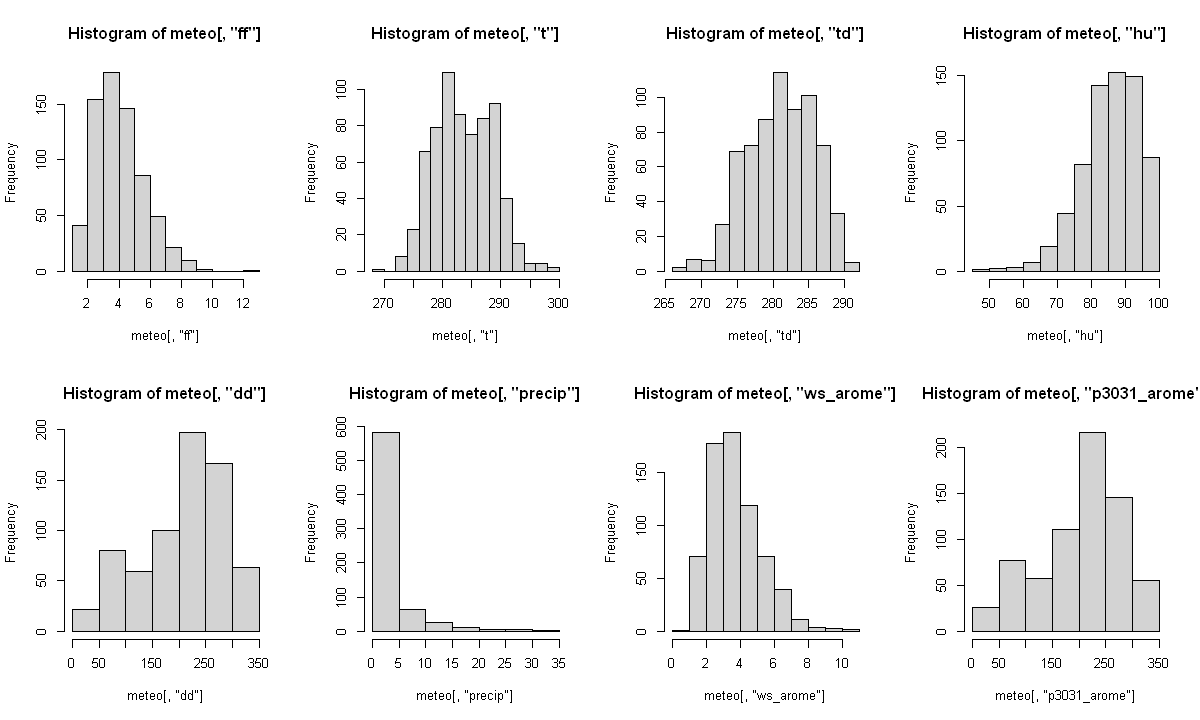

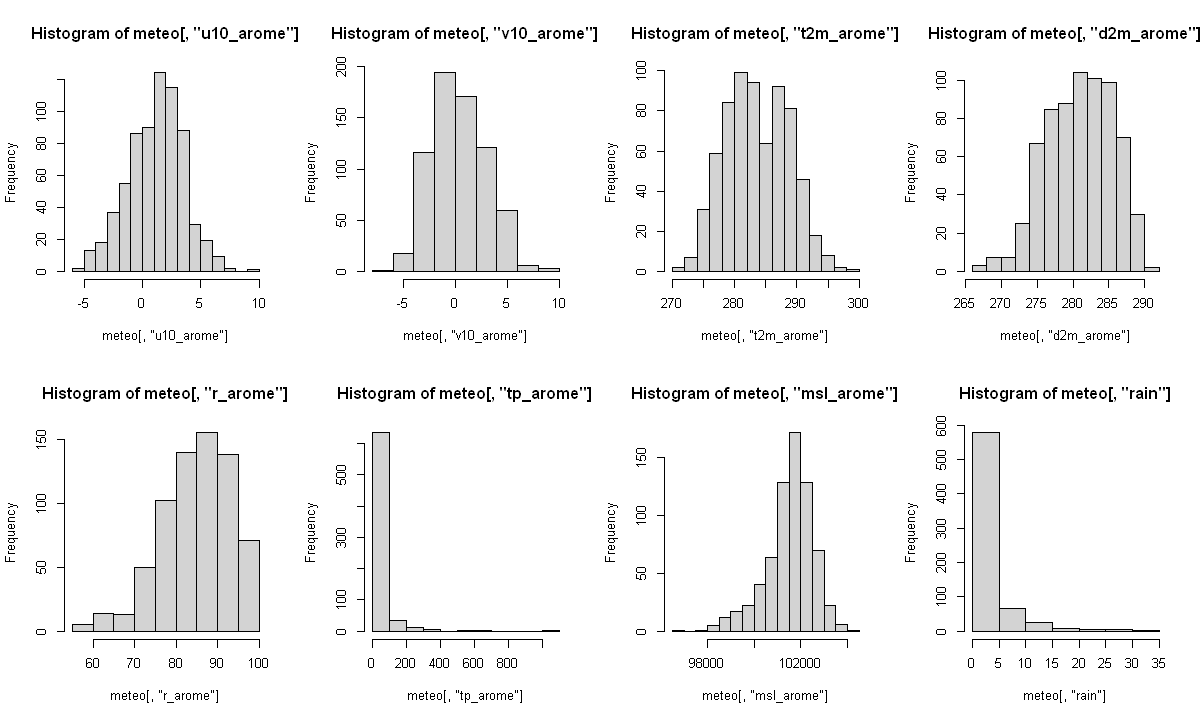

In [9]:
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow = c(2,4))
hist(meteo[, "ff"])
hist(meteo[, "t"])
hist(meteo[, "td"])
hist(meteo[, "hu"])
hist(meteo[, "dd"])
hist(meteo[, "precip"])
hist(meteo[, "ws_arome"])
hist(meteo[, "p3031_arome"])

par(mfrow = c(2,4))
hist(meteo[, "u10_arome"])
hist(meteo[, "v10_arome"])
hist(meteo[, "t2m_arome"])
hist(meteo[, "d2m_arome"])
hist(meteo[, "r_arome"])
hist(meteo[, "tp_arome"])
hist(meteo[, "msl_arome"])
hist(meteo[, "rain"])

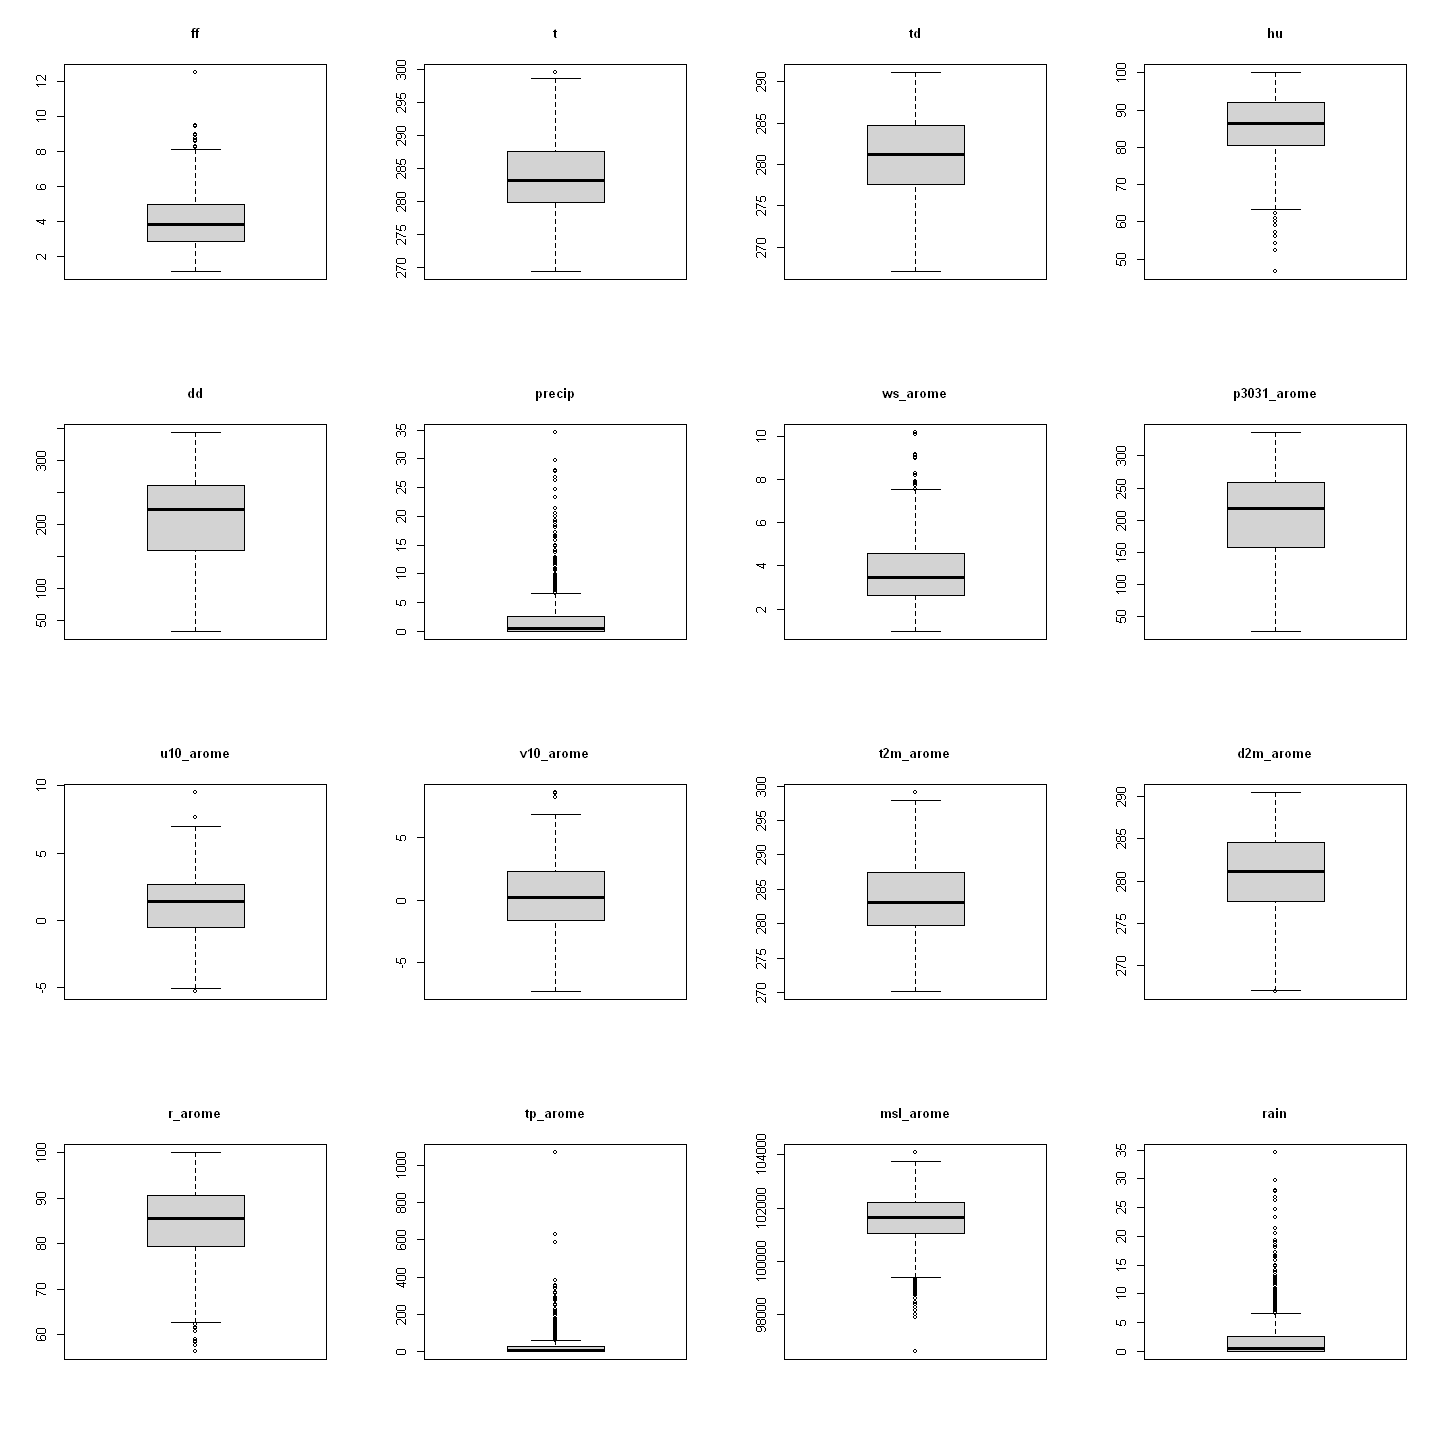

In [10]:
### Boxplots sur les variables pas encore modifiées (pour faciliter l'interprétation)
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(4,4))
for (i in 2:17){
    boxplot(meteo[,names(meteo)[i]], main = names(meteo)[i],cex.main = 1)
    }

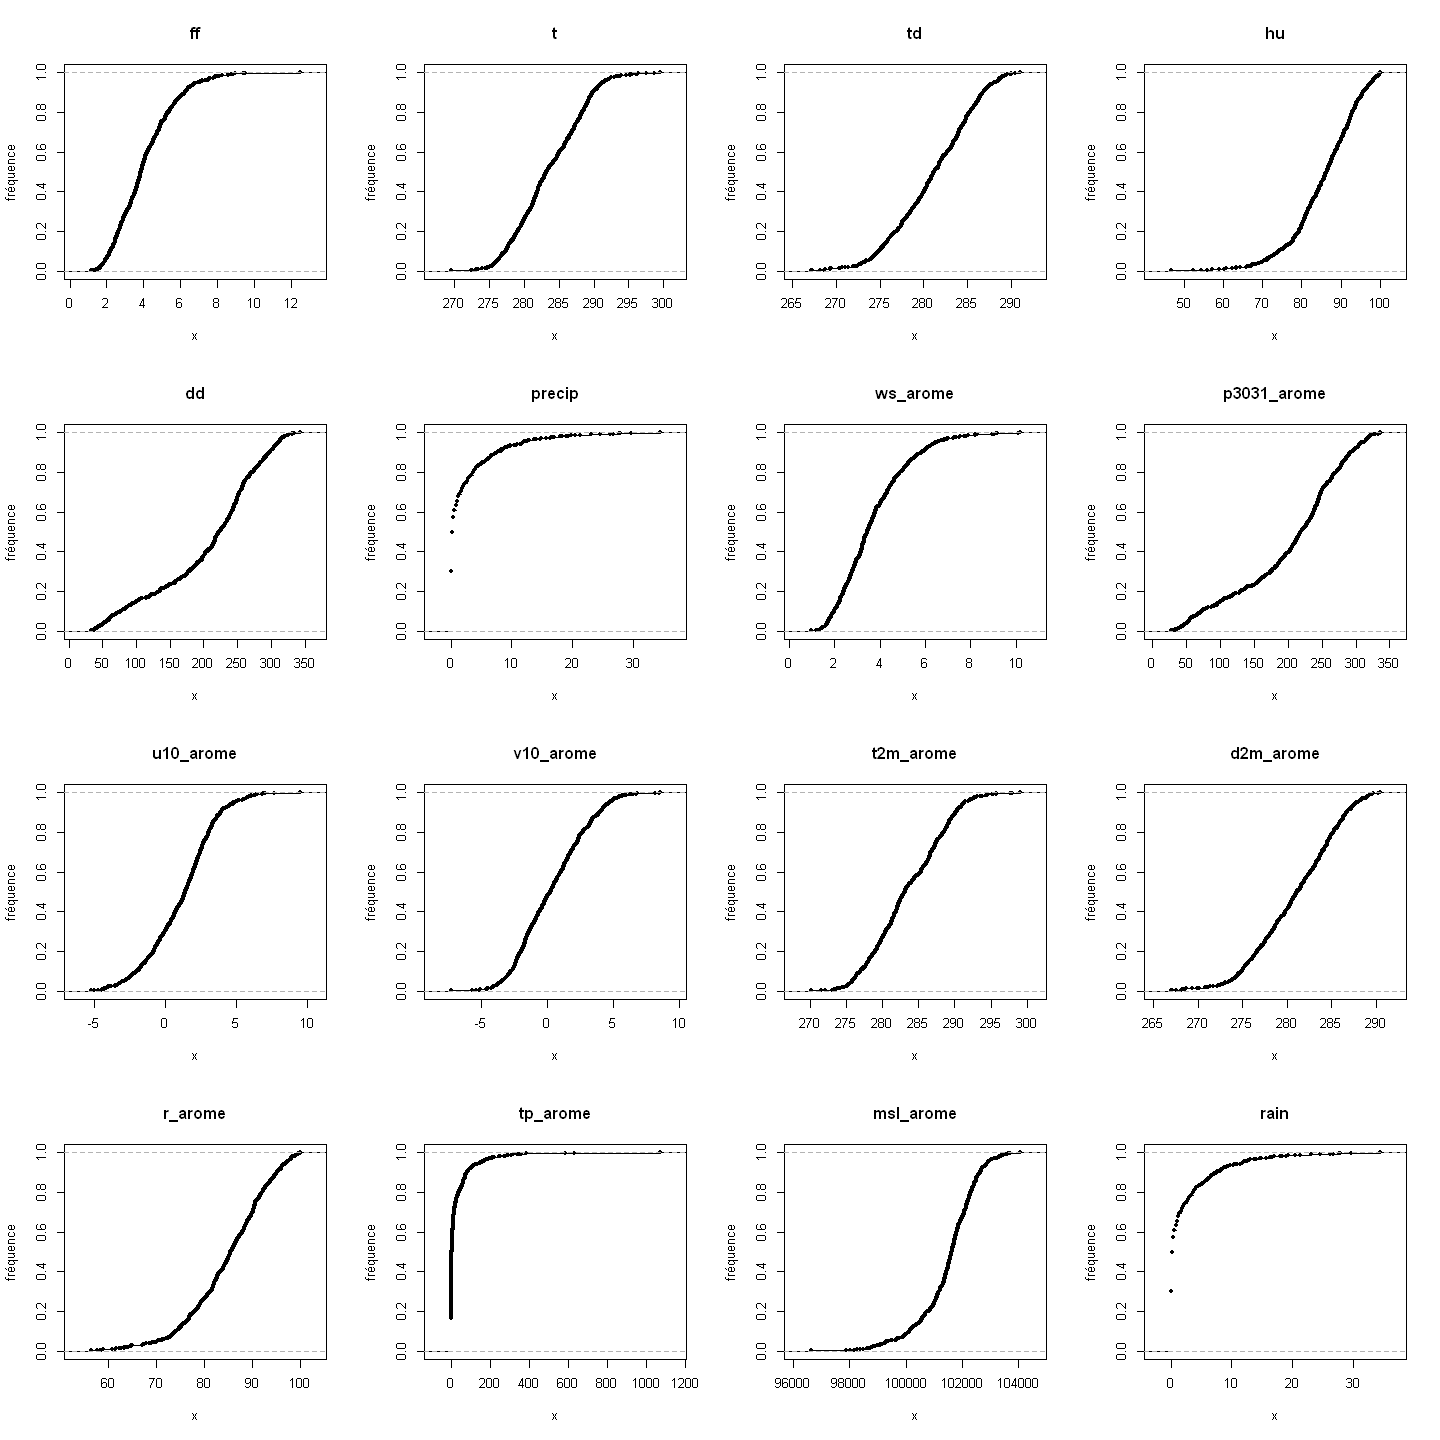

In [11]:
### Fonctions de répartition
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(4,4))
for (i in 2:17){
    plot.ecdf(x=meteo[,names(meteo)[i]],main=names(meteo)[i],ylab="fréquence")
    }

### Analyse unidimensionelle des variables d'entrée :

 <FONT COLOR="Blue"> 
Au vu des graphiques précédents, on établi une analyse unidimensionnelle pour chacune des variables. 

**Les variables relatives à la vitesse du vent :**

- **ff** : vitesse du vent le jour J (en $m.s^{-1}$) : la vitesse du vent ressemble à une distribution gaussienne, environ 175 individus ont une valeur de ff autour de la moyenne qui est de $4 m.s^{-1}$. L’étendue et l’écart interquartiles sont assez faibles. On observe quelques outliers dans les valeurs hautes. La force du vent est donc en général assez constante et basse sauf pour quelques dates où elle est plus importante. 

- **ws_arome** : vitesse du vent prédite pour le lendemain (en $m.s^{-1}$) : Globalement on peut faire les mêmes observations que sur *ff*, à la différence que ws_arome prend des valeurs un peu plus basses en terme de moyenne mais aussi de valeurs extrêmes (son maximum est par exemple de $10 m.s^{-1}$ contre $12 m.s^{-1}$ pour *ff*). On peut se poser la question de si le modèle AROME a tendence à sous-estimer la force du vent mais dans l'ensemble la prédiction semble correcte. 

**Les variables relatives aux précipitations :**
- **precip** : quantité totale des précipitations le jour J ($kg.m^{−2}$) : En moyenne les précipitations sont très faibles, la médiane des observations est à $0.4 kg.m^{−2}$. La distribution a une forme exponentielle. Elle est fortement impactée par des valeurs extrêmes, il y a un nombre important d'outliers et le maximum de précipitations est de  $34.5 kg.m^{−2}$

- **tp_arome**: quantité totale de précipitations prédite pour le lendemain($kg.m^{−2}$) : En comparaison avec *precip*, l'étendue et l'écart interquartile sont plus ressérés. Il y a également beaucoup d'outliers et on observe des valeurs extrêmes (maximum à $1069 kg.m^{−2}$ qui semblent aberrantes. Le modèle AROME semble avoir du mal à fournir des prédictions correctes en cas de fortes précipitations. 

**Les variables relatives à la température et au point de rosée :**
- **t** et **t2m_arome** :température le jour J et prédite pour le jour suivant (en Kelvin K): Ces deux variables ont une distribution très similaire, qui ressemble à une gaussienne, sans valeurs extrêmes avec une moyenne de 283 K. Dans l'ensemble la donnée de température ne varie donc pas beaucoup. 

- **td** et **d2m_arome** : point de rosée le jour J et prédite pour le jour suivant (en K) : Mêmes observations que pour *t* et *t2m_arome*

**Les variables relatives à la direction du vent :**
- **dd** et **p3031_arome**: direction du vent le jour J et prédite pour le jour suivant(en degrés) : Ces deux variables ont une distribution très similaire qui ressemble à une gaussienne avec une moyenne (218 degrés) et une médiane (203 degrés) décalées vers les valeurs hautes. L'étendue est très importante et il n'y a pas d'outlier. La direction du vent change beaucoup d'un jour sur l'autre mais le modèle AROME en fournit quand même une bonne prédiction.


- **u10_arome** et **vu10_arome**: composantes U du vent (d'Ouest en Est) et V (du Sud au Nord), prise à 10m de hauteur et prédites pour le jour suivant (en $m.s^{-1}$): Sur ces deux variables la distribution ressemble à une gaussienne, l'étendue est faible. Les composantes U et V restent relativement constantes. 

**Les variables relatives à l'humidité :**
- **hu** et **r_arome** : humidité le jour J et prédite pour le jour suivant (en %) : La distribution a une forme de gaussienne avec la moyenne (de 85%) décalée vers les grandes valeurs et une queue assez importante qui s'étend sur les faibles valeurs (minimum à 50%). L'étendue est importante, on a donc une forte variation de l'humidité au cours de l'année. La prédiction fournit par AROME semble très correcte. 

**La variable relative à la pression atmosphérique :**

- **msl_arome**: pression atmosphérique (en Pa) : La distribution a une forme de gaussienne très bien centrée. Il y a beaucoup d'outliers sur les valeurs basses, ces valeurs sont aberrantes au vu de la régularité du reste de la distribution.</font>

In [12]:
# Fonction permettant l'affichage des pourcentages dans les pie charts
text_pie = function(vector,labels=c(),cex=1) {
    vector = vector/sum(vector)*2*pi; temp = c()
    j = 0; l = 0
    for (i in 1:length(vector)) {
    k = vector[i]/2; j = j+l+k; l = k
    text(cos(j)/2,sin(j)/2,paste(labels[i],"%"),cex = 1)}
    vector = temp 
}

In [13]:
summary(meteo[,"rain_class"])[1]/nrow(meteo)

high_rain 
0.2732558

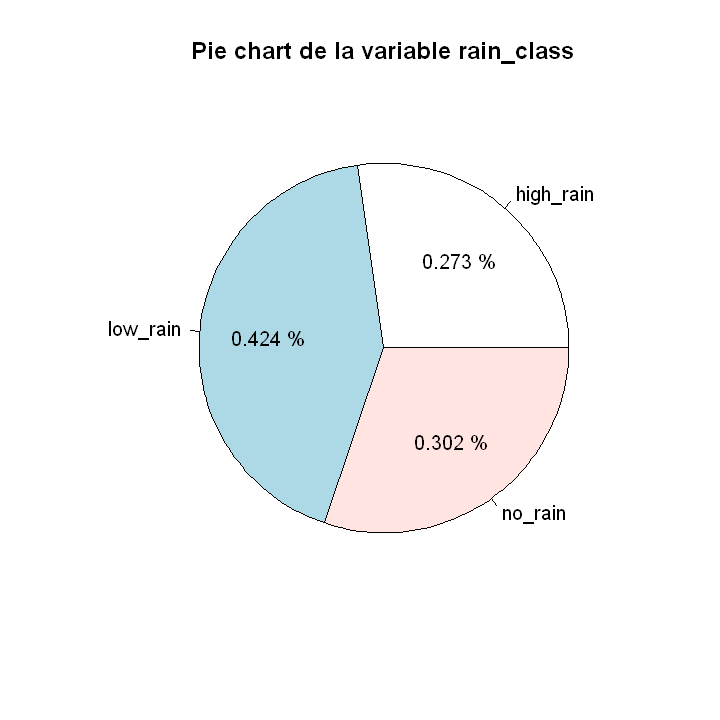

In [14]:
options(repr.plot.width = 6, repr.plot.height = 6)
n = nrow(meteo)
percent_class = round(summary(meteo[,"rain_class"])/nrow(meteo),3)
pie(table(meteo[,"rain_class"]),main = "Pie chart de la variable rain_class")
text_pie(percent_class, strsplit(toString(percent_class), ", ")[[1]], cex=0.9)

### Analyse unidimensionelle des variables de sortie :
- <FONT COLOR = "blue"> **rain** : quantité totale de précipitation le jour suivant $kg.m^{−2}$ : La distribution ressemble a une forme d'exponentielle décroissante. La médiane (de $0.4 kg.m^{−2}$) et la moyenne (de $2.3 kg.m^{−2}$ sont très basses et l'étendue est très faible. Mais on observe un très grand nombre d'outliers. On peut remettre en question l'efficacité du modèle AROME pour prédire la variable rain_mod lorsque la quantité de pluie est importante. 

- <FONT COLOR = "blue"> **rain_class**: catégorie de précipitations : no_rain (si rain=0), low_rain (si 0<rain<2), high_rain (si rain>2). Chaque modalité représente environ un tier des observations. Au cours de l'année on a donc à peu près à parts égales des pluies fortes, moyennes et nulles. 

### Transformation des données : 
Au vue des observations précédentes, des transformations sont proposées pour rendre certaines distributions plus symétriques et ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir de modélisation (linéaires), par pour toutes (arbres). Ci-dessous le code des transformations et le résultat obtenu : 

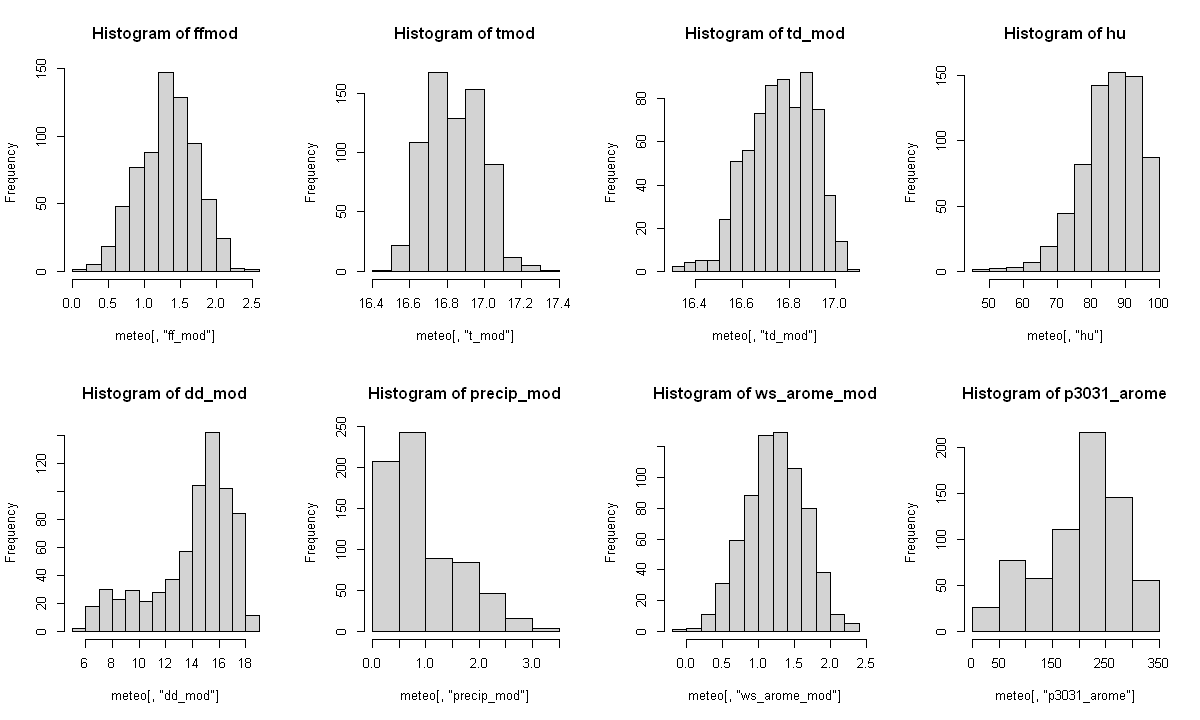

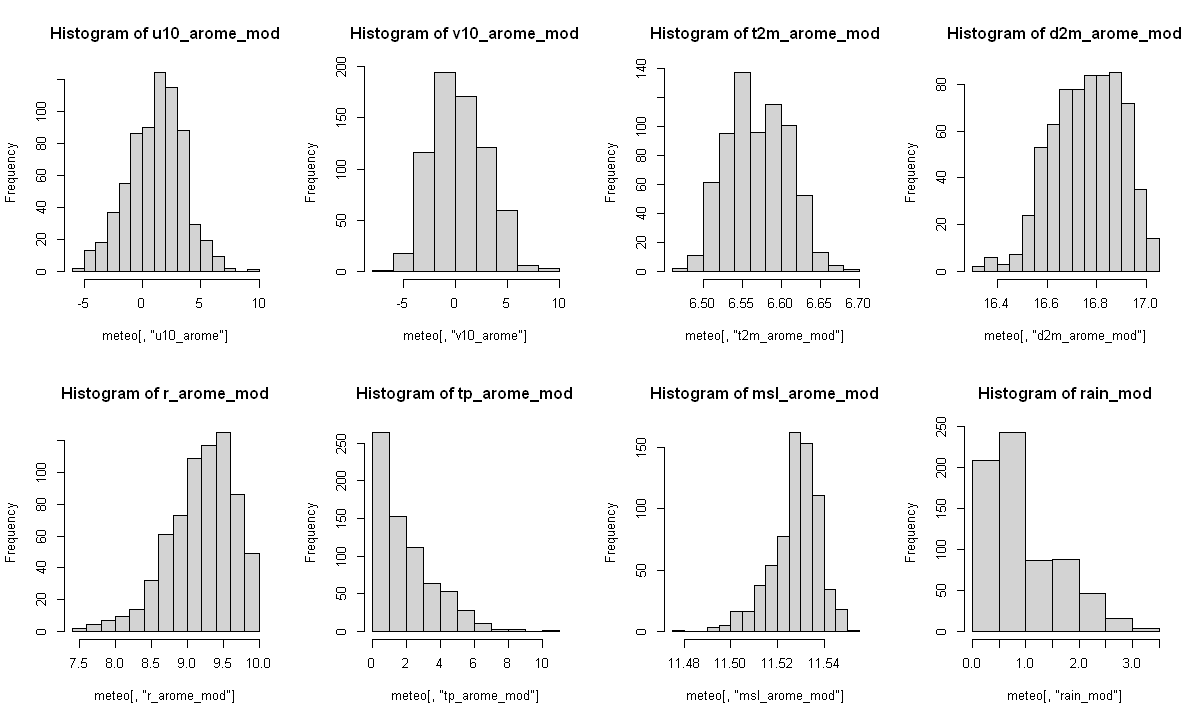

In [15]:
meteo[, "ff_mod"] <- log(meteo[, "ff"]) 
meteo[, "t_mod"] <- sqrt(meteo[, "t"])
meteo[, "td_mod"] <- sqrt(meteo[, "td"]) 
meteo[, "dd_mod"] <- sqrt(meteo[, "dd"])
meteo[, "precip_mod"] <- (meteo[, "precip"])**(1/3) 
meteo[, "ws_arome_mod"] <- log(meteo[, "ws_arome"])
meteo[, "p3031_arome_mod"] <- sqrt(meteo[, "p3031_arome"])
meteo[, "r_arome_mod"] <- sqrt(meteo[, "r_arome"])
meteo[, "tp_arome_mod"] <- (meteo[, "tp_arome"])**(1/3)
meteo[, "msl_arome_mod"] <- log(meteo[, "msl_arome"])
meteo[, "rain_mod"] <- (meteo[, "rain"])**(1/3) 
meteo[, "t2m_arome_mod"] <- (meteo[, "t2m_arome"])**(1/3)
meteo[, "d2m_arome_mod"] <- sqrt(meteo[, "d2m_arome"])
# pas de modif sur hu, u10_arome, v10_arome
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow = c(2,4))
hist(meteo[, "ff_mod"], main = paste("Histogram of ffmod"))
hist(meteo[, "t_mod"], main = paste("Histogram of tmod"))
hist(meteo[, "td_mod"], main = paste("Histogram of td_mod"))
hist(meteo[, "hu"], main = paste("Histogram of hu"))
hist(meteo[, "dd_mod"], main = paste("Histogram of dd_mod"))
hist(meteo[, "precip_mod"], main = paste("Histogram of precip_mod"))
hist(meteo[, "ws_arome_mod"], main = paste("Histogram of ws_arome_mod"))
hist(meteo[, "p3031_arome"], main = paste("Histogram of p3031_arome"))

par(mfrow = c(2,4))
hist(meteo[, "u10_arome"], main = paste("Histogram of u10_arome_mod"))
hist(meteo[, "v10_arome"], main = paste("Histogram of v10_arome_mod"))
hist(meteo[, "t2m_arome_mod"], main = paste("Histogram of t2m_arome_mod"))
hist(meteo[, "d2m_arome_mod"], main = paste("Histogram of d2m_arome_mod"))
hist(meteo[, "r_arome_mod"], main = paste("Histogram of r_arome_mod"))
hist(meteo[, "tp_arome_mod"], main = paste("Histogram of tp_arome_mod"))
hist(meteo[, "msl_arome_mod"], main = paste("Histogram of msl_arome_mod"))
hist(meteo[, "rain_mod"], main = paste("Histogram of rain_mod"))

#meteo[, "LNO"] <- log(meteo[, "NO"])
#on remplace les colonnes de LNO, LNO2, SRMH20 ==> transformation racinaire et logarithmique des données 

In [16]:
ordre = c("date","ff_mod","t_mod","td_mod","hu","dd_mod","precip_mod","ws_arome_mod","p3031_arome_mod",
        "u10_arome","v10_arome","t2m_arome_mod","d2m_arome_mod","r_arome_mod",
        "tp_arome_mod","msl_arome_mod","rain_mod", "rain_class")

In [17]:
meteo_mod<-meteo[,ordre] #réarrange les données dans l'ordre initial
ncol(meteo_mod)
summary(meteo_mod)

[1] 18

       date         ff_mod          t_mod           td_mod     
 juillet : 62   Min.   :0.147   Min.   :16.42   Min.   :16.34  
 mars    : 62   1st Qu.:1.054   1st Qu.:16.73   1st Qu.:16.66  
 janvier : 61   Median :1.350   Median :16.83   Median :16.77  
 juin    : 59   Mean   :1.331   Mean   :16.84   Mean   :16.76  
 novembre: 59   3rd Qu.:1.604   3rd Qu.:16.96   3rd Qu.:16.87  
 mai     : 58   Max.   :2.526   Max.   :17.31   Max.   :17.06  
 (Other) :327                                                  
       hu             dd_mod         precip_mod      ws_arome_mod     
 Min.   : 46.75   Min.   : 5.737   Min.   :0.0000   Min.   :-0.03309  
 1st Qu.: 80.53   1st Qu.:12.599   1st Qu.:0.0000   1st Qu.: 0.96394  
 Median : 86.40   Median :14.927   Median :0.7368   Median : 1.23641  
 Mean   : 85.56   Mean   :14.044   Mean   :0.8420   Mean   : 1.23322  
 3rd Qu.: 92.06   3rd Qu.:16.145   3rd Qu.:1.3751   3rd Qu.: 1.52228  
 Max.   :100.00   Max.   :18.521   Max.   :3.2554   Max.   : 2

## 3. Analyse Bidimensionnelle

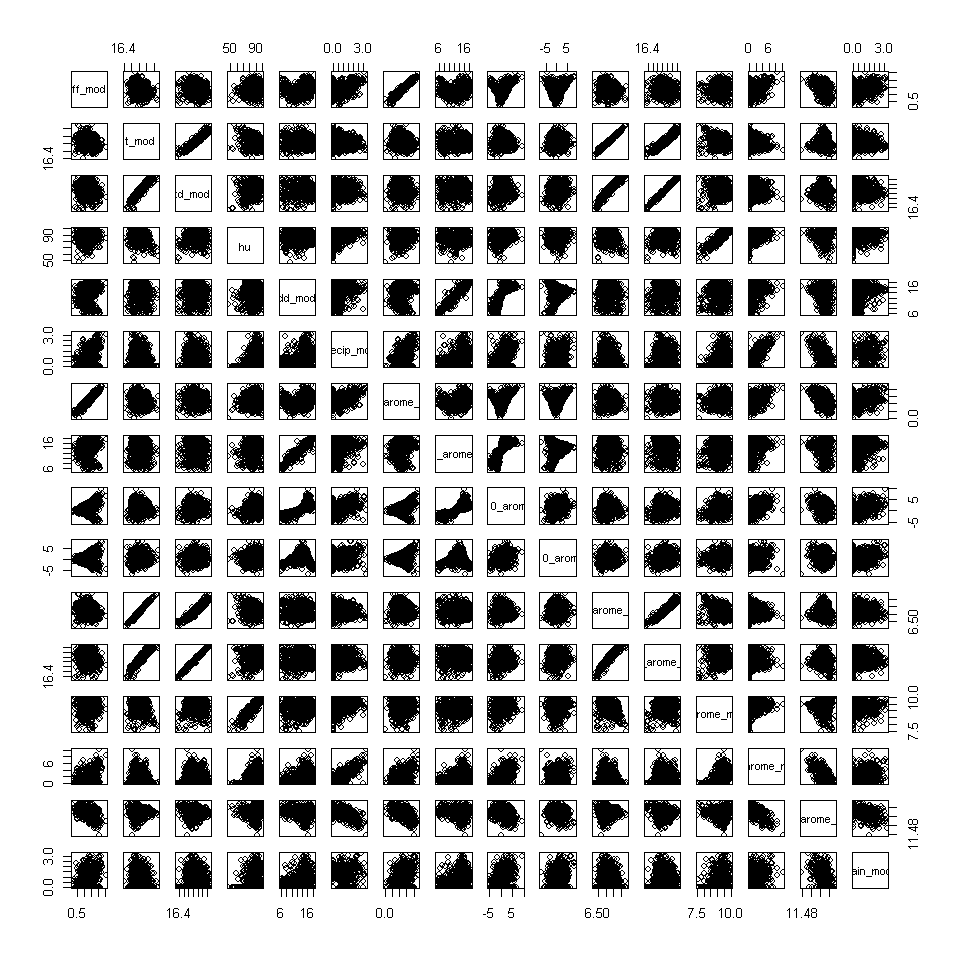

In [18]:
options(repr.plot.width = 8, repr.plot.height = 8)
pairs(meteo_mod[, c(2:17)])

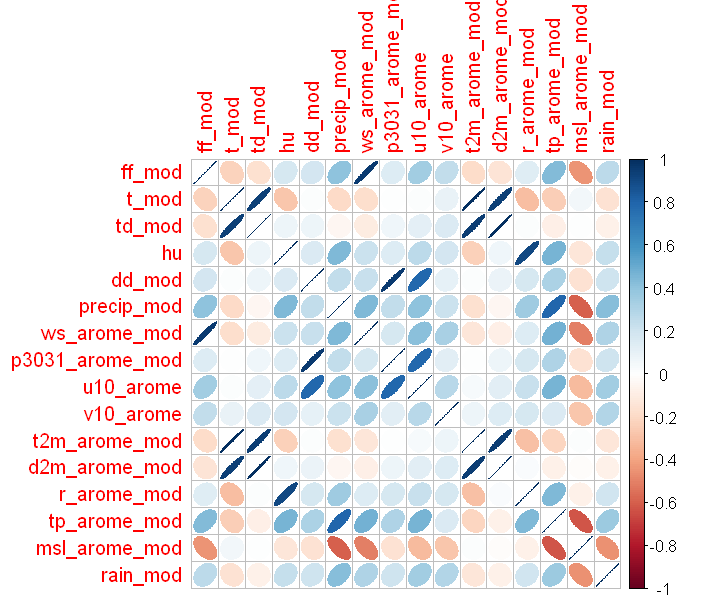

In [19]:
options(repr.plot.width = 6, repr.plot.height = 5)
corr=cor(meteo_mod[, c(2:17)]) #prendre que les variables quantitatives !!! 
corrplot(corr, method="ellipse")
options(repr.plot.width = 8, repr.plot.height = 8)
#plus le nuage de points est dissipé moins il y a de corrélation
#but de l'ACP : éliminer les var redondantes 

**Q** Que dire sur les relations des varibles 2 à 2 ?
Au vu des deux graphiques précédents, les groupes de variables corrélées sont : 
<FONT COLOR = "blue"> 
- la température au jour j et le jour suivant (t_mod et t2m_arome_mod), le point de rosée au jour j et le jour suivant (td_mod et d2m_arome_mod)
- la vitesse du vent le jour j (ff_mod) et celle du jour suivant (ws_arome_mod)
- la direction du vent au jour J (dd_mod) et le jour suivant (p3031_arome_mod),les composantes du vent d'ouest le jour suivant (u10_arome)
- l'humidité au jour J (hu) et au jour suivant (r_arome)
- les précipitations au jour J (precip_mod), et la quantité totale de précipitations prévues pour le jour suivant (tp_arome)

## 4. Analyse en Composantes Principales

Les commandes suivantes permettent de réaliser une [analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) sur les seules variables quantitatives, on retire donc la variable rain_mod qui est à expliquer

In [20]:
#Pour réaliser l'ACP on enlève la variable à expliquer : rain_mod 
#mais il reste la variable à expliquer rain_class qui est qualitative
meteo_acp <- meteo_mod[,-17] 

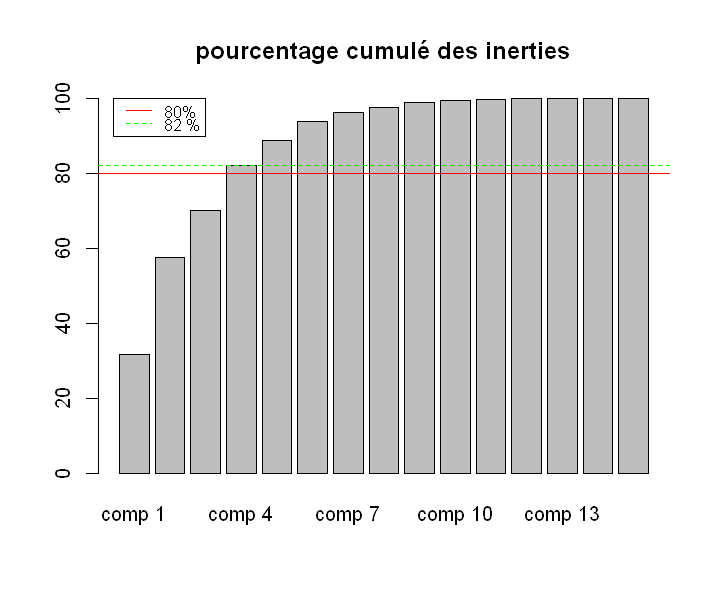

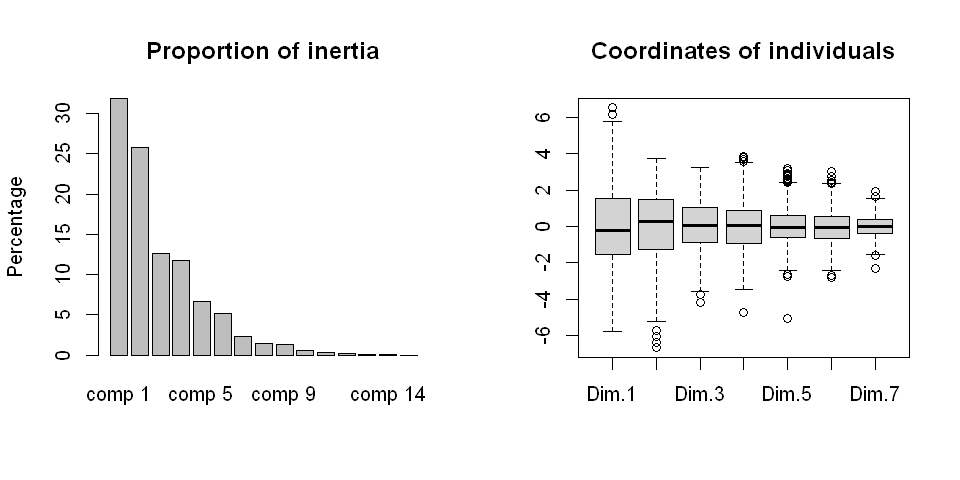

In [21]:
# ACP réduite
# Décroissance des valeurs propres
#acp <- PCA(meteo_mod[,c(2:16)], scale.unit = TRUE, ncp=7, graph = FALSE, quali.sup=c(1))
acp <- PCA(meteo_acp, scale.unit = TRUE, ncp=7, graph = FALSE, quali.sup=c(1,17)) 
#on prend toutes les variables quantitatives sauf celles à expliquer : ici rain_mod.
#ncp : 7 dimension kept 
#quali.sup : indique les indices des var supplémentaires qualitatives (1 : date et 17 : rain_class)
#quanti.sup sera juste visualisée mais pas utilisée dans l'acp pour la construction des axes

#Pour expliquer 80% de la variance on va garder 5 composantes. 
options(repr.plot.width = 6, repr.plot.height = 5)
barplot(acp$eig[,"cumulative percentage of variance"],main="pourcentage cumulé des inerties")
abline(80, 0, col="red")
abline(acp$eig[,"cumulative percentage of variance"][4], 0, col="green",lty=2)
legend(x=0,y=100,legend=c("80%", paste(round(acp$eig[,"cumulative percentage of variance"][4]),"%")),
       col=c("red", "green"), lty=1:2, cex=0.8)

options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
barplot(acp$eig[, 2], ylab = "Percentage", main = "Proportion of inertia")
boxplot(acp$ind$coord, main = "Coordinates of individuals")


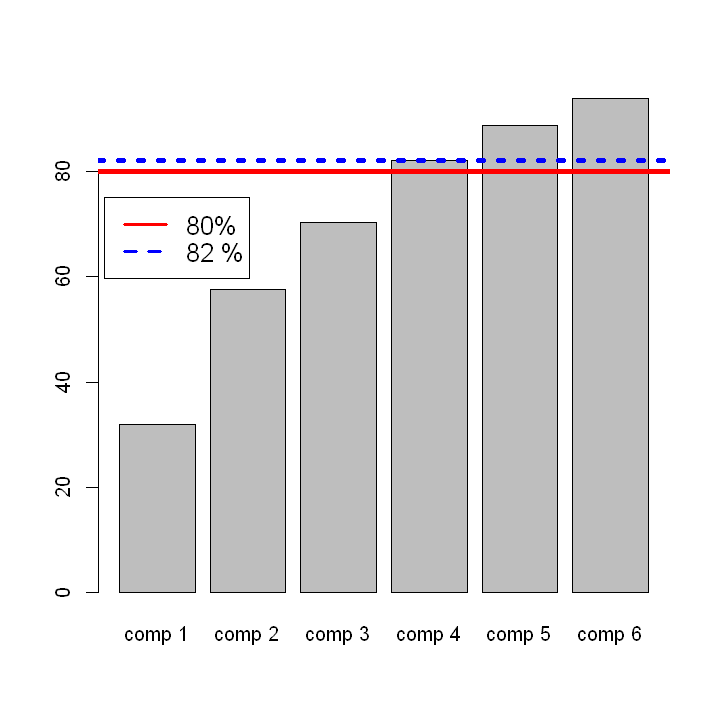

In [22]:
options(repr.plot.width = 6, repr.plot.height = 6)
barplot(acp$eig[,"cumulative percentage of variance"][1:6],main="")
abline(80, 0, col="red",lwd = 4)
abline(acp$eig[,"cumulative percentage of variance"][4], 0, col="blue",lty=3,lwd = 4)
legend(x=0,y=75,legend=c("80%", paste(round(acp$eig[,"cumulative percentage of variance"][4]),"%")),
       col=c("red", "blue"), lty=1:3, cex=1.3,lwd=3)

<FONT COLOR = "blue"> **Analyse :** 
L'analyse des graphiques suggère de garder les 4 premières composantes de l'ACP pour réduire la dimension sans perdre une quantité trop imporante d'information. 
En effet, sur le graphique des pourcentages cumulées d'intertie, on voit qu'avec 4 composantes on explique 83% de l'inertie. 
On peut aussi observer sur les boxplots que la variance est beaucoup plus importante sur les 4 premiers boxplots que sur les suivants. 

### <FONT COLOR="Red">Du coup, est-ce qu'il faut redéfinir l'ACP avec ncp=4 ?</font>
acp <- PCA(meteo_acp, scale.unit = TRUE, ncp=4, graph = FALSE, quali.sup=c(1,17)) 

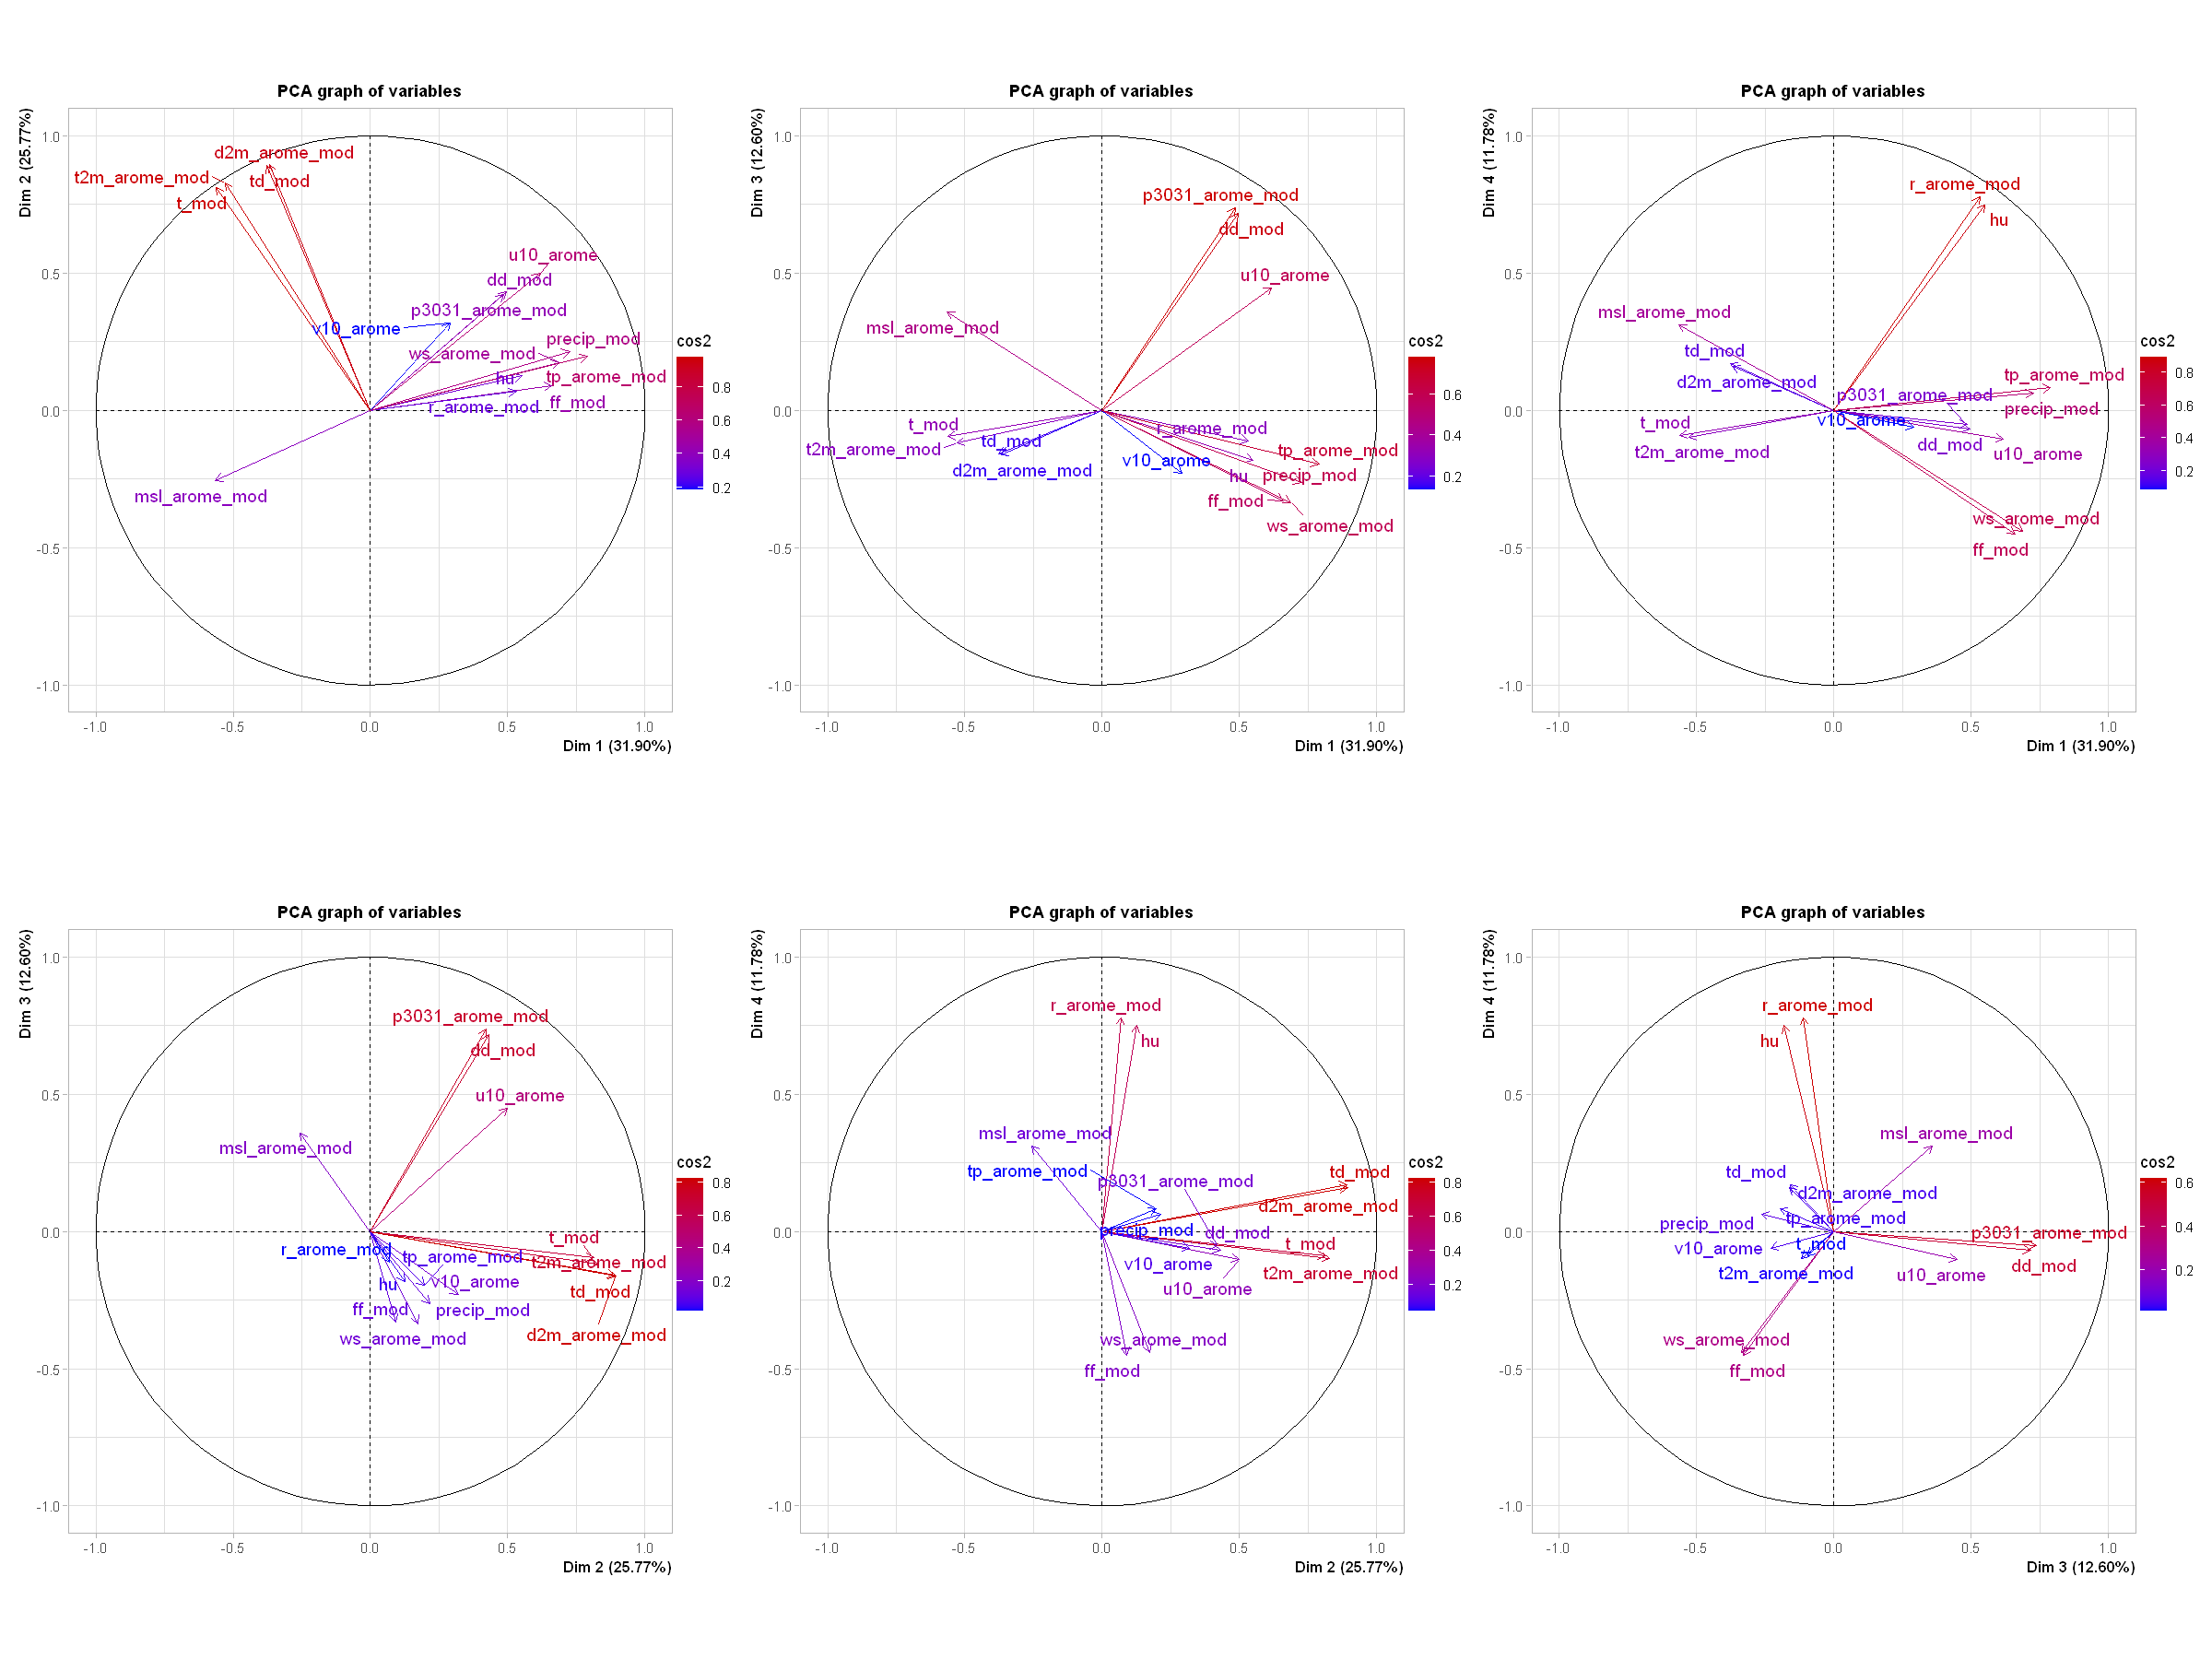

In [23]:
options(repr.plot.width = 20, repr.plot.height = 15)
c1.2 <- plot(acp, choix = "varcor", axes=c(1,2), habillage="cos2")
c1.3 <- plot(acp, choix = "varcor", axes=c(1,3), habillage="cos2")
c1.4 <- plot(acp, choix = "varcor", axes=c(1,4), habillage="cos2")
c2.3 <- plot(acp, choix = "varcor", axes=c(2,3), habillage="cos2")
c2.4 <- plot(acp, choix = "varcor", axes=c(2,4), habillage="cos2")
c3.4 <- plot(acp, choix = "varcor", axes=c(3,4), habillage="cos2")
# utilisation de la librairie patchwork pour le plot
(c1.2 | c1.3 | c1.4) / 
(c2.3 | c2.4 | c3.4) 

<FONT COLOR = "blue"> **Analyse :** 
Le graphe PCA des individus permet d'observer les mêmes corrélations entre les variables que sur le corrplot. 

Variables bien projetées sur la **dimension 1** : 
- Les variables relatives à la vitesse du vent (ff_mod, ws_arome_mod) 
- les variables relatives aux précipitations (precip_mod et tp_arome)

Variables bien projetées sur la **dimension 2** :
- Les variables relatives à la température et au point de rosée (t_mod, td_mod, t2m_arome_mod et d2m_arome_mod)

Variables bien projetées sur la **dimension 3** :
- Les variables relatives à la direction du vent (dd_mod, p3031_arome_mod, u10_arome)

Variables bien projetées sur la **dimension 4** :
- Les variables relatives à l'humidité (hu et r_arome)


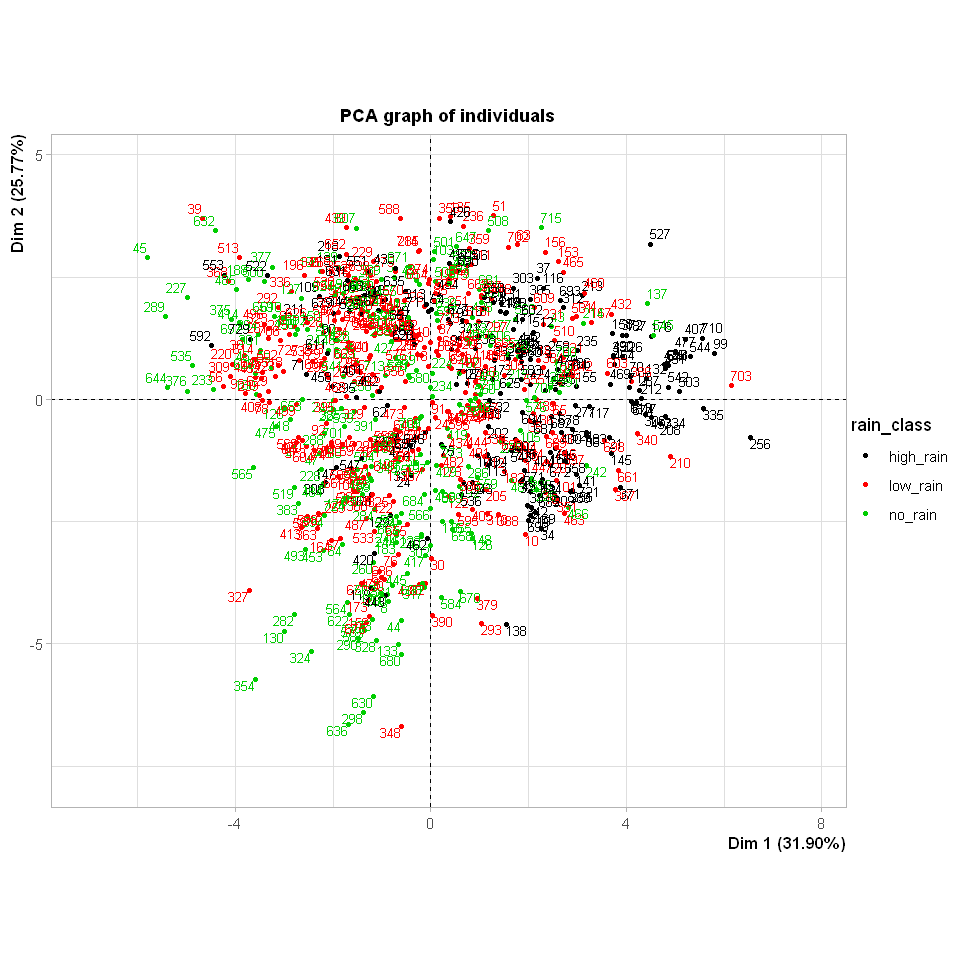

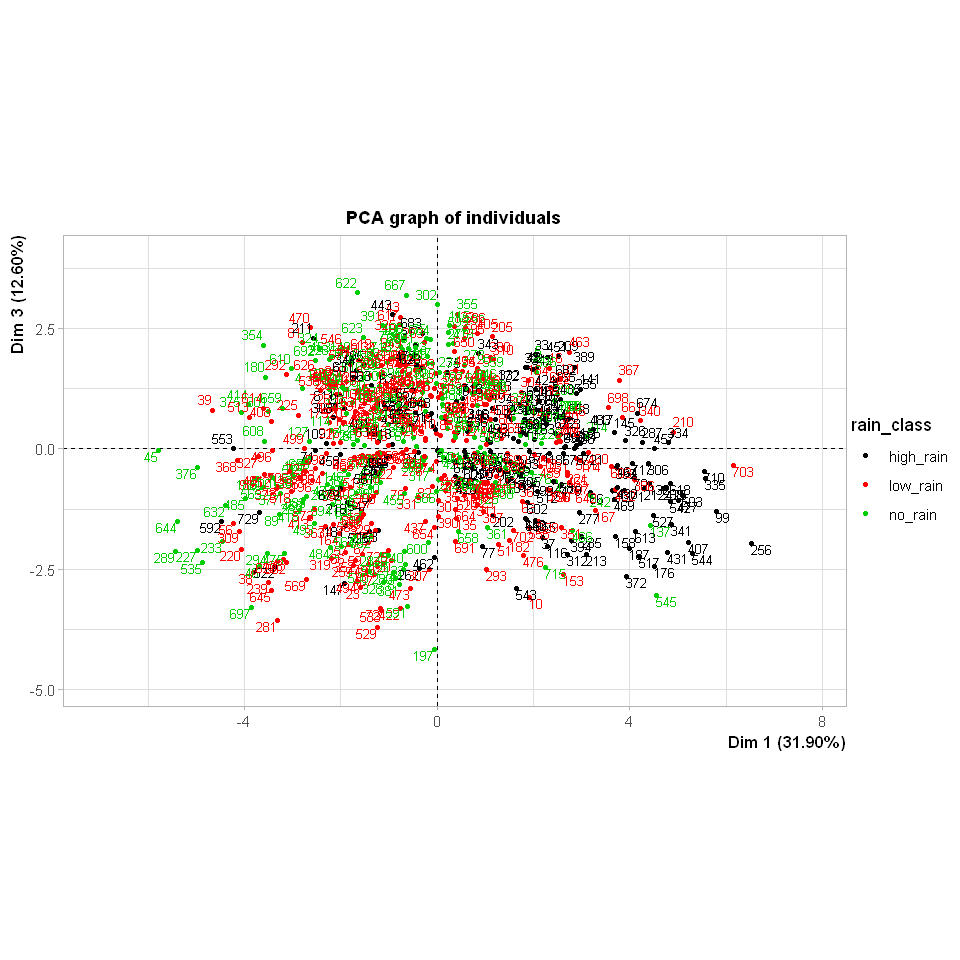

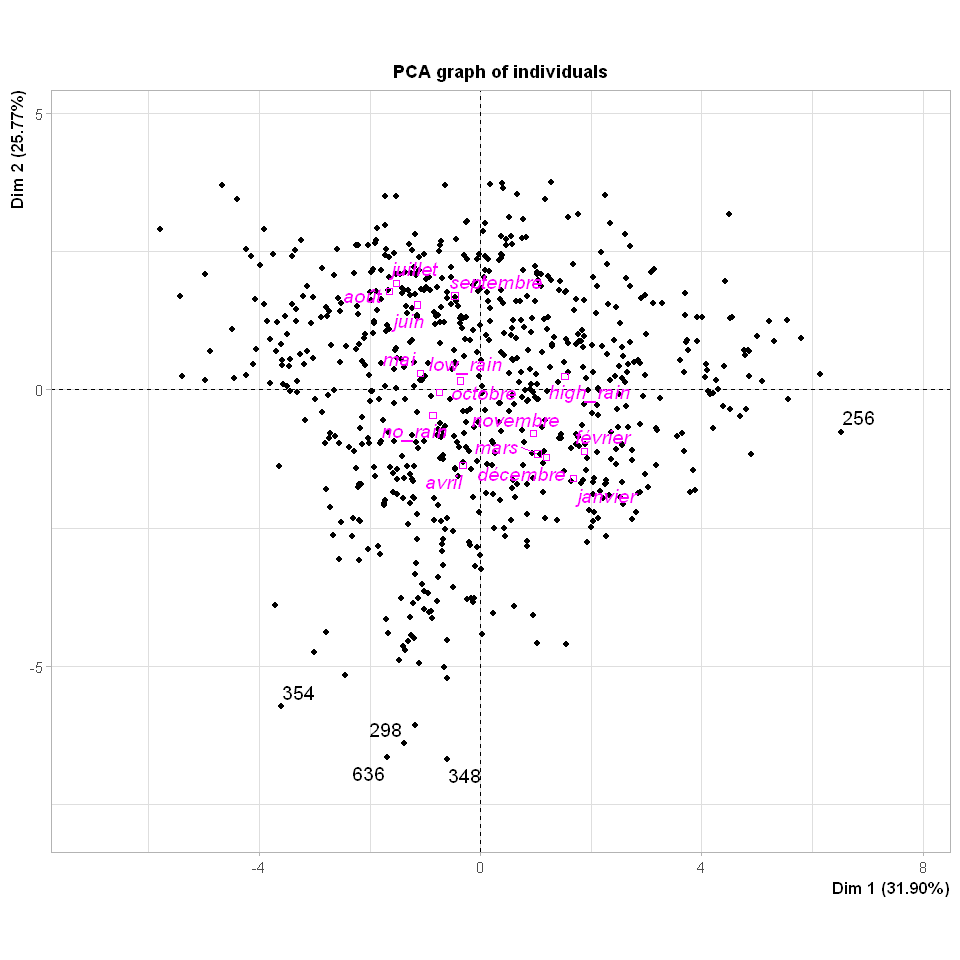

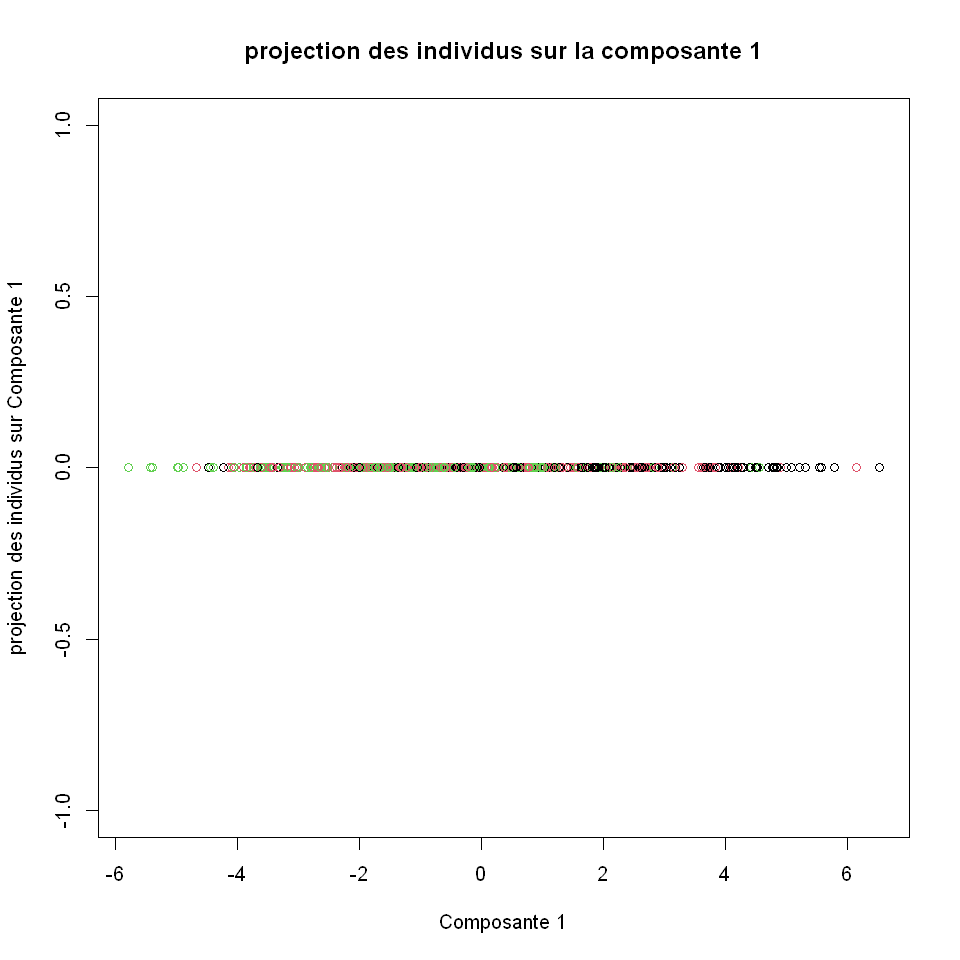

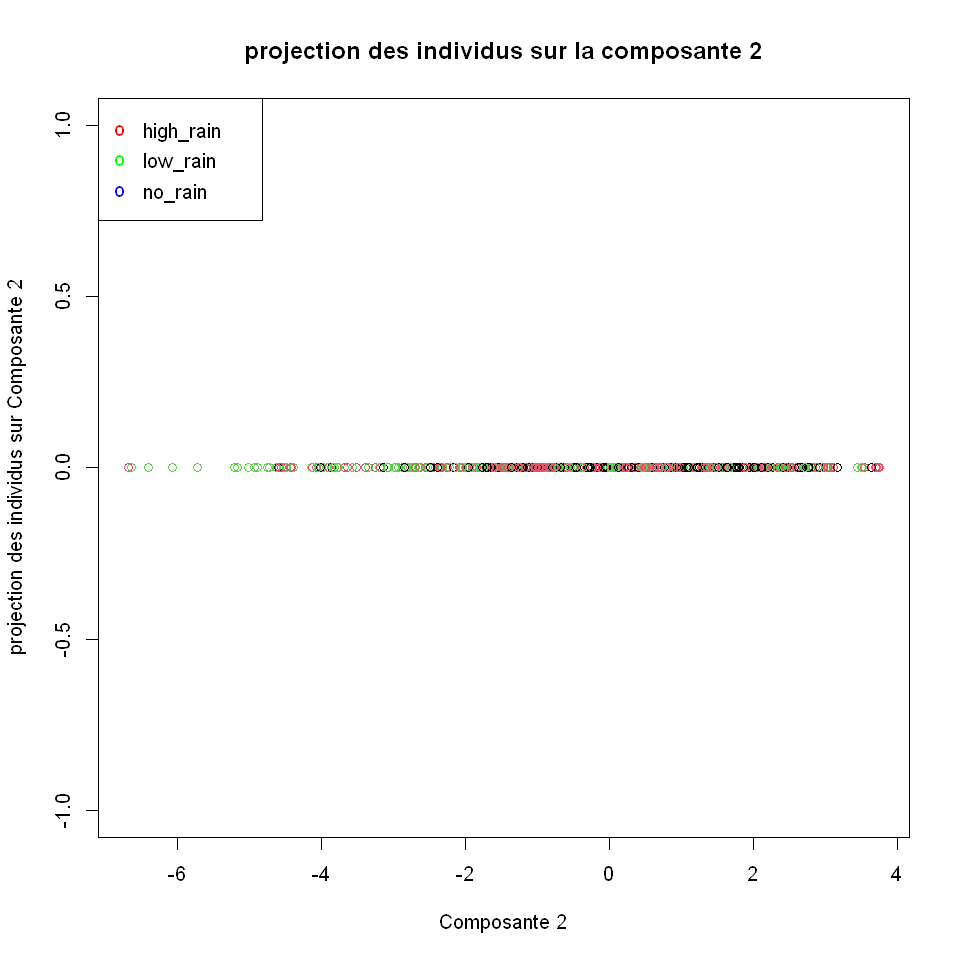

In [24]:
options(repr.plot.width = 8, repr.plot.height = 8)
mescouleurs <- rainbow(length(levels(meteo_mod$rain_class)))

### graphe des individus ----------------------------------------------------------------
plot.PCA(acp, choix="ind", invisible="quali", , main="graphe des individus", cex=0.7,
     axes=c(1,2), select="cos2 1000", unselect= 1,habillage=17)
plot.PCA(acp, choix="ind", invisible="quali", , main="graphe des individus", cex=0.7, pch = 'o',
     axes=c(1,3), select="cos2 1000", unselect= 1,habillage=17)
plot(acp, choix = "ind", select = "contrib 5", unselect = 0)

### projection des individus -------------------------------------------------------------
plot(xlab = "Composante 1", ylab = "projection des individus sur Composante 1", 
main="projection des individus sur la composante 1", legend = levels(meteo_mod$rain_class), 
     acp$ind$coord[,1], rep(0,nrow(meteo_mod)),col=meteo_mod[,18]) 

plot(xlab = "Composante 2", ylab = "projection des individus sur Composante 2", 
main="projection des individus sur la composante 2", legend = levels(meteo_mod$rain_class), 
     acp$ind$coord[,2], rep(0,nrow(meteo_mod)),col=meteo_mod[,18])



legend(x="topleft", pch = 'o',legend = levels(meteo_mod$rain_class), col=mescouleurs)

In [25]:
##analyse des outliers :
outliers = c(256,298,354,348,636)
meteo_acp[outliers,]
summary(meteo_mod)
meteo_mod[c(241,328,333,280,598),c(1,18)]

,date,ff_mod,t_mod,td_mod,hu,dd_mod,precip_mod,ws_arome_mod,p3031_arome_mod,u10_arome,v10_arome,t2m_arome_mod,d2m_arome_mod,r_arome_mod,tp_arome_mod,msl_arome_mod,rain_class
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
274,février,1.1269568,16.78857,16.74641,91.47500,14.607361,1.2164404,1.1672042,14.214496,0.9921962,2.7952417,6.553334,16.73802,9.594752,2.3427626,11.53697,low_rain
317,février,1.2926703,16.61434,16.53500,83.61250,10.340052,0.5848035,1.0434010,11.786565,-2.3139687,0.3440162,6.506035,16.53375,9.313407,0.5475393,11.53127,no_rain
376,juillet,0.8529959,17.06384,16.86968,67.40000,8.748809,0.0000000,0.4542499,9.835388,-0.8594268,-0.9428555,6.624306,16.86811,8.312874,0.0000000,11.53798,no_rain
370,mars,1.8349121,16.81456,16.77682,92.11250,16.375795,0.0000000,1.7204747,16.007996,5.3860212,1.2362143,6.566833,16.79136,9.600444,1.8175325,11.53282,no_rain
675,novembre,0.8962581,16.59513,16.52390,84.86667,9.920517,0.0000000,0.7877957,9.954418,-1.3911537,0.5045552,6.499733,16.50061,9.159595,0.0000000,11.54488,low_rain


       date         ff_mod          t_mod           td_mod     
 juillet : 62   Min.   :0.147   Min.   :16.42   Min.   :16.34  
 mars    : 62   1st Qu.:1.054   1st Qu.:16.73   1st Qu.:16.66  
 janvier : 61   Median :1.350   Median :16.83   Median :16.77  
 juin    : 59   Mean   :1.331   Mean   :16.84   Mean   :16.76  
 novembre: 59   3rd Qu.:1.604   3rd Qu.:16.96   3rd Qu.:16.87  
 mai     : 58   Max.   :2.526   Max.   :17.31   Max.   :17.06  
 (Other) :327                                                  
       hu             dd_mod         precip_mod      ws_arome_mod     
 Min.   : 46.75   Min.   : 5.737   Min.   :0.0000   Min.   :-0.03309  
 1st Qu.: 80.53   1st Qu.:12.599   1st Qu.:0.0000   1st Qu.: 0.96394  
 Median : 86.40   Median :14.927   Median :0.7368   Median : 1.23641  
 Mean   : 85.56   Mean   :14.044   Mean   :0.8420   Mean   : 1.23322  
 3rd Qu.: 92.06   3rd Qu.:16.145   3rd Qu.:1.3751   3rd Qu.: 1.52228  
 Max.   :100.00   Max.   :18.521   Max.   :3.2554   Max.   : 2

,date,rain_class
,<fct>,<fct>
256,décembre,high_rain
348,janvier,low_rain
354,janvier,no_rain
298,janvier,no_rain
636,janvier,no_rain


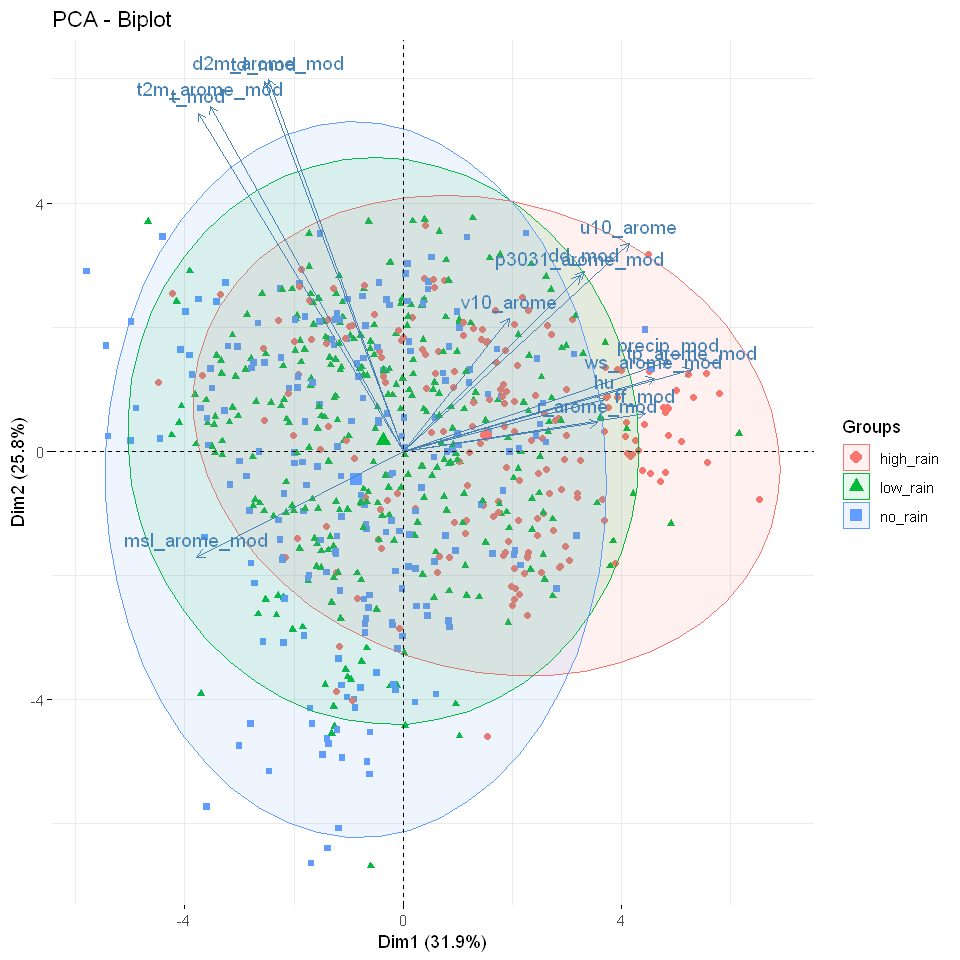

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8)
fviz_pca_biplot(acp, geom.ind="point", col.ind=meteo$rain_class, addEllipses=TRUE,
legend.title="Groups", cex=0.7, axes=c(1,2)) #permet de faire le biplot(fonctionne pas dans mon jupyter...°)

<FONT COLOR = "blue"> **analyse du graphe des individus** : 
- On a du mal à distinguer une séparation entre les modalités *high_rain*, *low_rain* et *no rain*. Il semblerait que les individus les plus à droite sur la dimension 1 portent la modalité *high_rain*, mais les deux autres modalités sont assez mélangées comme on peut le voir sur le dernier graphe où leurs ellipses se superposent. 
- Remarque sur les outliers : Les outliers 354,348 et 636 ont de très faibles valeurs de précipitations (precip_mod et tp_arome_mod), leurs valeurs sur ces variables correspondent au minimum. Cela s'observe aussi sur le premier graphique pour lequel les points les plus en bas autour de l'axe de la dimension 2 portent tous la mention "no rain". 

 [1] "u10_arome"     "v10_arome"     "ff_mod"        "t_mod"        
 [5] "td_mod"        "hu_mod"        "dd_mod"        "precip_mod"   
 [9] "ws_arome_mod"  "p3031_mod"     "r_arome_mod"   "tp_arome_mod" 
[13] "msl_arome_mod" "t2m_arome_mod" "d2m_arome_mod"


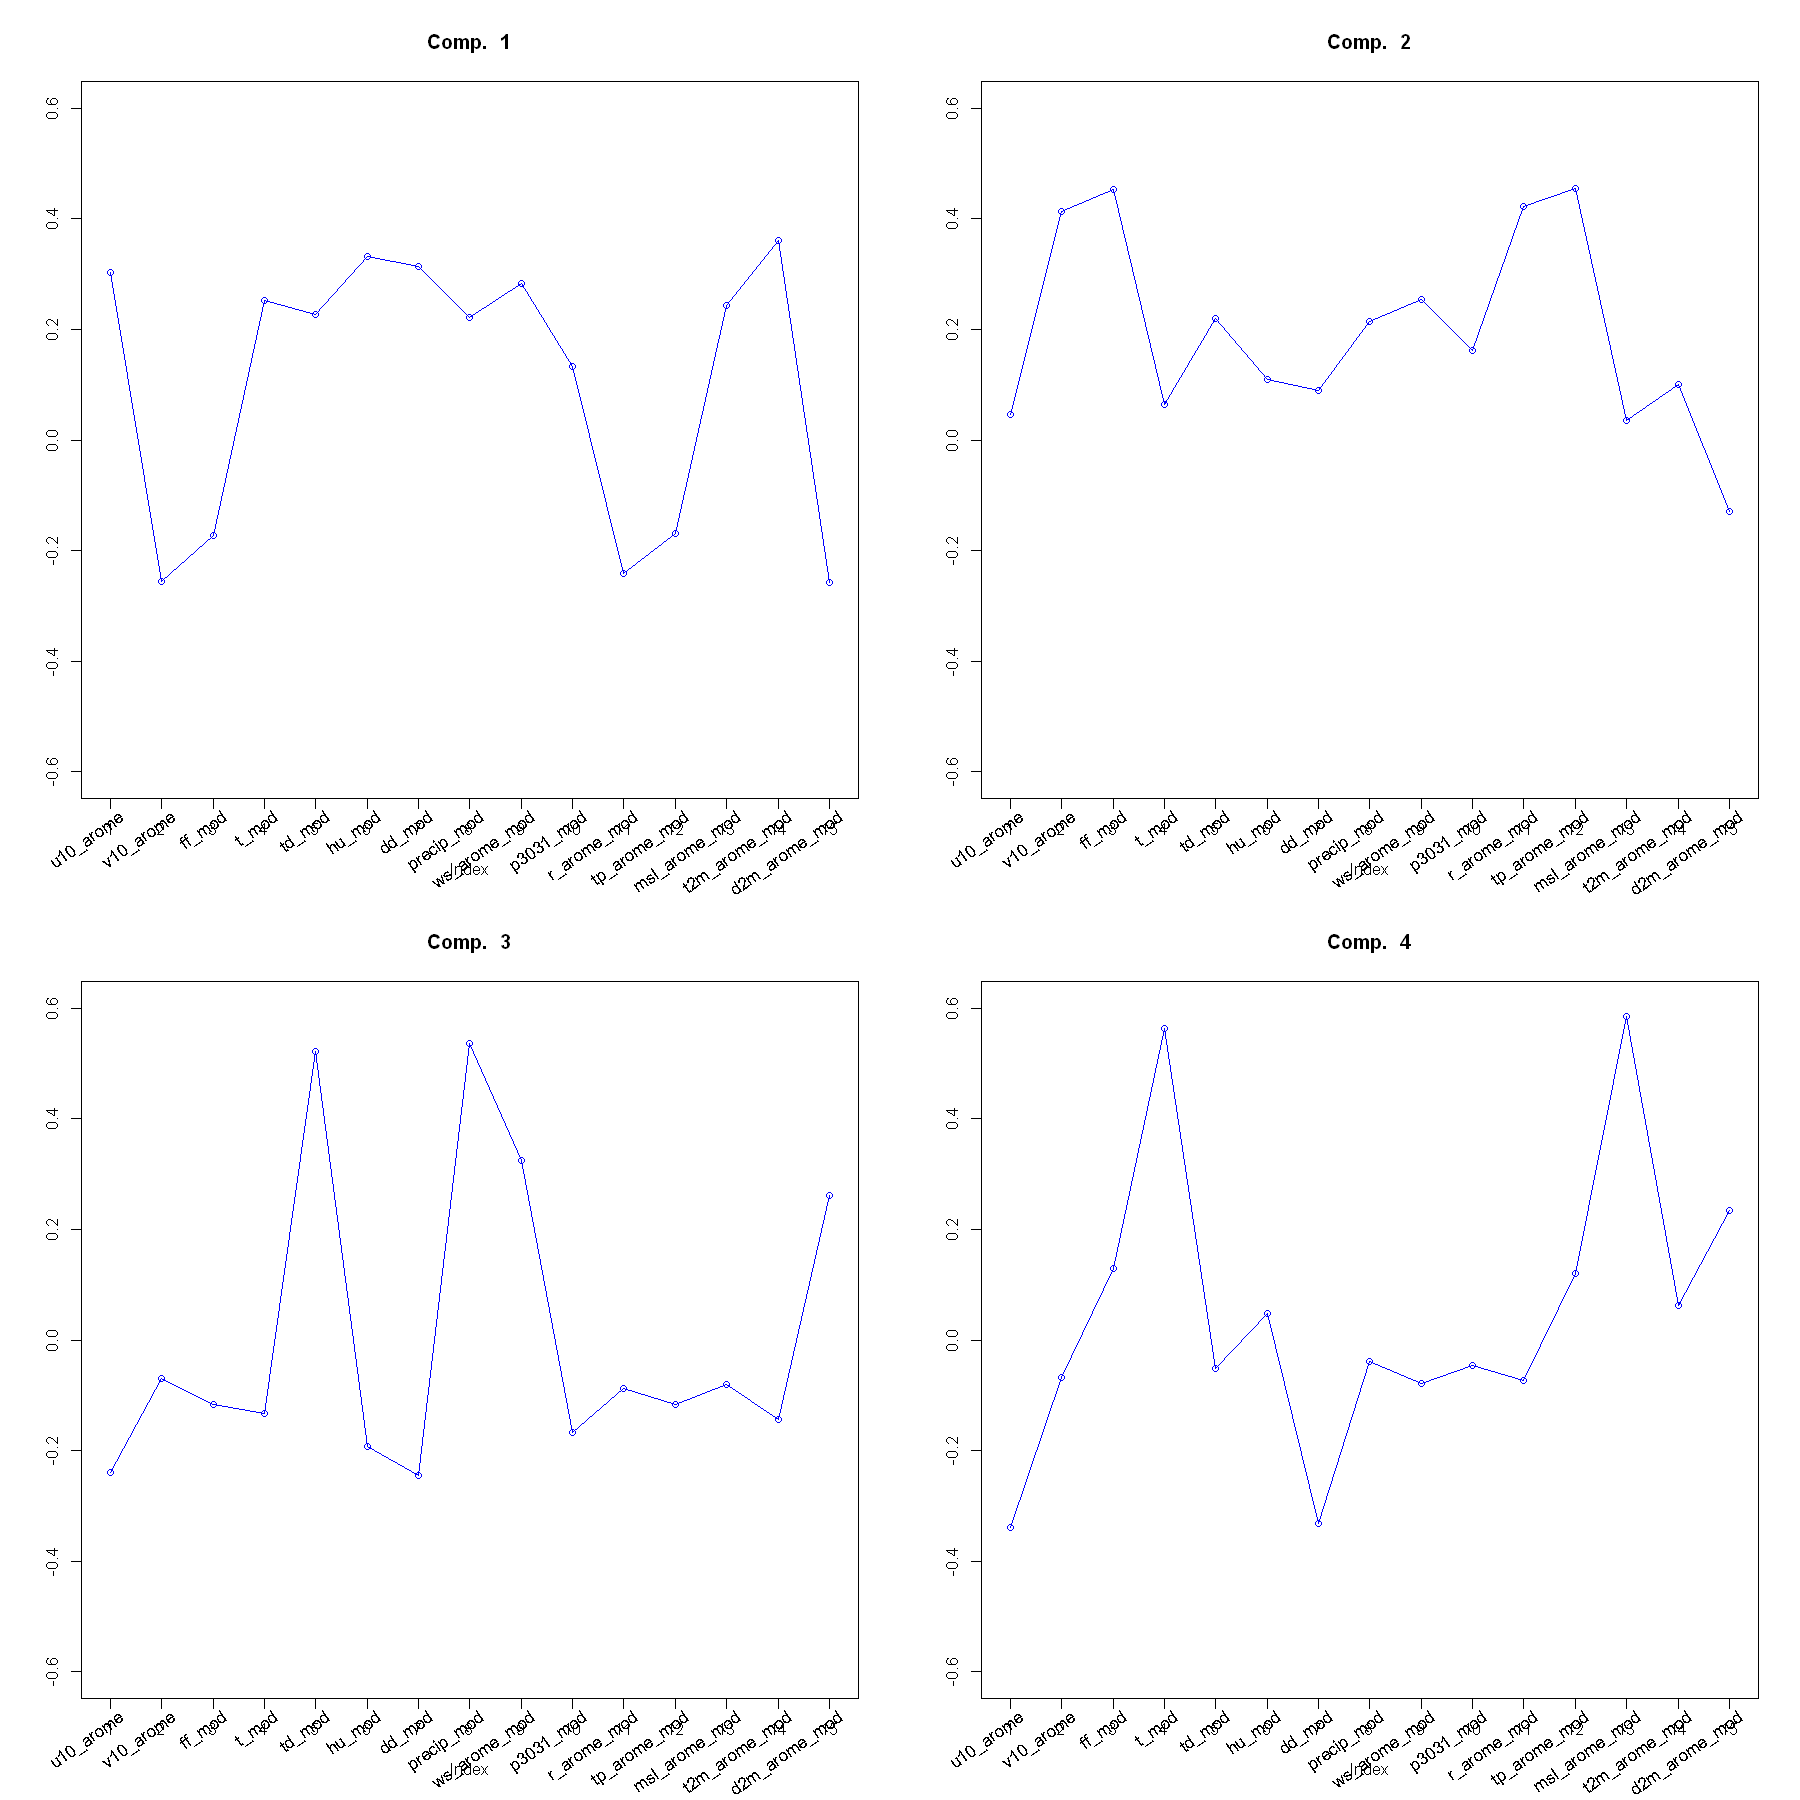

In [27]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(2,2))
x=c("u10_arome","v10_arome","ff_mod","t_mod","td_mod","hu_mod","dd_mod","precip_mod","ws_arome_mod", "p3031_mod","r_arome_mod","tp_arome_mod","msl_arome_mod","t2m_arome_mod","d2m_arome_mod") 
#print((acp$svd$V[, i]))
print((x))
for (i in 1:4){
    plot(acp$svd$V[, i], type = "o", main = paste("Comp. ", i), lab = c(10, 5, 0), ylab = "",
         ylim = c(-0.6, 0.6), col = "blue")
    tck <- axis(1)
    labels <- x
    text(tck, par("usr")[3], labels=labels, srt=35, xpd=TRUE, adj=1:16, cex=1)
    tck2 <- axis(2)
    }

L'objectif est donc de définir une surface séparant les deux classes. 

**Q** Une discrimination linéaire (hyperplan) semble-t-elle possible? 

Ce n'est pas utile ici mais une classification non supervisée est facile à obtenir. Par exemple en 2 classes, par l'algorithme k-means. Donne t-elle la même information ?

In [28]:
summary(meteo_mod)
print(meteo_mod[, c(4:6)])

       date         ff_mod          t_mod           td_mod     
 juillet : 62   Min.   :0.147   Min.   :16.42   Min.   :16.34  
 mars    : 62   1st Qu.:1.054   1st Qu.:16.73   1st Qu.:16.66  
 janvier : 61   Median :1.350   Median :16.83   Median :16.77  
 juin    : 59   Mean   :1.331   Mean   :16.84   Mean   :16.76  
 novembre: 59   3rd Qu.:1.604   3rd Qu.:16.96   3rd Qu.:16.87  
 mai     : 58   Max.   :2.526   Max.   :17.31   Max.   :17.06  
 (Other) :327                                                  
       hu             dd_mod         precip_mod      ws_arome_mod     
 Min.   : 46.75   Min.   : 5.737   Min.   :0.0000   Min.   :-0.03309  
 1st Qu.: 80.53   1st Qu.:12.599   1st Qu.:0.0000   1st Qu.: 0.96394  
 Median : 86.40   Median :14.927   Median :0.7368   Median : 1.23641  
 Mean   : 85.56   Mean   :14.044   Mean   :0.8420   Mean   : 1.23322  
 3rd Qu.: 92.06   3rd Qu.:16.145   3rd Qu.:1.3751   3rd Qu.: 1.52228  
 Max.   :100.00   Max.   :18.521   Max.   :3.2554   Max.   : 2

      td_mod        hu    dd_mod
1   16.89015  78.78333 15.708278
2   16.53549  81.70000 16.134848
3   16.93291  87.62083 16.094771
4   16.73965  76.58750 14.715355
5   16.56892  81.39167 16.897978
6   16.58733  86.20417 11.869077
8   16.57723  82.69167  6.861730
9   16.79328  82.96667 15.234282
10  16.62145  97.43750  8.689074
11  16.85004  88.47083 14.658615
12  16.92430  84.11667 15.573749
13  16.87548  79.87917 16.064972
14  16.59473  92.45833 14.808500
15  16.68597  82.87917 12.843611
16  16.55104  82.56667 17.196172
17  16.79355  97.07500 13.803683
18  16.75926  91.97083 15.599145
19  16.82811  81.52083 17.201017
20  16.89515  81.92917 16.997549
21  16.64101  92.37083 14.517231
22  16.84390  85.75833  9.886860
23  16.76195  87.77917  7.103403
24  16.60911  71.22500 13.252358
26  16.82400  82.09167 17.710637
27  16.99093  90.09167 13.934370
28  16.87956  89.43750 15.786334
30  16.60892  95.45833 10.305743
31  16.65051  79.34583 16.054594
32  16.60375  89.95417 16.411378
33  16.555


Attachement du package : 'gridExtra'


L'objet suivant est masqué depuis 'package:randomForest':

    combine




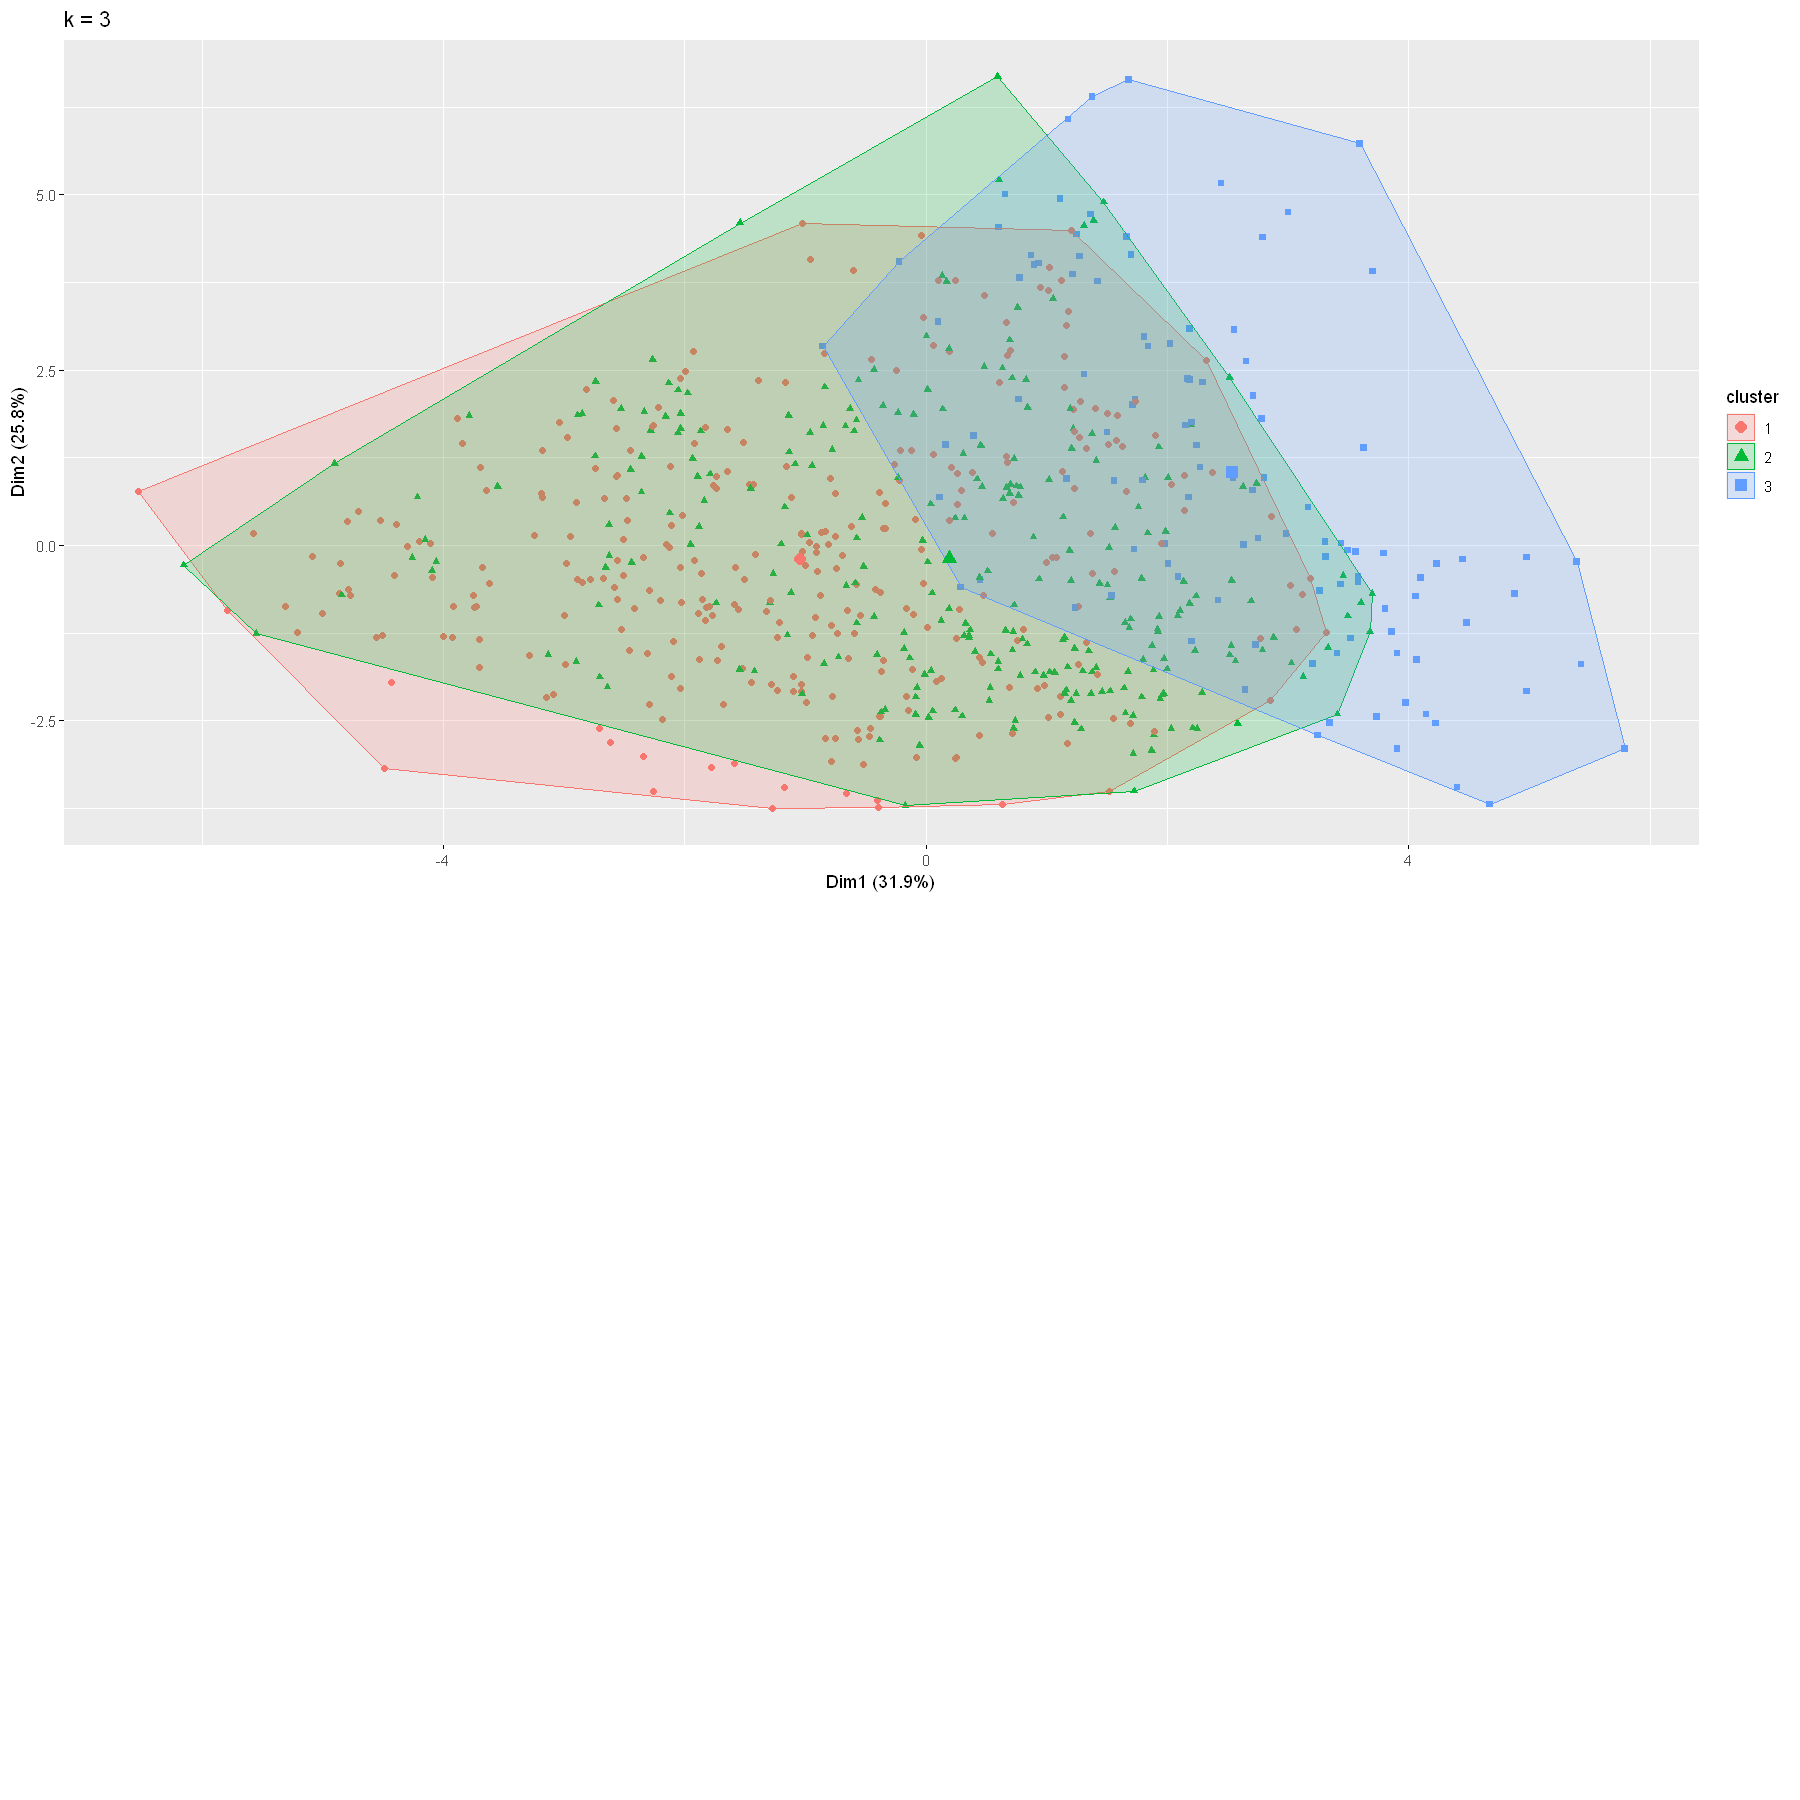

In [29]:
k3 <- kmeans( meteo_mod[, c(2:16)], centers = 3)

# plots to compare
p1 <- fviz_cluster(k3, geom = "point", data = meteo_mod[, c(2:16)]) + ggtitle("k = 3")
library(gridExtra)
grid.arrange(p1, nrow = 2)

## Protocole de comparaison

### Stratégie

La recherche  d'une meilleure méthode de prévision suit le protocole suivant.

1. Étape descriptive préliminaire uni et multidimensionnelle visant à repérer les incohérences, les variables non significatives ou de distribution exotique, les individus non concernés ou atypiques... et à étudier les structures des données. Ce peut être aussi la longue étape de construction de variables, attributs ou *features* spécifiques des données. 
2. Procéder à un tirage aléatoire d'un échantillon *test* qui ne sera utilisé que lors de la *dernière étape* de comparaison des méthodes.
3. La partie restante est l'échantillon d'*apprentissage* pour l'estimation des paramètres des modèles.
4. Pour chacune des méthodes, optimiser la complexité des modèles en minimisant une estimation "sans biais" de l'erreur de prévision, par exemple par [*validation croisée*](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf):
    - Variables et interactions à prendre en compte dans la régression linéaire ou logistique;
    - variables et méthode pour l'analyse discriminante;
    - nombre de feuilles dans l'arbre de régression ou de classification;
    - architecture (nombre de neurones, pénalisation) du perceptron;
    - algorithme d'agrégation, 
    - noyau et pénalisation des SVMs.
5.  Comparaison des qualités de prévision sur la base du taux de mal classés pour le seul échantillon test qui est resté à l'écart de tout effort ou "acharnement" pour l'optimisation des modèles.

**Remarques**
* En cas d'échantillon relativement "petit" il est recommandé d'itérer la procédure de découpage apprentissage / test, afin de réduire la variance (moyenne) des estimations des erreurs de prévision.

**Q** Comment appelle-t-on cette procédure spécifique de validation croisée?

Cette procédure de validation croisée est la K-fold cross validation.

* *Attention*: ne pas "tricher" en modifiant le modèle obtenu lors de l'étape précédente afin d'améliorer le résultat sur l'échantillon test!
* Le critère utilisé dépend du problème : erreur quadratique, taux de mauvais classement, entropie, AUC (aire sous la courbe ROC), indice de Pierce, *log loss function*...

### Extraction des échantillons

Les commandes ci-dessous réalisent l'extraction du sous-ensemble des données d'apprentissage et de test. 

Utiliser trois chiffres au hasard, et **remplacer** "111" ci-dessous, comme initialisation du générateur de nombres aléatoires. Attention, chaque participant tire un échantillon différent ; il est donc "normal" de ne pas obtenir les mêmes modèles, les mêmes résultats.

**Commentaire :** La construction d'un échantillon d'entraînement et d'un échantillon de test qui ne contiennent pas les mêmes données est une étape essentielle vis-à-vis de la performance. L'échantillon d'entraînement va servir à entraîner le modèle et à sélectionner celui qui permet de minimiser l'erreur généralisée. Ensuite le modèle sélectionné sera testé sur l'échantillon de test qui permet d'évaluer son risque. Il est essentiel que dans ces deux étapes les algorithmes ne travaillent pas sur les mêmes données. En effet, si l'échantillon de test et d'entraînement comportent des données communes, cela va conduire à une sous-estimation de l'erreur généralisée. 

In [30]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(meteo_mod) # nombre de lignes dans les données
nvar <- ncol(meteo_mod) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

Construction des échantillons pour la régression: prévision de la concentration en ozone.

 <FONT COLOR="Blue"> Les variables explicatives de notre modèle $X= (X^1,..,X^p)$ sont les « paramètres météorologiques observés le jour j» et les « prévisions météos du jour suivant par le modèle arome». </font>

 <FONT COLOR="Blue"> Les variables à expliquer $Y$ sont : **rain_class** pour la classification ($Y \in \left\{ 1..K
\right\} $) et **rain** pour la regression ($Y \in \mathbb{R}$). </font>

<FONT COLOR="Blue"> Dans le code suivant, on construit les échantillons pour la **régression**. On enlève donc de meteo_mod([appri,]) la variable explicative  **Y = rain_class** et on conserve uniquement la variable explicative **Y = rain** </font>

In [31]:
# construction de l'échantillon d'apprentissage
datappr <- meteo_mod[appri,-18] #on enlève rain_class pour la régression
# construction de l'échantillon test
datestr <- meteo_mod[testi,-18] 
# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	550 obs. of  17 variables:
 $ date           : Factor w/ 12 levels "août","avril",..: 7 9 6 8 4 3 9 7 4 12 ...
 $ ff_mod         : num  1.372 1.319 1.186 0.557 1.744 ...
 $ t_mod          : num  17 16.6 17 16.9 16.7 ...
 $ td_mod         : num  16.9 16.5 16.9 16.7 16.6 ...
 $ hu             : num  78.8 81.7 87.6 76.6 81.4 ...
 $ dd_mod         : num  15.7 16.1 16.1 14.7 16.9 ...
 $ precip_mod     : num  0 1.063 0.585 0 1.17 ...
 $ ws_arome_mod   : num  1.298 1.203 1.173 0.543 1.487 ...
 $ p3031_arome_mod: num  15.6 17.5 16 11.8 16.9 ...
 $ u10_arome      : num  3.039 2.464 2.964 -0.261 3.94 ...
 $ v10_arome      : num  1.416 -1.899 0.986 -1.398 -1.458 ...
 $ t2m_arome_mod  : num  6.61 6.51 6.62 6.58 6.52 ...
 $ d2m_arome_mod  : num  16.9 16.5 16.9 16.7 16.6 ...
 $ r_arome_mod    : num  8.89 9.29 9.07 8.68 8.97 ...
 $ tp_arome_mod   : num  1.33 2.2 1.66 0.98 2.4 ...
 $ msl_arome_mod  : num  11.5 11.5 11.5 11.5 11.5 ...
 $ rain_mod       : num  0.585 1.613 0 0 0 ...
'data.f

Construction des échantillons pour la discrimination: prévision de dépassement.

 <FONT COLOR="Blue"> Dans le code suivant, on construit les échantillons pour la **classification**. On enlève donc de meteo_mod([appri,]) la variable explicative  **Y = rain** et on conserve uniquement la variable explicative **Y = rain_class**   </font>

In [32]:
# construction de l'échantillon d'apprentissage
datappq <- meteo_mod[appri,-17] #on enlève rain pour la classification
# construction de l'échantillon test 
datestq <- meteo_mod[testi,-17] 

# vérification
str(datappq)
str(datestq)
#summary(datappq)

'data.frame':	550 obs. of  17 variables:
 $ date           : Factor w/ 12 levels "août","avril",..: 7 9 6 8 4 3 9 7 4 12 ...
 $ ff_mod         : num  1.372 1.319 1.186 0.557 1.744 ...
 $ t_mod          : num  17 16.6 17 16.9 16.7 ...
 $ td_mod         : num  16.9 16.5 16.9 16.7 16.6 ...
 $ hu             : num  78.8 81.7 87.6 76.6 81.4 ...
 $ dd_mod         : num  15.7 16.1 16.1 14.7 16.9 ...
 $ precip_mod     : num  0 1.063 0.585 0 1.17 ...
 $ ws_arome_mod   : num  1.298 1.203 1.173 0.543 1.487 ...
 $ p3031_arome_mod: num  15.6 17.5 16 11.8 16.9 ...
 $ u10_arome      : num  3.039 2.464 2.964 -0.261 3.94 ...
 $ v10_arome      : num  1.416 -1.899 0.986 -1.398 -1.458 ...
 $ t2m_arome_mod  : num  6.61 6.51 6.62 6.58 6.52 ...
 $ d2m_arome_mod  : num  16.9 16.5 16.9 16.7 16.6 ...
 $ r_arome_mod    : num  8.89 9.29 9.07 8.68 8.97 ...
 $ tp_arome_mod   : num  1.33 2.2 1.66 0.98 2.4 ...
 $ msl_arome_mod  : num  11.5 11.5 11.5 11.5 11.5 ...
 $ rain_class     : Factor w/ 3 levels "high_rain","lo

Enfin, avant de passer aux différents algorithmes, définissons une fonction traçant le graphe des résidus avec des couleurs et des échelles fixes sur les axes. 

<FONT COLOR="Blue"> On modifie xlim et ylim de la fonction plot.res pour ne pas que le graphique suivant soit trop ramassé </font>

In [33]:
options(repr.plot.width = 8, repr.plot.height = 4)
# Définition d'une fonction pour un graphe coloré et des échelles fixes sur les
# axes
plot.res <- function(x, y, titre = "titre",lim_x = c(-0.5, 3),lim_y = c(-2, 3))  {
    plot(x, y, col = "blue", xlim = lim_x , ylim = lim_y , ylab = "Résidus", 
        xlab = "Valeurs prédites", main = titre, pch = 20)
    # points(x2, y, col='red')
    abline(h = 0, col = "green")
}

## [Prévision par modèle gaussien](http://wikistat.fr/pdf/st-m-app-select.pdf)

Le premier modèle à tester est un simple modèle de régression linéaire mais, comme certaines variables sont qualitatives, il s'agit d'une analyse de covariance. D'autre part, on s'intéresse à savoir si des interactions sont à prendre en compte. Le modèle devient alors polynomial d'ordre 2 ou quadratique.

### Modèle linéaire

#### Sans sélection de variables

Le modèle de régression linéaire simple intégre des variables qualitatives; c'est dans ce cas une *analyse de covariance*  estimée par la fonction `aov` mieux adaptée à ce modèle.

<FONT COLOR="Blue"> On va effectuer de la regression. Donc on utilise l'échantillon d'apprentissage **datappr** et l'échantillon de test **datestr** </font>

In [34]:
head(datappr)

,date,ff_mod,t_mod,td_mod,hu,dd_mod,precip_mod,ws_arome_mod,p3031_arome_mod,u10_arome,v10_arome,t2m_arome_mod,d2m_arome_mod,r_arome_mod,tp_arome_mod,msl_arome_mod,rain_mod
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,juin,1.3724490,17.01202,16.89015,78.78333,15.70828,0.0000000,1.2984967,15.63008,3.0385028,1.4163599,6.613260,16.88700,8.890320,1.3253936,11.52952,0.5848035
2,mars,1.3189742,16.62456,16.53549,81.70000,16.13485,1.0626586,1.2025145,17.48316,2.4638858,-1.8989708,6.509325,16.54305,9.291480,2.2018882,11.51875,1.6134286
3,juillet,1.1859361,16.99615,16.93291,87.62083,16.09477,0.5848035,1.1732186,16.00132,2.9638715,0.9856267,6.616270,16.92587,9.071992,1.6609688,11.52765,0.0000000
4,mai,0.5567546,16.86086,16.73965,76.58750,14.71535,0.0000000,0.5428623,11.80243,-0.2606926,-1.3976028,6.578736,16.74417,8.682403,0.9796742,11.53492,0.0000000
5,février,1.7437503,16.65917,16.56892,81.39167,16.89798,1.1696071,1.4870470,16.89908,3.9400556,-1.4576058,6.524575,16.57078,8.968561,2.4045675,11.53680,0.0000000
6,décembre,0.5596158,16.65393,16.58733,86.20417,11.86908,0.5848035,0.5771552,12.56309,0.1446032,0.6620992,6.505274,16.52546,9.233563,0.5905781,11.54698,0.5848035


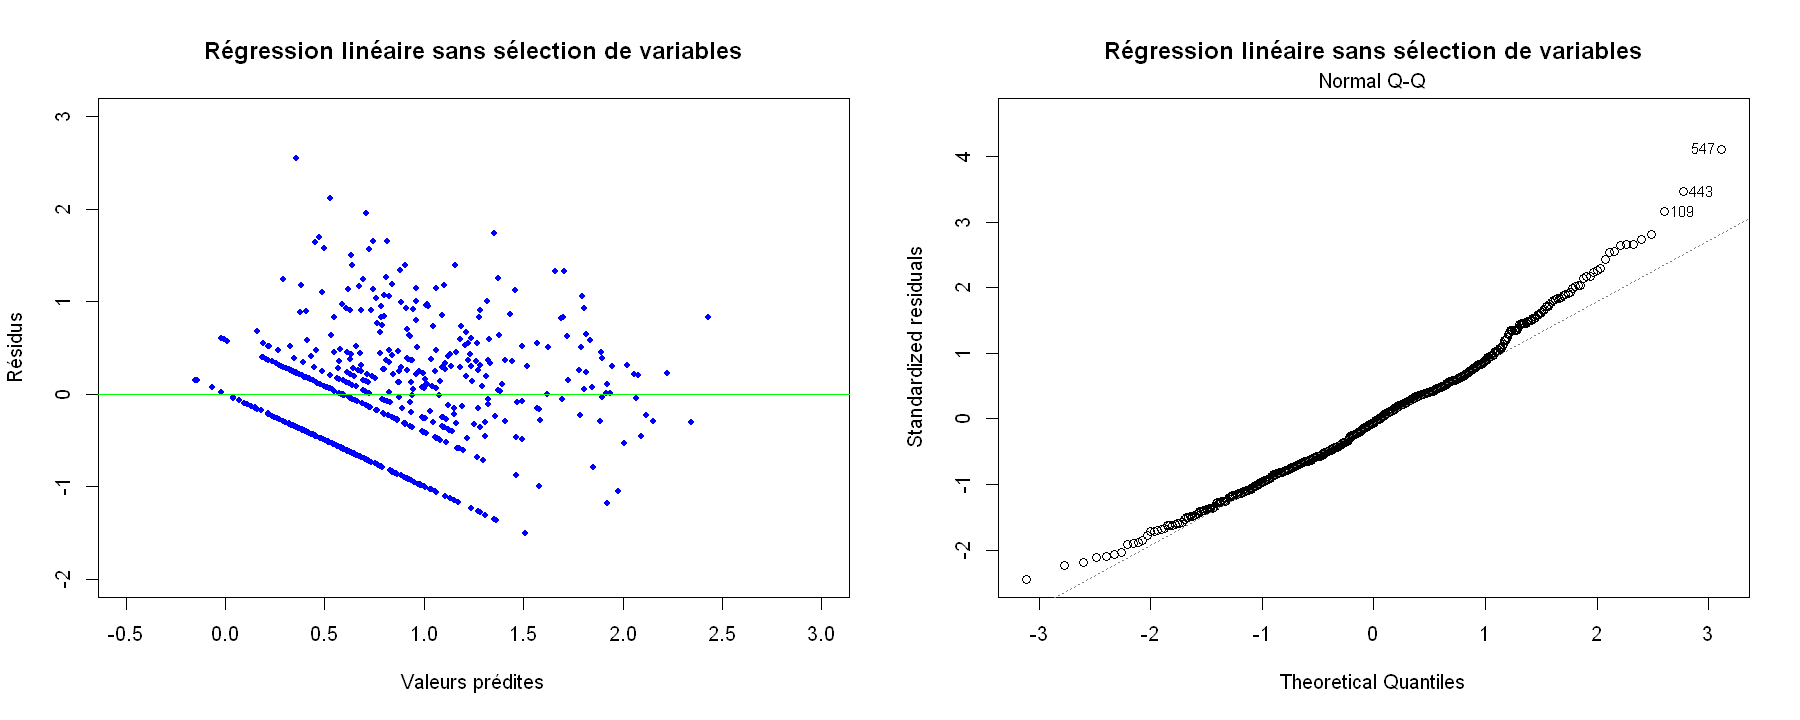

In [35]:
options(repr.plot.width = 15, repr.plot.height = 6)

# estimation du modèle sans interaction
reg.lm = aov(rain_mod ~ . , data = datappr) #lm au lieu de aov fonctionne aussi

# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

# Graphe des résidus. 
par(mfrow = c(1,2))
plot.res(fit.lm,res.lm,"Régression linéaire sans sélection de variables") #fonction plot.res définie + haut
plot(reg.lm,which=c(2),label.size=2, main = "Régression linéaire sans sélection de variables") #QQ-plot

##autre méthode : 
#par(mfrow = c(1,2))
#plot(reg.lm,which=c(1,2),label.size=2, main = "Régression linéaire de rain_mod sans sélection de variables")

**Q** Que dire de la distribution de ces résidus? 



**Q** La forme du nuage renseigne sur les hypothèses de linéarité du modèle et d'homoscédasticité. Que dire de la validité de ce modèle?

<FONT COLOR="Blue"> **graphe 1** : 
- <FONT COLOR="Blue"> Les résidus ne sont pas dispersés de façon équivalente. Cela signifie que la variance dépend de Y et n'est pas constante (hétéroscédasticité). 
- <FONT COLOR="Blue"> On obverse une forme particulière (au moins 3 droites parallèles) dans le nuage donc il y a toujours une tendance ce qui suggère que les résidus ne sont pas indépendants entre eux. 
- <FONT COLOR="Blue"> Il y beaucoup d'outliers 

<FONT COLOR="Blue"> Lorsqu'il y a une droite cela signifie que sur plusieurs données on a la même valeur pour la quantité de pluie réelle. En effet les résidus sont obtenus de la manière suivante $\hat \epsilon = Y - \hat Y$ donc si Y est constante, alors on observe une droite. Par exemple, la première droite  $\hat \epsilon =  - \hat Y $ passe par l'origine du repère donc $Y = 0$ c'est à dire qu'il n'y a pas de pluie. En effet, on observe dans les données qu'il y a beaucoup de jours pour lesquels la pluie est nulle.
 

<FONT COLOR="Blue"> **graphe 2** : 
On voit que les résidus ne sont pas gaussiens car les points s'éloignent rapidement de la droite (décrochement). </font>

<FONT COLOR="Blue"> **Conclusion** : Les hypothèses de la régression lineaire ne sont pas vérifiées. Nous ne pouvons donc pas l'appliquer pour expliquer nos données.      
</font>    

Apprécier néanmoins sa significativité par la commande suivante.

In [36]:
summary(reg.lm)

                 Df Sum Sq Mean Sq F value   Pr(>F)    
date             11  16.09   1.463   3.665 4.96e-05 ***
ff_mod            1  15.24  15.240  38.173 1.30e-09 ***
t_mod             1   0.40   0.401   1.003  0.31694    
td_mod            1   6.15   6.148  15.399 9.87e-05 ***
hu                1   0.01   0.008   0.021  0.88512    
dd_mod            1   7.59   7.594  19.022 1.56e-05 ***
precip_mod        1  27.38  27.380  68.581 1.03e-15 ***
ws_arome_mod      1   1.26   1.262   3.161  0.07600 .  
p3031_arome_mod   1   0.26   0.259   0.649  0.42076    
u10_arome         1   4.24   4.243  10.628  0.00119 ** 
v10_arome         1  11.27  11.270  28.230 1.60e-07 ***
t2m_arome_mod     1   3.21   3.209   8.039  0.00476 ** 
d2m_arome_mod     1   0.04   0.044   0.111  0.73868    
r_arome_mod       1   2.41   2.412   6.043  0.01429 *  
tp_arome_mod      1   0.22   0.220   0.550  0.45865    
msl_arome_mod     1  18.51  18.507  46.355 2.71e-11 ***
Residuals       523 208.80   0.399              

In [37]:
coef(reg.lm)

(Intercept)       dateavril    datedécembre     datefévrier     datejanvier 
  199.500658639    -0.114689282     0.276583062     0.013304787     0.069654329 
    datejuillet        datejuin         datemai        datemars    datenovembre 
   -0.012262388     0.108335748     0.094490787     0.005720965     0.211102951 
    dateoctobre   dateseptembre          ff_mod           t_mod          td_mod 
    0.066284327     0.024306154     0.397295511   -14.338719791    11.236797265 
             hu          dd_mod      precip_mod    ws_arome_mod p3031_arome_mod 
   -0.062136258     0.021839268     0.182357546    -0.594518510    -0.022355268 
      u10_arome       v10_arome   t2m_arome_mod   d2m_arome_mod     r_arome_mod 
    0.061437216     0.057906882    57.693387212   -12.806258229     1.274318253 
   tp_arome_mod   msl_arome_mod 
   -0.046523287   -27.445148920

**Q** Ce premier modèle est comparé avec celui de la seule prévision déterministe. Qu'en conclure?

<FONT COLOR = "blue"> Le modèle déterministe est ici donné par le modèle AROME. Nous allons comparer **rain** (devenue **rain_mod** après modification) représentant la quantité totale de précipitation le jour suivant à **tp_arome**  (devenue **tp_arome_mod** après modification) représentant la quantité totale de précipitation le jour suivant d'après le modèle AROME.
    
<FONT COLOR = "blue"> Pour le premier plot, on trace en ordonnée les résidus du modèle déterministe : *datappr[, "tp_arome_mod"] - datappr[, "rain_mod"]* (valeurs prédites par le modèle déterministe - sorties observées = $\hat Y - Y = \hat \epsilon$) en fonction des valeurs prédites par le modèle déterministe en abscisse : *datappr[, "tp_arome_mod"]* ($\hat Y = X \hat \theta$). 
    
<FONT COLOR = "blue"> Pour le deuxième plot, on trace les résidus obtenus avec notre modèle statistique contenant toutes les variables explicatives.    

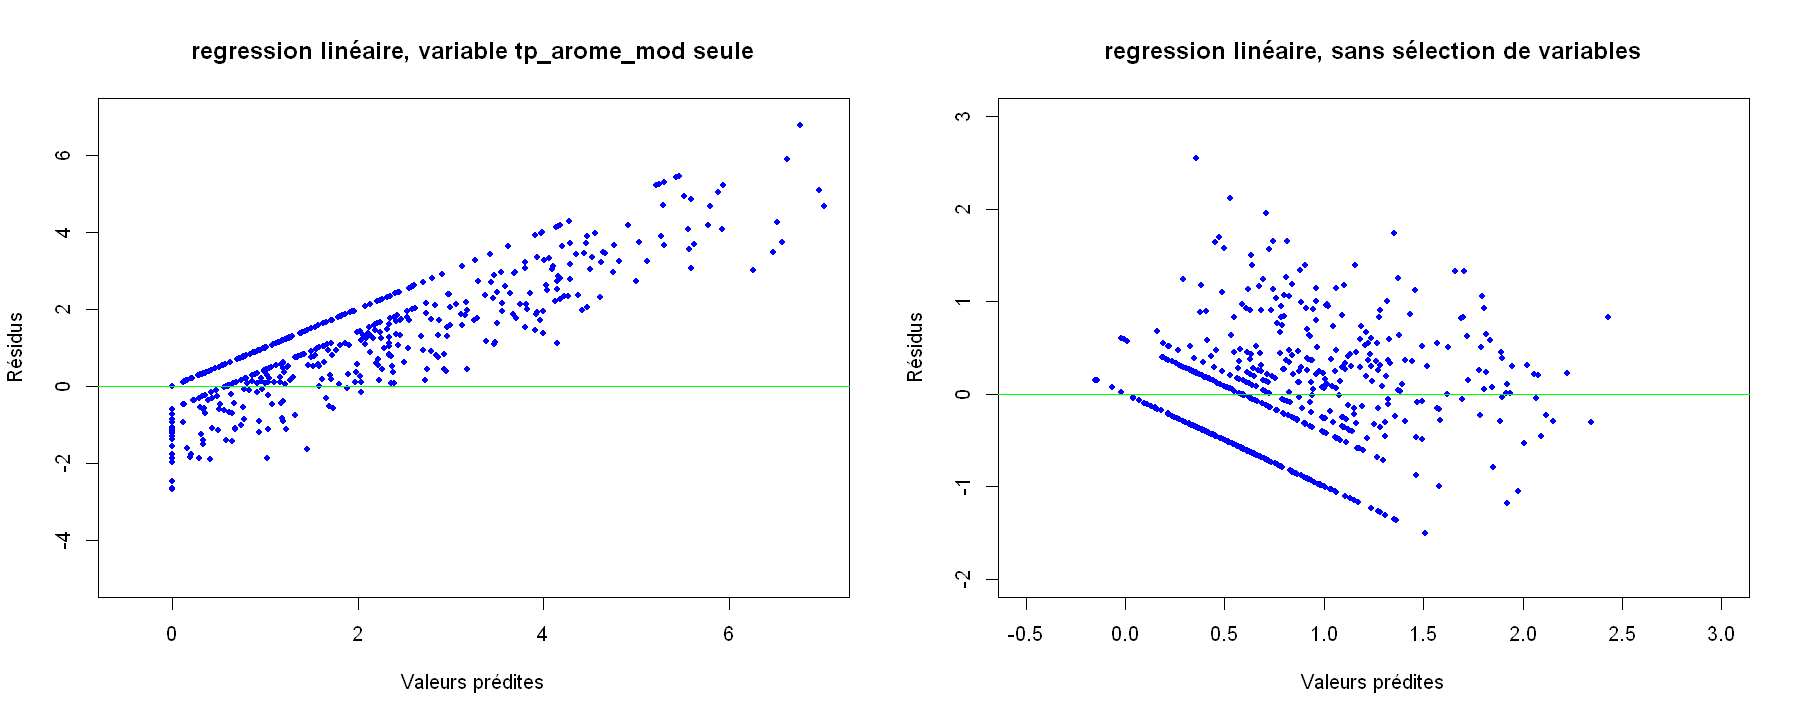

In [38]:
# Graphe des résidus du modèle déterministe MOCAGE
par(mfrow = c(1, 2))
plot.res(datappr[, "tp_arome_mod"],
         datappr[, "tp_arome_mod"] - datappr[, "rain_mod"] , "regression linéaire, variable tp_arome_mod seule",
        lim_x = c(-0.5,7),lim_y = c(-5,7))
plot.res(fit.lm, res.lm, "regression linéaire, sans sélection de variables")
par(mfrow = c(1, 1))

<FONT COLOR = "blue"> On observe que les deux graphes ont une forte tendance (droites parallèles observables) et les les résidus ne sont pas dispersés de façon équivalente (hétéroscédasticité). Dans les deux cas, le modèle de régression linéaire n'est pas adapté. Cependant, le deuxième graphe correspondant au modèle statistique avec toutes les variables est un peu meilleur car il est davantage centré autour de zéro et il ne présente pas le fort biais du premier graphe. 

#### Sélection de variable par régularisation L1 (LASSO)

<FONT COLOR = "blue"> Pour la regression lasso, on ne conserve que les variables quantitatives. On met dans x la variable à expliquer **rain_mod** et dans y toutes les variables sauf la variable qualitative **date** et la variable à expliquer **rain_mod**. 
    
<FONT COLOR = "red"> je n'arrive pas à grossir la taille des lables sur les tracés pour + de visibilité

 [1] "1  -  dateaoût"         "2  -  dateavril"        "3  -  datedécembre"    
 [4] "4  -  datefévrier"      "5  -  datejanvier"      "6  -  datejuillet"     
 [7] "7  -  datejuin"         "8  -  datemai"          "9  -  datemars"        
[10] "10  -  datenovembre"    "11  -  dateoctobre"     "12  -  dateseptembre"  
[13] "13  -  ff_mod"          "14  -  t_mod"           "15  -  td_mod"         
[16] "16  -  hu"              "17  -  dd_mod"          "18  -  precip_mod"     
[19] "19  -  ws_arome_mod"    "20  -  p3031_arome_mod" "21  -  u10_arome"      
[22] "22  -  v10_arome"       "23  -  t2m_arome_mod"   "24  -  d2m_arome_mod"  
[25] "25  -  r_arome_mod"     "26  -  tp_arome_mod"    "27  -  msl_arome_mod"  


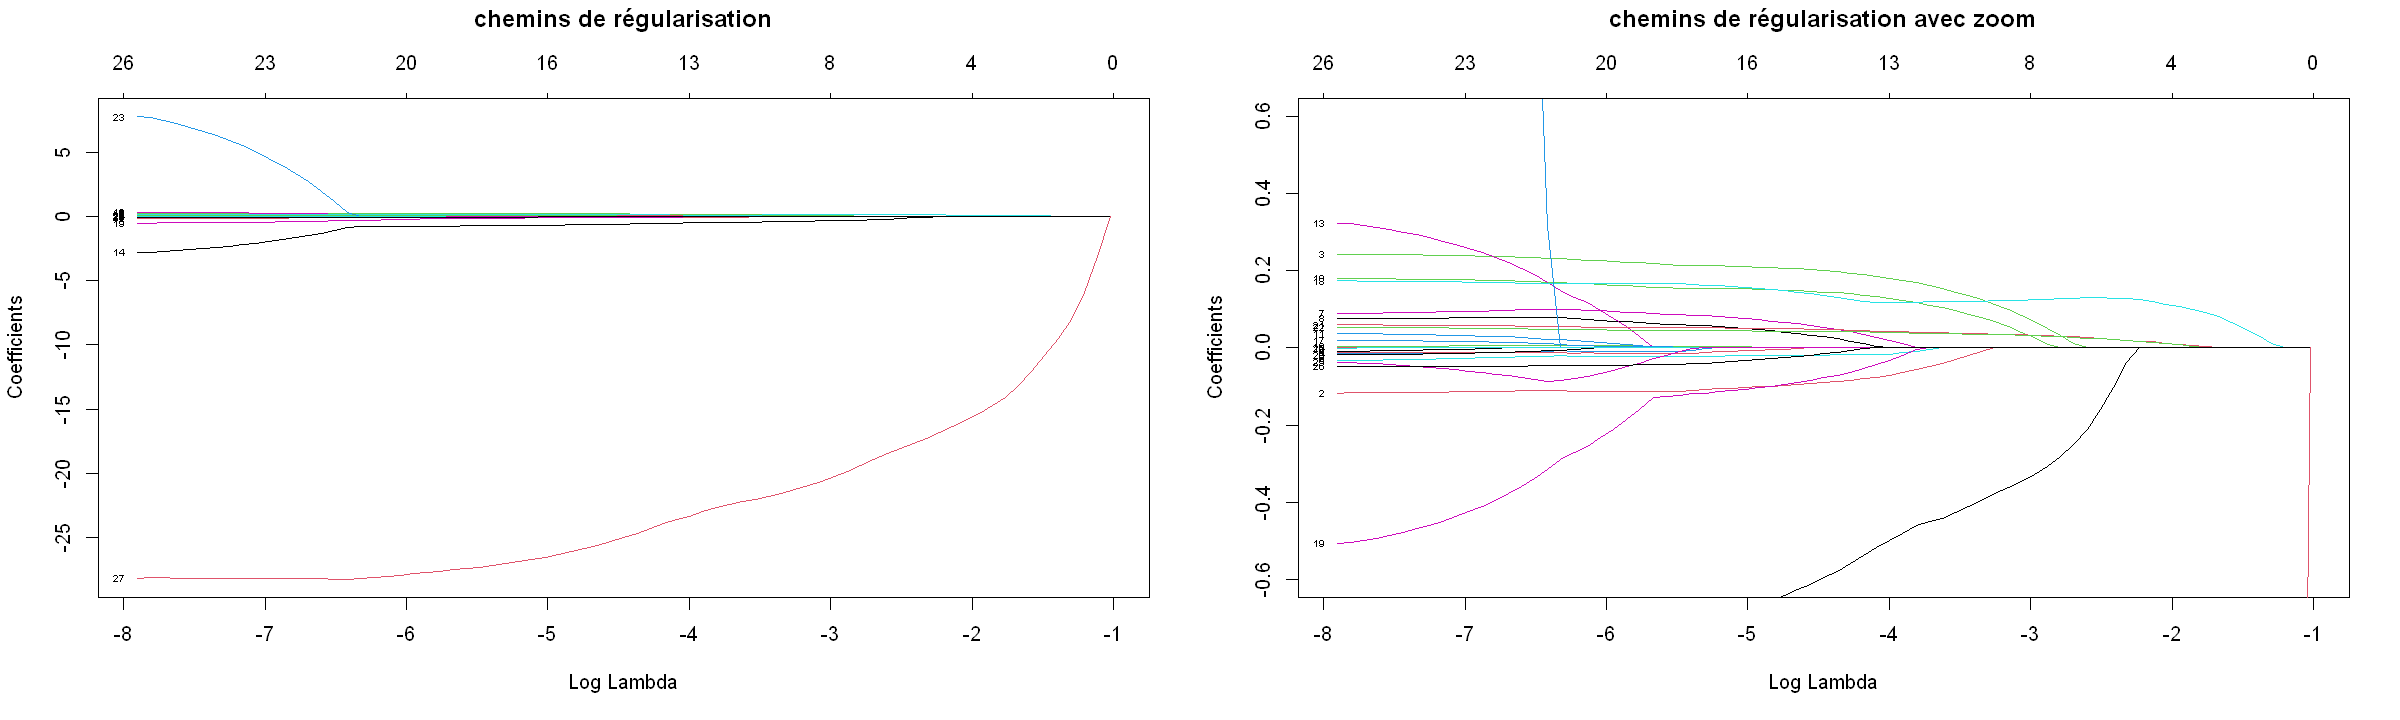

In [39]:
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 17], #rain_mod : variable à expliquer
                           x = as.matrix(datappr[, -c(1, 17)])) #on retire date (qualitative) et rain_mod (variable à expliquer)

# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)                          
x.mat <- model.matrix(rain_mod ~ . - 1, data = datappr) #-1 : on enlève l'intercept car dans la regression de Lasso on ne pénalise pas l'intercept
                                                        #sinon on aurait des solutions dépendantes de la position d'origine
reg.lasso <- glmnet(y = datappr$rain_mod, x = x.mat)

options(repr.plot.width = 20, repr.plot.height = 6)
par(mfrow = c(1, 2))
plot(reg.lasso, xvar = "lambda", label = TRUE)#premier plot global
title("chemins de régularisation", adj = 0.5, line = 3) 

plot(reg.lasso, xvar = "lambda", label = TRUE,ylim = c(-0.6,0.6)) #deuxième plot, zoom
title("chemins de régularisation avec zoom", adj = 0.5, line = 3) 

#legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))  #enlève la légende qui sort du graphe car trop grande
print(paste(1:ncol(x.mat), " - ", colnames(x.mat))) #on rajoute la légende hors des graphes

In [40]:
head(x.mat[,c(1:12)])

,dateaoût,dateavril,datedécembre,datefévrier,datejanvier,datejuillet,datejuin,datemai,datemars,datenovembre,dateoctobre,dateseptembre
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0


**Q** Que fait la commande model.matrix ? Comment sont gérées les variables catégorielles ?

<FONT COLOR = "blue"> La commande **model.matrix** crée une matrice dans laquelle les variables **qualitatives** sont séparées par modalités, et pour garder un modèle régulier on supprime la première modalité des variables qualitatives (ce qui revient à les mettre dans l'intercept). Les colonnes de modalités ne contiennent plus que des 0 et des 1 selon si la modalité considérée est présente sur l'élément observé. Cela permet de transformer les variables **qualitatives** en variables **quantitatives** (c'est à dire avec des indicatrices)

<FONT COLOR = "blue"> Attention : pour les variables qualitatives deux cas à traiter différemment :

- <FONT COLOR = "blue"> si il y a un intercept : on est obligé de mettre à 0 une modalité pour chaque variable qualitative (pour éviter le surajustement et ça n'enlève pas d'information car on peut retrouver l'indicatrice de la modalité enlevée en regardant la modalité de toutes les autres modalités)
       
- <FONT COLOR = "blue"> si il n'y a pas d'intercept : on est obligé de mettre pour toutes les variables qualitatives une modalité à 0 sauf pour une des variables qualitatives (pour pas que le modèle ne soit surparamétré et que l'on soit plus dans le cas régulier).

 
**Q** Que représentent les courbes ci-dessus, appelées "chemins de régularisation"?

<FONT COLOR = "blue"> Ce graphique représente les chemins de régularisation. $\lambda$ est le pramètre de pénalisation dans la regression LASSO. 
On trace pour chaque valeur de $log (\lambda)$ en abscisse, l'estimation des paramètres de notre modèle contenus dans le vecteur $\hat \theta$. Chaque courbe est une variable de $\hat \theta$. Lorsque la courbe touche 0, le coefficient correspondant dans $\hat \theta$ s'annule. 

<FONT COLOR = "blue"> Plus $\lambda$ augmente et plus les paramètres du vecteur $\hat \theta$ vont être estimés à 0 (pour que le terme de pénalisation $l_1$ reste constant). Ainsi, plus $\lambda$ augmente et plus on a de coefficients nuls dans $\hat \theta$ donc plus notre estimateur $\hat \theta$ devient sparse. 

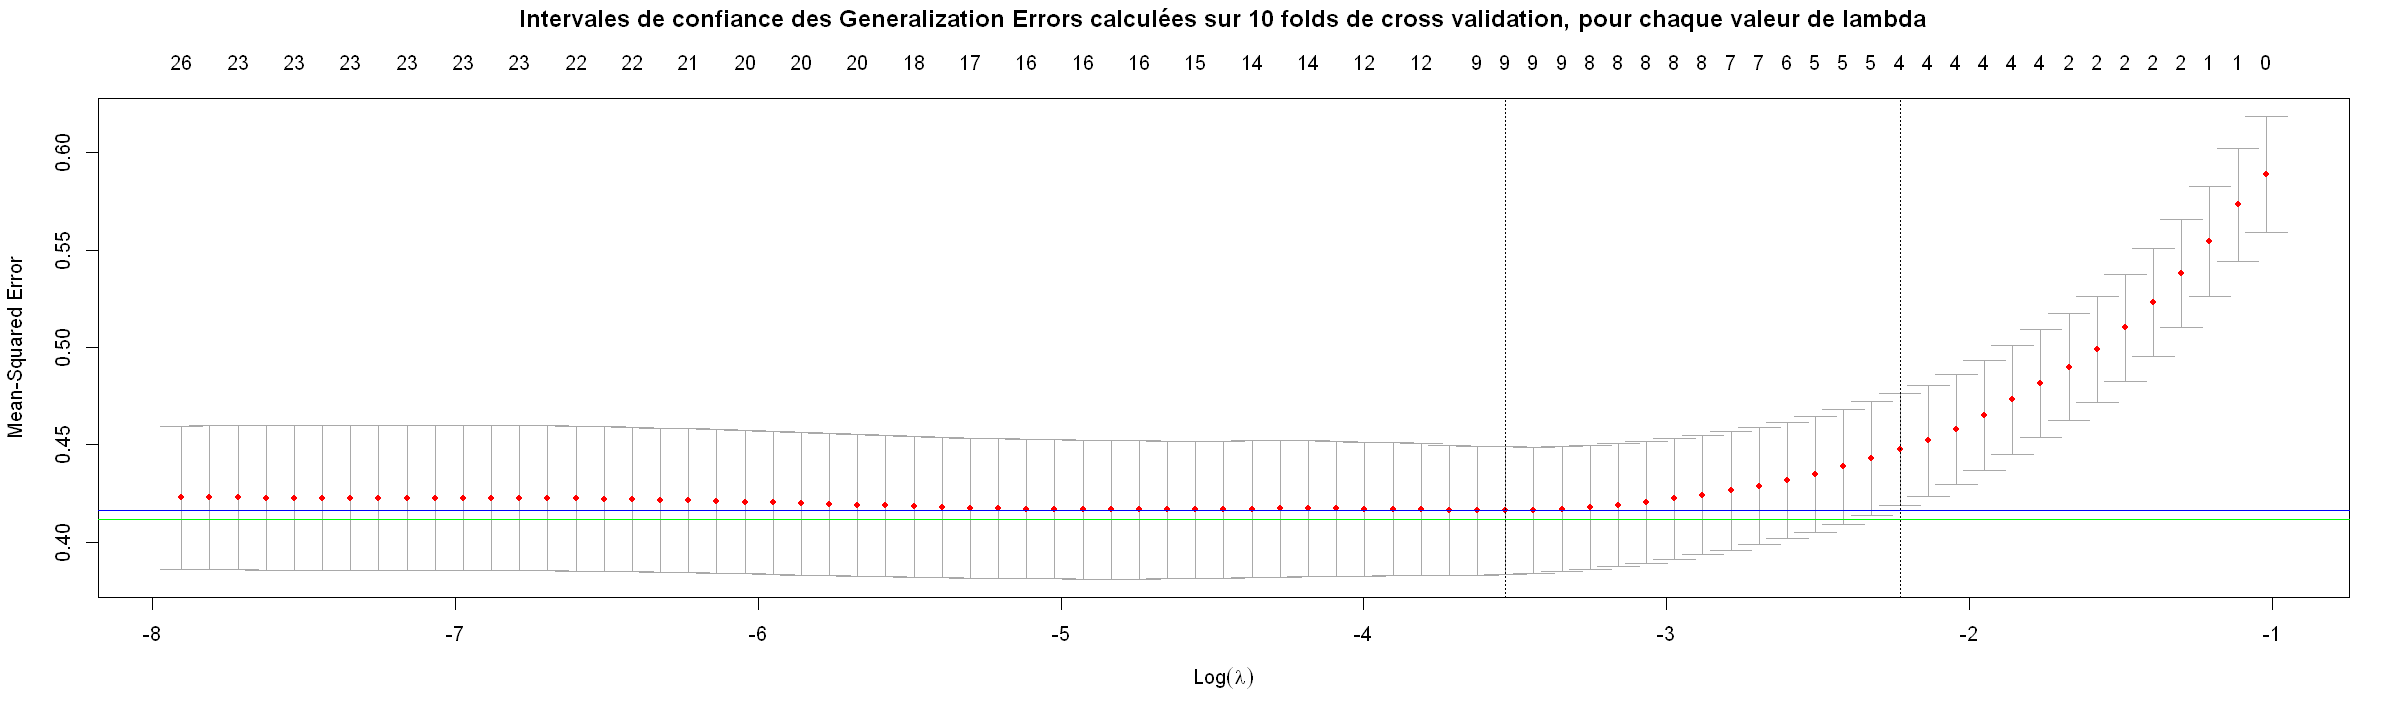

In [41]:
# choix du paramètre de régularisation par validation croisée
reg.lasso.cv <- cv.glmnet(y = datappr[, 17], x = x.mat) #cv.glmnet : k-fold cross-validation pour glmnet
plot(reg.lasso.cv) 
title("Intervales de confiance des Generalization Errors calculées sur 10 folds de cross validation, pour chaque valeur de lambda", adj = 0.5, line = 3) 

#reg.lasso.cv$cvm : moyennes des intervalles de confiance  
# =  moyenne des generalization errors Rp(f) = points rouges

abline(h=min(reg.lasso.cv$cvm), col="blue")

#on trace la tangente horizontale associée au min des moyennes des generalization errors Rp(f)
abline(h=min(reg.lasso.cv$cvm)-std.error(reg.lasso.cv$cvm), col="green") 

#std.error = calcule l'écart type de la moyenne 

#lambda.1se : largest value of lambda such that error is within 1 standard error of the minimum.

In [42]:
help(cv.glmnet)

**Q** Que représente la courbe rouge ? Et la bande qui est autour ? 

<FONT COLOR = "blue"> Pour différentes valeurs de $log (\lambda)$, le graphique ci-dessus représente les intervalles de confiance des **generalization error = $R_P(f)$** des 10 folds de la k-fold cross validation. Les points rouges représentent la moyenne des intervalles de confiance donc la moyenne des **generalization error** croisée sur les 10 folds. Les intervalles en gris sont les bords de l'intervalle de confiance qui fluctue autour de la moyenne. (1 Intervalle de Confiance  = 1 generalization error croisée des 10 folds pour 1 valeur de $\lambda$)


**Q** Comment sont obtenues les valeurs de log(lambda) correspondant aux lignes verticales en pointillé ?
    
- <FONT COLOR = "blue"> 1ère ligne en pointillé (bleue) = La valeur de $\lambda$ pour laquelle la moyenne est la plus petite.

- <FONT COLOR = "blue"> 2ème ligne en pointillé (verte) = la valeur de $\lambda$ telle que l'erreur reste en dessous du minimum + un écart type => ce n'est pas l'erreur minimale mais elle reste raisonnable.
    
<FONT COLOR = "red"> quand je regarde la valeur de $\lambda_{1se}$ en tapant "reg.lasso.cv" et la valeur de "min(reg.lasso.cv$cvm)-std.error(reg.lasso.cv$cvm)" qui correspond à la courbe verte, je ne trouve pas la même chose... à quoi correspond la courbe verte ?
    
<FONT COLOR = "blue"> Comment choisir $\lambda$ ? 
    
- <FONT COLOR = "blue"> On choisit $\lambda_{min}$ si on veut diminuer la **generalization error** donc si on veut prédire en diminuant l'erreur de notre modèle. Il s'agit du $\lambda$ pour lequel la valeur de la moyenne des **generalization error** sur les 10 folds est la plus faible. 
    
- <FONT COLOR = "blue"> On choisit $\lambda_{1se}$ si l'objectif est de prédire correctement (**generalization error** plutôt faible) tout en diminuant le nombre de variable de notre modèle. Il s'agit du plus grand $\lambda$ tel que la valeur minimale de la moyenne appartienne encore à l'intervalle de confiance <FONT COLOR = "red"> - quel intervalle de confiance ? - </font>(on prend le $\lambda$ le plus grand tel que la droite bleue passe dans l'IC). *Remarque* : $\lambda_{1se}$ donne la plus grande valeur de $\lambda$ tel que la generalization error soit à une distance de 1 erreur standard de l'erreur minimale. Rappel : erreur standard : std(x) = sd(x)/sqrt(length(x)). 

In [43]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 7))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.107581"

28 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)     194.57522342
dateaoût          .         
dateavril         .         
datedécembre      .         
datefévrier       .         
datejanvier       .         
datejuillet       .         
datejuin          .         
datemai           .         
datemars          .         
datenovembre      .         
dateoctobre       .         
dateseptembre     .         
ff_mod            .         
t_mod             .         
td_mod            .         
hu                .         
dd_mod            .         
precip_mod        0.12524433
ws_arome_mod      .         
p3031_arome_mod   .         
u10_arome         0.01810893
v10_arome         0.01630587
t2m_arome_mod     .         
d2m_arome_mod     .         
r_arome_mod       .         
tp_arome_mod      .         
msl_arome_mod   -16.81738811

In [44]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 7))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")

[1] "CV estimate of lambda : 0.0292468"

28 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)     261.675684594
dateaoût          .          
dateavril        -0.030651083
datedécembre      0.145230489
datefévrier       .          
datejanvier       .          
datejuillet       .          
datejuin          .          
datemai           .          
datemars          .          
datenovembre      0.096321470
dateoctobre       .          
dateseptembre     .          
ff_mod            .          
t_mod            -0.427798811
td_mod            .          
hu                0.001238905
dd_mod            .          
precip_mod        0.120741636
ws_arome_mod      .          
p3031_arome_mod   .          
u10_arome         0.038570493
v10_arome         0.037019030
t2m_arome_mod     .          
d2m_arome_mod     .          
r_arome_mod       .          
tp_arome_mod      .          
msl_arome_mod   -22.026434523

**Q** Combien restent-ils de coefficients non nuls. Vérifier sur les chemins de régularisation.

**Q** Même question en choisissant l'autre valeur de lambda retenue par glmnet, i.e. "reg.lasso.cv$lambda.min"

- <FONT COLOR = "blue"> Avec $\lambda_{min}$, il y a 9 paramètres non nuls (plus l'intercept) donc 9 variables non nulles dans notre modèle. 

- <FONT COLOR = "blue"> Avec $\lambda_{1se}$, il y a 4 paramètres non nuls (plus l'intercept) donc 4 variables non nulles dans notre modèle. On voit que l'on a grandement diminué le nombre de variables de notre modèle. La regression LASSO permet donc de faire de la sélection de variables.
    
<FONT COLOR = "blue"> *Remarque* : On peut aussi directement taper "reg.lasso.cv" pour avoir quelques infos sur $\lambda_{min}$ et $\lambda_{1se}$

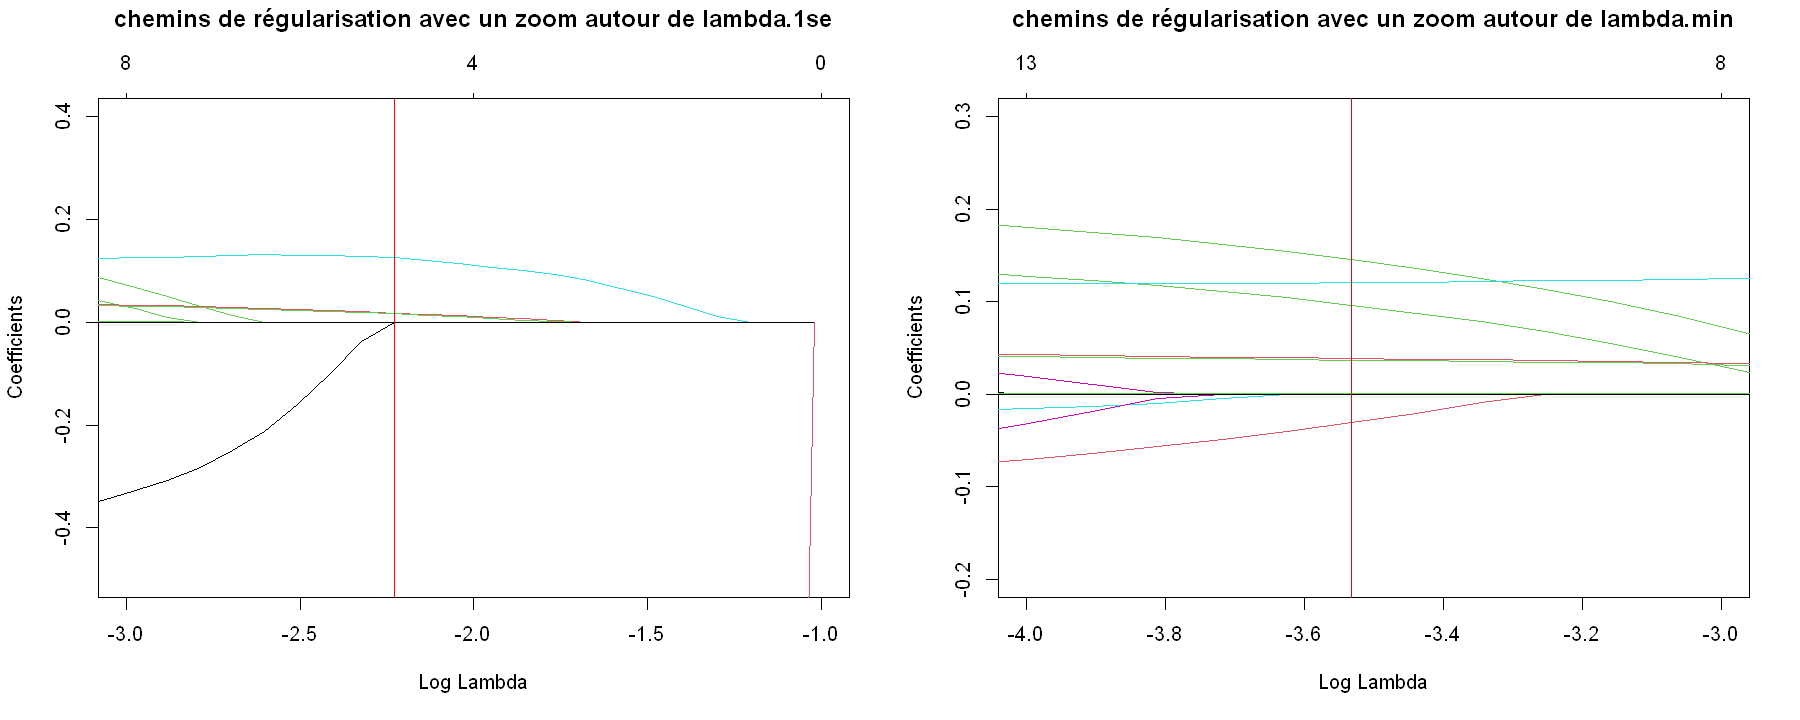

In [45]:
# NEW : 
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1,2))
plot(reg.lasso, xvar = "lambda", label = TRUE,ylim=c(-0.5,0.4),xlim=c(-3,-1))
title("chemins de régularisation avec un zoom autour de lambda.1se", adj = 0.5, line = 3) 
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

plot(reg.lasso, xvar = "lambda", label = TRUE,ylim=c(-0.2,0.3),xlim=c(-4,-3))
abline(v=log(reg.lasso.cv$lambda.min),col="red")
title("chemins de régularisation avec un zoom autour de lambda.min", adj = 0.5, line = 3) 

<FONT COLOR = "blue"> En traçant les chemins de régularisation plus en détail autour de $\lambda_{1se}$ et  $\lambda_{min}$ on vérifie bien qu'avec $\lambda_{1se}$ 4 variables sont non nulles tandis qu'avec $\lambda_{min}$ 9 variables sont non nulles.

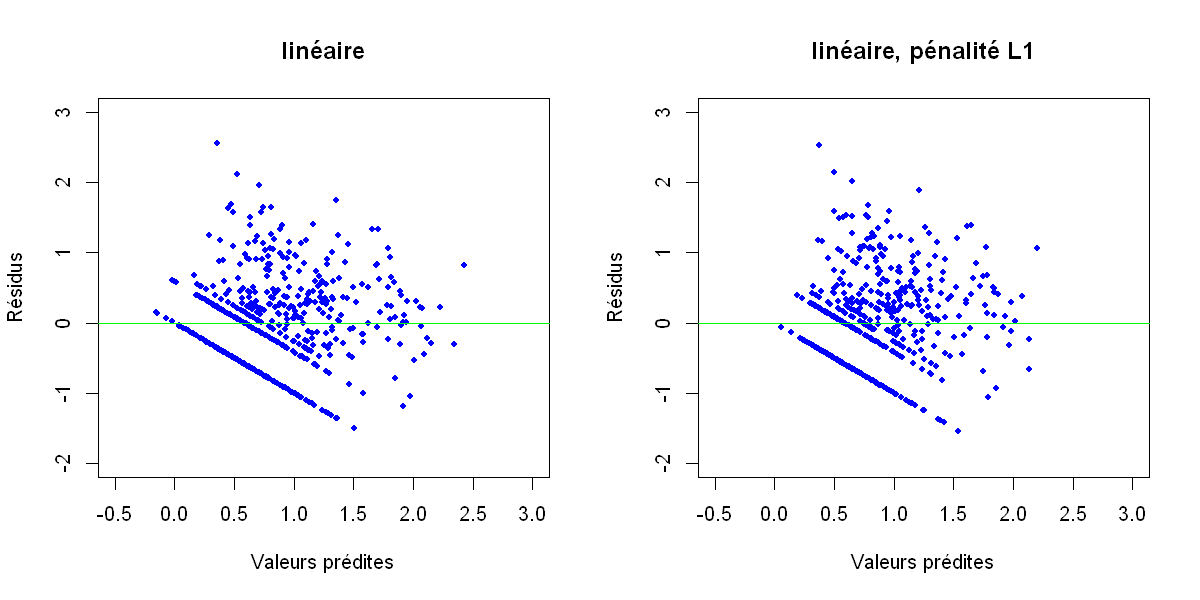

In [46]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$rain_mod - fit.lasso
# Graphe des résidus
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")

<FONT COLOR = "blue"> On remarque un graphe plus ramassé avec la gression lasso (pénalité L1). La dispersion des données sur l'axe des ordonées semble identique tandis que la dispersion sur l'axe des abscisses est moins importante avec la pénalité L1. 

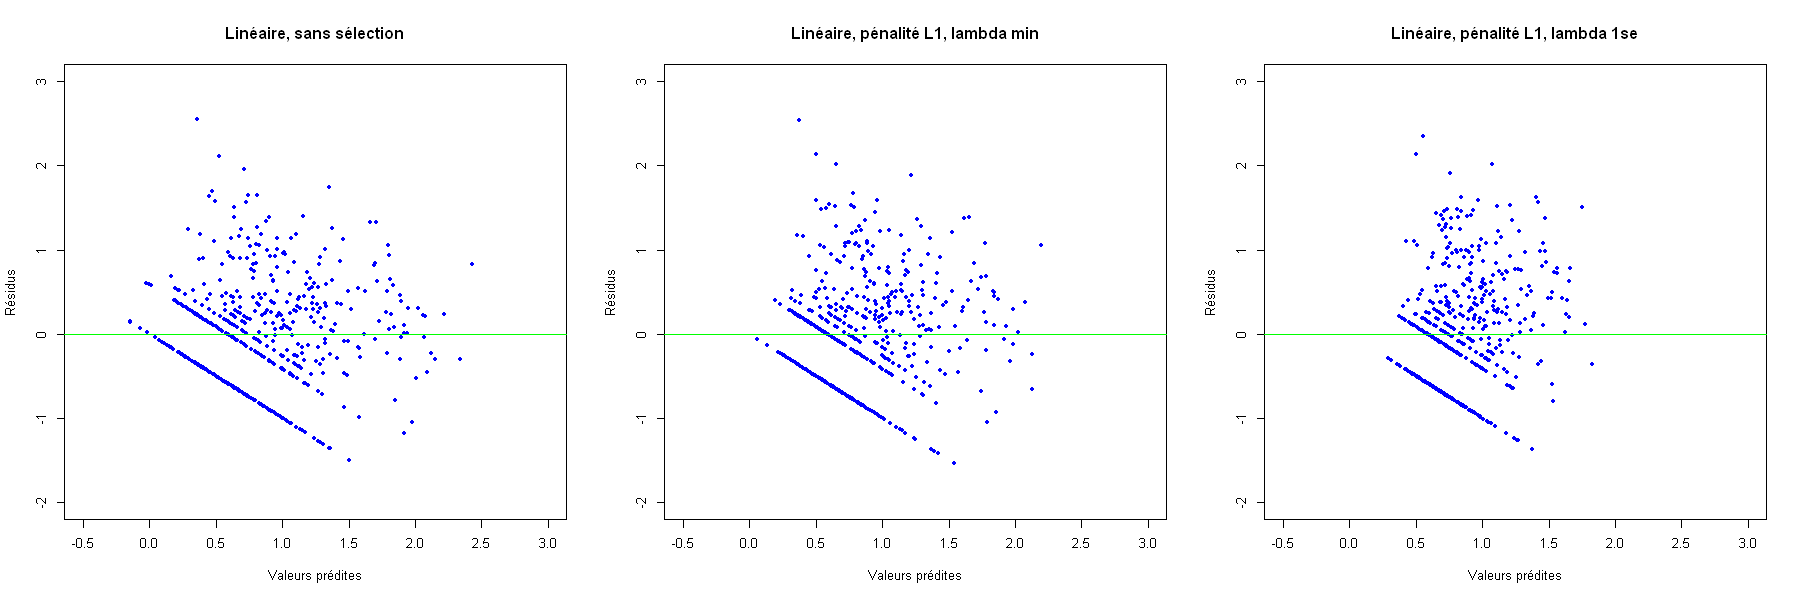

In [47]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$rain_mod - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat) # NEW
res.lasso.1se <- datappr$rain_mod - fit.lasso.1se # NEW

# Graphe des résidus
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 3))
plot.res(fit.lm, res.lm, "Linéaire, sans sélection")
plot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
plot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") # NEW

**Q** Commenter. 

<FONT COLOR = "blue"> On observe que moins il y a de variables en jeu et plus le graphe des résidu a une petite variance selon l'axe des abscisses (de gauche à droite : le premier graphe contient toutes les variables soit 18, le deuxième avec $\lambda_{min}$ contient 16 variables et le dernier avec $\lambda_{1se}$ en contient 4). 
</font> 
    
**Q** Calculer le critère MSE (moyenne des carrés des résidus) pour les deux modèles. Pourquoi celui obtenu par LASSO est-il moins bon ? Quel critère LASSO minimise t-il ?


#### Erreur de regression

In [48]:
# MSE sur l'échantillon d'apprentissage
#-----------------------------------------------------------
paste("Modèle linéaire sans séletion:",mean(res.lm^2)) #res = résidus
paste("LASSO avec lambda.min:",mean(res.lasso^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))

[1] "Modèle linéaire sans séletion: 0.379635774430501"

[1] "LASSO avec lambda.min: 0.397262615137189"

[1] "LASSO avec lambda.1se: 0.435072426301562"

In [49]:
#erreur de généralisation  = MSE sur l'échantillon de test
#-----------------------------------------------------------
#nouvelle x.mat mais avec l'echantillon de test :
x.mat.pred <- model.matrix(rain_mod ~ . - 1, data = datestr) 
#prédiction modèle linéaire simple avec échantillon de test :
fit.lm.pred <- predict(reg.lm, newdata = datestr) #fit = valeurs ajustées
#prédiction modèle linéaire lasso lambda.min avec échantillon de test :
fit.lasso.pred <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat.pred)
#prédiction modèle linéaire lasso lambda.1se avec échantillon de test :
fit.lasso.1se.pred <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat.pred)

paste("Modèle linéaire sans séletion:", sum((fit.lm.pred-datestr[,"rain_mod"])^2)/nrow(datestr))
paste("LASSO avec lambda.min:",sum((fit.lasso.pred-datestr[,"rain_mod"])^2)/nrow(datestr) )
paste("LASSO avec lambda.1se:", sum((fit.lasso.1se.pred-datestr[,"rain_mod"])^2)/nrow(datestr))

[1] "Modèle linéaire sans séletion: 0.425146232832489"

[1] "LASSO avec lambda.min: 0.428457464443355"

[1] "LASSO avec lambda.1se: 0.446425836164524"

<FONT COLOR = "blue"> Le critère MSE obtenu par LASSO est moins bon car c'est un sous modèle, donc l'erreur commise est forcément plus importante. Cependant, ce n'est pas très important car on souhaite surtout minimiser la **generalization error** alors que la MSE correspond à l'erreur d'apprentissage (il faut tout de même que cette erreur reste raisonnable).
La regression classique minimise $\lVert Y-X\theta \rVert$ tandis que la regression LASSO minimise cette quantité + une pénalisation L1. Il est donc normal que la MSE soit plus importante pour LASSO. 
</font> 
 
**Q** Estimer l'erreur de généralisation du modèle de régression linéaire simple sans sélection de variables par validation croisée. Comparer avec celle du LASSO. Qu'observez-vous?

In [50]:
# NEW
V=10  #10 folds pour la cross-validation
nV=floor(nrow(datappr)/V) #nombre d'éléments que contient chaque fold
S=sample(1:nrow(datappr),replace=FALSE) #tirage sans remise d'une valeur entre 1 et nrow(datappr)
# ie : tous les nombres de 1 à nrow(datappr) sont présents 1 seule fois dans S, avec un ordre aléatoire
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] #on enlève le set de validation du set d'apprentissage
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),] #set de validation
    error.CV=c(error.CV,mean((datappr.valid$rain_mod-predict(aov(rain_mod ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}

#error.CV = generalization error calculée sur le set d'entrainement et évaluée sur le set de validation 
#qui représente des nouvelles données
mean(error.CV)
print(reg.lasso.cv)

[1] 0.4214479


Call:  cv.glmnet(x = x.mat, y = datappr[, 17]) 

Measure: Mean-Squared Error 

     Lambda Index Measure      SE Nonzero
min 0.02925    28  0.4161 0.03284       9
1se 0.10758    14  0.4474 0.02884       4


<FONT COLOR = "blue"> La generalization error du modèle de régression linéaire simple sans sélection de variables calulée par validation croisée vaut 0.422999867522327. La generalization error du modèle de régression LASSO vaut 0.4136 avec $\lambda_{min}$ et 0.4412 avec $\lambda_{1se}$. Ainsi, la generalization error est plus faible avec la regression LASSO avec $\lambda_{min}$ et plus importante avec la regression LASSO $\lambda_{1se}$. L'avantage de la LASSO $\lambda_{1se}$ est que le nombre de variables est fortement réduit, même si sa generalization error est plus importante. 

<font color = "blue"> Table de confusion pour la régression. On tranforme la variable prédite sur l'échantillon de test en variable qualitative : 
- <font color = "blue"> $\hat Y = 0$
- <font color = "blue"> $0 < \hat Y \le 2$
- <font color = "blue"> $\hat Y \ge 2$

#### Erreur de classification (matrice de confusion)

<font color = "blue"> La fonction suivante permet de tranformer la variable quantitaive rain en une variable qualitative avec 3 modalités. Comme nous avons appliqué la transformation $(.)^{1/3}$ à rain nous appliquons aussi cette tranformation sur les seuils. 

In [51]:
RegToClassif <- function (pred){
    "Cette fonction permet de transformer la variable quantitative pred
    en une variable qualitative en 3 modalités avec les seuils 0 et 2**(1/3)"
    n = length(pred)
    result = matrix(, nrow = n, ncol = 0)
    for (i in 1:n ){
        if (pred[i] < 0) {
            result [i] = "no_rain" 
        }
        if ((pred[i] >= 0) & (pred[i] <= 2**(1/3))){
            result [i] = "low_rain"            
        } 
        if (pred[i] > 2**(1/3)) {
            result [i] = "high_rain"           
        }        
    } 
    return (as.factor(result))
}

<FONT COlOR = "blue"> On peut calculer la pureté qui est un indice pour comparer la performance de la classification.

In [52]:
purity <- function (table){
    "Cette fonction calcule l'indice de pureté d'une table de confusion. 
    Plus la valeur de la pureté est haute et meilleure est la prédiction."
    n = dim(table)[1]
    p = 0 
     for (i in 1:n) {
         #p = p + max(table[i,])}
         p = p + table[i,i]}
    return(p/sum(table))}

<FONT COlOR = "blue"> Nous transformons les variables de la regression en classes avec la fonction RegToClassif

In [53]:
fit.lm.pred.C = table(RegToClassif(fit.lm.pred), datestq[, "rain_class"])
fit.lasso.pred.C = table(RegToClassif(fit.lasso.pred), datestq[, "rain_class"])
fit.lasso.1se.pred.C = table(RegToClassif(fit.lasso.1se.pred), datestq[, "rain_class"])

print("--- Table de contingence Modèle linéaire sans séletion")
fit.lm.pred.C 
print("--- Table de contingence LASSO avec lambda.min")
fit.lasso.pred.C
print("--- Table de contingence LASSO avec lambda.1se")
fit.lasso.1se.pred.C 

paste("Purity Modèle linéaire sans séletion:", purity(fit.lm.pred.C))
paste("Purity LASSO avec lambda.min:",purity(fit.lasso.pred.C))
paste("Purity LASSO avec lambda.1se:", purity(fit.lasso.1se.pred.C))

[1] "--- Table de contingence Modèle linéaire sans séletion"


           
            high_rain low_rain no_rain
  high_rain        13        6       1
  low_rain         22       57      36
  no_rain           1        0       2

[1] "--- Table de contingence LASSO avec lambda.min"


           
            high_rain low_rain no_rain
  high_rain        11        6       1
  low_rain         25       57      38

[1] "--- Table de contingence LASSO avec lambda.1se"


           
            high_rain low_rain no_rain
  high_rain         8        4       1
  low_rain         28       59      38

[1] "Purity Modèle linéaire sans séletion: 0.521739130434783"

[1] "Purity LASSO avec lambda.min: 0.492753623188406"

[1] "Purity LASSO avec lambda.1se: 0.485507246376812"

### Modèle quadratique

L'étude suivante met en oeuvre toutes les interactions d'ordre 2 entre les variables. Il s'agit donc d'un modèle de régression quadratique. Il est estimé avec la fonction glm qui permet une sélection automatique de modèle. La méthode descendante est utilisée mais celle pas-à-pas pourrait également l'être. Ce type de procédure n'est pas implémentée en python.

#### Sélection de variables par critère AIC

Sélection descendante: à chaque étape, chaque modèle est comparé à tous les sous-modèles possibles obtenus par suppression d'une des interactions ou une des variables, à condition qu'elle ne soit pas présente dans une interaction. La variable sélectionnée et supprimée est celle qui fait décroîre le critère considéré : AIC ou *Akaïke Information Criterion*. 

**Q** Quel autre critère, équivalent à AIC dans le cas gaussien et de variance résiduelle connue, est utilisée en régression linéaire? 


<FONT COLOR = "blue">  Le critère BIC, qui pénalise plus fortement les modèles complexes (ie : avec le plus de variables) et favorise donc les modèles avec peu de variables par rapport au cirtère AIC.

### <FONT COLOR = "green">  Attention ! La cellule suivante est longue à faire tourner :

In [54]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm <- glm(rain_mod ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

Start:  AIC=1149.48
rain_mod ~ (date + ff_mod + t_mod + td_mod + hu + dd_mod + precip_mod + 
    ws_arome_mod + p3031_arome_mod + u10_arome + v10_arome + 
    t2m_arome_mod + d2m_arome_mod + r_arome_mod + tp_arome_mod + 
    msl_arome_mod)^2

                                Df Deviance    AIC
- date:ws_arome_mod             11   89.844 1138.3
- date:ff_mod                   11   90.261 1140.9
- date:v10_arome                11   90.286 1141.0
- date:hu                       11   90.354 1141.4
- date:u10_arome                11   90.586 1142.8
- date:t_mod                    11   90.796 1144.1
- date:td_mod                   11   90.917 1144.8
- precip_mod:u10_arome           1   88.091 1147.5
- t_mod:ws_arome_mod             1   88.091 1147.5
- hu:dd_mod                      1   88.091 1147.5
- dd_mod:d2m_arome_mod           1   88.091 1147.5
- v10_arome:tp_arome_mod         1   88.091 1147.5
- hu:ws_arome_mod                1   88.091 1147.5
- d2m_arome_mod:msl_arome_mod    1   88.092

In [55]:
# Coefficients du modèle
anova(reg.glm.step, test = "F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,549,323.0925,NA,NA
date,11,1.609474e+01,538,306.9977,4.961702593,3.361555e-07
ff_mod,1,1.523984e+01,537,291.7579,51.679687118,3.685499e-12
t_mod,1,4.006120e-01,536,291.3573,1.358511470,2.445526e-01
td_mod,1,6.147860e+00,535,285.2094,20.847947056,6.795949e-06
hu,1,8.341463e-03,534,285.2011,0.028286653,8.665293e-01
dd_mod,1,7.594239e+00,533,277.6068,25.752750536,6.178703e-07
precip_mod,1,2.737992e+01,532,250.2269,92.847780885,9.743937e-20
ws_arome_mod,1,1.261970e+00,531,248.9649,4.279454298,3.927556e-02


#### Sélection de variable par régularisation L1 (LASSO)

In [56]:
# Comparer avec un modèle quadratique avec pénalité L1
x.mat2 <- model.matrix(rain_mod ~ .^2 - 1, data = datappr)
reg.lasso2.cv <- cv.glmnet(y = datappr[, "rain_mod"], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")

298 x 1 sparse Matrix of class "dgCMatrix"
                                         s1
(Intercept)                    1.980313e+02
dateaoût                       .           
dateavril                      .           
datedécembre                   .           
datefévrier                    .           
datejanvier                    .           
datejuillet                    .           
datejuin                       .           
datemai                        .           
datemars                       .           
datenovembre                   .           
dateoctobre                    .           
dateseptembre                  .           
ff_mod                         .           
t_mod                          .           
td_mod                         .           
hu                             .           
dd_mod                         .           
precip_mod                     .           
ws_arome_mod                   .           
p3031_arome_mod                . 

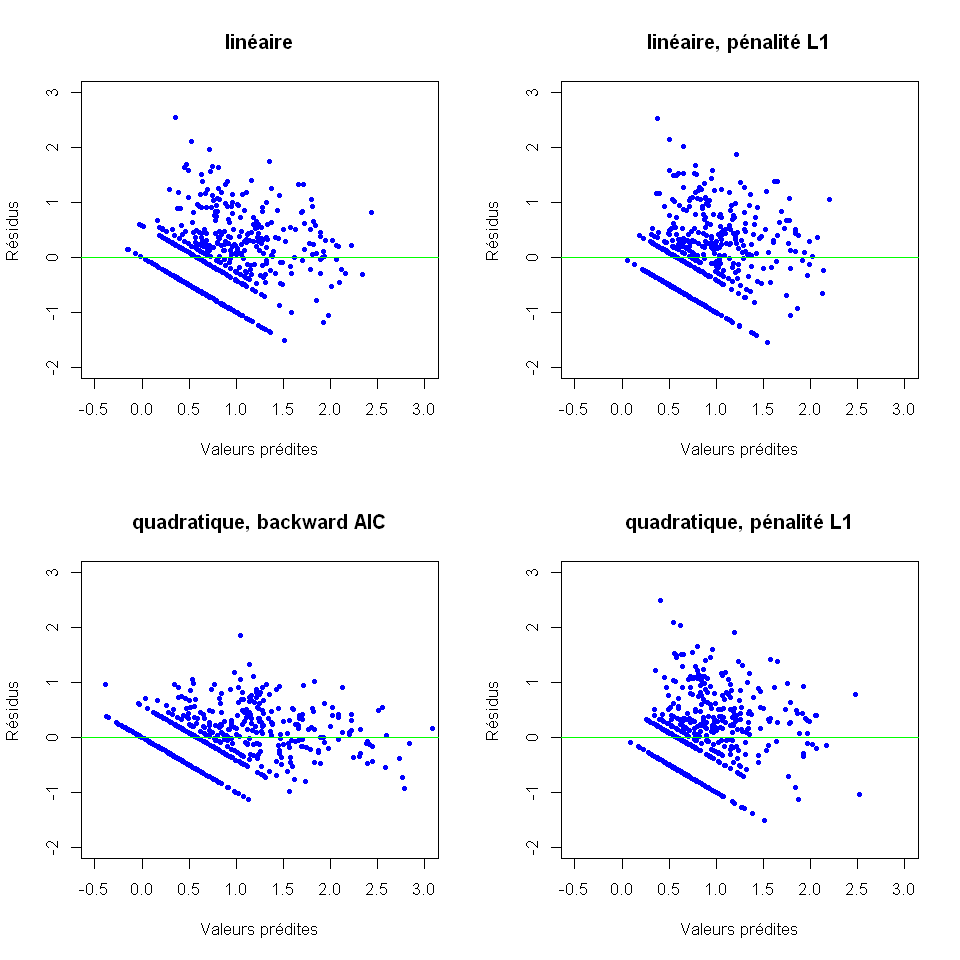

In [57]:
# Extraction des valeurs ajustées et des résidus
fit.glm.step <- reg.glm.step$fitted.values
res.glm.step <- reg.glm.step$residuals
fit.lasso2 <- predict(reg.lasso2.cv, s = "lambda.min", newx = x.mat2)
res.lasso2 <- datappr$rain_mod  - fit.lasso2

# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(2, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")
plot.res(fit.glm.step, res.glm.step, "quadratique, backward AIC")
plot.res(fit.lasso2, res.lasso2, "quadratique, pénalité L1")

 On remarque que la présence de certains interactions ou variables sont pertinentes au sens du critère d'Akaïke mais pas significative au sens du test de Fisher. Cette présence dans le modèle pourrait être plus finement analysée en considérant une estimation de l'erreur par validation croisée. L'idée serait de retirer une à une les variables ou interactions les moins significatives pour voir comment se comporte la validation croisée. D'autre part, si la procédure pas-à-pas conduit à un modèle différent, l'estimation de l'erreur par validation croisée permet également d'optimiser le choix.
 
Ces raffinements ne s'avèrent pas efficaces sur ces données. Le modèle obtenu par minimisaiton du critère AIC est conservé.

### Prévision de l'échantillon test

Le modèle "optimal" obtenu par la méthode stepwise est utilisé pour prédire l'échantillon test et estimer ainsi, sans biais, une erreur de prévision. Deux erreurs sont estimées ; la première est celle quadratique pour la régression tandis que la deuxième est issue de la matrice de confusion qui croise les dépassements de seuils prédits avec ceux effectivement observés. 

#### Erreur de régression

In [58]:
# MSE sur l'échantillon d'apprentissage
#---------------------------------------------------
paste("Modèle quadratique sans séletion:", mean(reg.glm$residuals^2)) #res = rédidus
paste("Modèle quadratique sélection AIC:",mean(res.glm.step^2))
paste("Modèle quadratique sélection LASSO lambda_min:", mean(res.lasso2^2))

[1] "Modèle quadratique sans séletion: 0.160164707963044"

[1] "Modèle quadratique sélection AIC: 0.196772327840522"

[1] "Modèle quadratique sélection LASSO lambda_min: 0.385824884893422"

In [59]:
#erreur de généralisation  = MSE sur l'échantillon de test
#-----------------------------------------------------------
#nouvelle x.mat mais avec l'echantillon de test :
x.mat2.pred <- model.matrix(rain_mod ~ .^2 - 1, data = datestr)
#prédiction modèle quadratique simple (sans  sélection de variables) avec échantillon de test :
fit.glm.pred <- predict(reg.glm, newdata = datestr) #fit = valeurs ajustées
#prédiction modèle quadratique sélection backward AIC avec échantillon de test :
fit.glm.step.pred <- predict(reg.glm.step, newdata = datestr) 
#prédiction modèle quadratique lasso lambda.min avec échantillon de test :
fit.glm.lasso.pred <- predict(reg.lasso2.cv, newx = x.mat2.pred)

# Erreur quadratique moyenne de prévision (MSE)
paste("Modèle quadratique sans séletion:", sum((fit.glm.pred - datestr[, "rain_mod"])^2) / nrow(datestr))
paste("Modèle quadratique sélection AIC:",sum((fit.glm.step.pred - datestr[, "rain_mod"])^2) / nrow(datestr))
paste("Modèle quadratique sélection LASSO lambda_min:",sum((fit.glm.lasso.pred - datestr[, "rain_mod"])^2) / nrow(datestr))

[1] "Modèle quadratique sans séletion: 0.958622293803285"

[1] "Modèle quadratique sélection AIC: 0.749314504723508"

[1] "Modèle quadratique sélection LASSO lambda_min: 0.440824429770285"

In [60]:
# Erreur quadratique par AROME
sum((datestr[,"tp_arome_mod"] - datestr[,"rain_mod"])^2) / nrow(datestr)

[1] 4.107378

<FONT COLOR = "blue"> L'erreur quadrarique est beaucoup plus grande pour le modèle AROME. Cela montre que le modèle statistique améliore bien la prédiction. 

#### Erreur de classification (matrice de confusion)

<FONT COLOR = "blue"> Passage de la regression à la classification :

In [61]:
fit.glm.pred.C = table(RegToClassif(fit.glm.pred), datestq[, "rain_class"])
fit.glm.step.pred.C = table(RegToClassif(fit.glm.step.pred), datestq[, "rain_class"])
fit.glm.lasso.pred.C = table(RegToClassif(fit.glm.lasso.pred), datestq[, "rain_class"])

print("--- Table de contingence Modèle quadratique sans séletion")
fit.glm.pred.C 
print("--- Table de contingence Modèle quadratique sélection AIC")
fit.glm.step.pred.C
print("--- Table de contingence Modèle quadratique sélection LASSO lambda_min")
fit.glm.lasso.pred.C 

paste("Purity Modèle quadratique sans séletion:", purity(fit.glm.pred.C))
paste("Purity Modèle quadratique sélection AIC:",purity(fit.glm.step.pred.C))
paste("Purity Modèle quadratique sélection LASSO lambda_min:", purity(fit.glm.lasso.pred.C))

[1] "--- Table de contingence Modèle quadratique sans séletion"


           
            high_rain low_rain no_rain
  high_rain        17       15       9
  low_rain         17       42      17
  no_rain           2        6      13

[1] "--- Table de contingence Modèle quadratique sélection AIC"


           
            high_rain low_rain no_rain
  high_rain        16       13       6
  low_rain         18       45      24
  no_rain           2        5       9

[1] "--- Table de contingence Modèle quadratique sélection LASSO lambda_min"


           
            high_rain low_rain no_rain
  high_rain         8        4       1
  low_rain         28       59      38

[1] "Purity Modèle quadratique sans séletion: 0.521739130434783"

[1] "Purity Modèle quadratique sélection AIC: 0.507246376811594"

[1] "Purity Modèle quadratique sélection LASSO lambda_min: 0.485507246376812"

In [182]:
# Erreur de discrimiation pour AROME
pred.arome.C = table(RegToClassif(datestq[,"tp_arome_mod"]),datestq[, "rain_class"])
paste("Purity modèle arome en classification:", purity(pred.arome.C))
paste ("F1-Score modèle arome en classification:",F1_Score(RegToClassif(datestq[,"tp_arome_mod"]),datestq[, "rain_class"]))
pred.arome.C

[1] "Purity modèle arome en classification: 0.434782608695652"

[1] "F1-Score modèle arome en classification: 0.522522522522523"

           
            high_rain low_rain no_rain
  high_rain        29       32      14
  low_rain          7       31      25

## [Prévision par modèle binomial](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)

Plutôt que de prévoir la concentration puis le dépassement, on peut se poser la question de savoir s'il ne serait pas pertinent de prévoir directement la présence ou l'absence d'un dépassement. La variable à modéliser étant binaire, c'est la régression logistique qui va être employée. Comme pour la régression, différentes stratégies de choix de modèle peuvent être utilisées et comparées avant d'estimer l'erreur de prévision sur l'échantillon test.

### Régression logistique sans interaction

<FONT COLOR = "blue"> La variable à expliquer est ici **rain_class** qui est *qualitative* et possède 3 modalités. Ce n'est donc pas une variable binaire. Pour expliquer une variable *qualitative*, on utilise la **régression logistique**. Or, comme la variable n'est pas binaire, il faut utiliser la **regression logistique multiclasses** qui estime un modèle par classe: une classe contre les autres. 
On utilise alors la fonction **multinom** du package **nnet** qui ne nécessite pas que les données soient reshape au contraire d'autres packages qui font aussi de la regression multinomiale. 
    
<FONT COLOR = "blue"> *Documentation regression logistique multiclasse*: https://stats.oarc.ucla.edu/r/dae/multinomial-logistic-regression/

In [62]:
#On choisit la modalité de rain_class que nous souhaitons utiliser comme référence en utilisant relevel
#relevel réordonne les niveaux d'un facteur de sorte que le niveau spécifié par ref soit le premier 
datappq$rain_class <- relevel(datappq$rain_class, ref = "high_rain") 

#rq : ici high_rain était déjà la première modalité mais utile dans d'autres cas
#rq : utiliser datappq$rain_class2 <- relevel(datappq$rain_class, ref = "high_rain") pour ne pas modifier les data 
#mais crée une colonne supplémentaire dans datappq.

In [63]:
#multinom n'inclut pas le calcul des p-valeurs pour les coefficients de régression
#on les calcule en utilisant les tests de Wald (ici les tests z).

# estimation du modèle complet
log.lm <- multinom(rain_class ~ . , data = datappq,trace = FALSE)

In [64]:
summary(log.lm)

Call:
multinom(formula = rain_class ~ ., data = datappq, trace = FALSE)

Coefficients:
         (Intercept) dateavril datedécembre datefévrier datejanvier datejuillet
low_rain    -291.799 0.1828411   -0.6000509   0.1846116  -1.3178178  -0.2776646
no_rain     -132.490 0.5636089   -0.9806437   0.6767098   0.0503748  -0.1213859
           datejuin    datemai   datemars datenovembre dateoctobre
low_rain -0.1892691  0.2089057 -0.3134838   -1.0912696 0.057825462
no_rain  -0.3456192 -0.3382612  0.5034654   -0.6161332 0.003086649
         dateseptembre     ff_mod     t_mod     td_mod        hu      dd_mod
low_rain   -0.02113274 -0.6552865  85.66698  -86.80911 0.5102139  0.07128176
no_rain    -0.11128825 -1.2483252 118.01552 -102.61279 0.6039818 -0.09247725
         precip_mod ws_arome_mod p3031_arome_mod   u10_arome  v10_arome
low_rain -0.3640035    0.9146812     -0.20056575 -0.09091273 -0.1078304
no_rain  -0.8415732    2.0490674      0.04804126 -0.27966316 -0.2327718
         t2m_arome_mod d2

In [65]:
#significativité des paramètres
#fait le calcul à la main des p-valeurs :
z <- summary(log.lm)$coefficients/summary(log.lm)$standard.errors #statistique de Test observée (Student)
#utilise la fonction de répatition pour le calcul de la p-valeur :
#p <- 2*(1 - pnorm(abs(z), 0, 1)); p

deg_f = nrow(datappq)-1 #n-1 degrés de liberté
p <- 2*(1- pt(abs(z), deg_f)); p

,(Intercept),dateavril,datedécembre,datefévrier,datejanvier,datejuillet,datejuin,datemai,datemars,datenovembre,...,precip_mod,ws_arome_mod,p3031_arome_mod,u10_arome,v10_arome,t2m_arome_mod,d2m_arome_mod,r_arome_mod,tp_arome_mod,msl_arome_mod
low_rain,0,0.8227870,0.4965925,0.8289867,0.1543700,0.6692648,0.7639777,0.7502687,0.6972311,0.1604043,...,0.190922567,0.4631054,0.2575655,0.39844149,0.083107310,0,0,0,0.09790644,0
no_rain,0,0.5171151,0.3272565,0.4735634,0.9592122,0.8616535,0.6261667,0.6463067,0.5606647,0.4642843,...,0.007103257,0.1345303,0.7955748,0.02469396,0.000655281,0,0,0,0.10080696,0


<FONT COLOR = "blue"> Concernant le calcul des p-valeurs : On fait un test de student de nullité des paramètres $H_0 : \theta_i = 0 ~/~ H_1 : \theta_i \ne 0$. Si on se place dans le cas asymptotique (pour n assez grand) la loi de Student CV vers la loi Normale donc on peut utiliser `p <- 2*(1- pt(abs(z), deg_f))` pour la loi de student ou `p <- 2*(1- pnorm(abs(z), deg_f))]` pour la loi Normale. 

In [66]:
# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step<- step(log.lm, direction = "backward",trace = FALSE)

trying - date 
trying - ff_mod 
trying - t_mod 
trying - td_mod 
trying - hu 
trying - dd_mod 
trying - precip_mod 
trying - ws_arome_mod 
trying - p3031_arome_mod 
trying - u10_arome 
trying - v10_arome 
trying - t2m_arome_mod 
trying - d2m_arome_mod 
trying - r_arome_mod 
trying - tp_arome_mod 
trying - msl_arome_mod 
trying - ff_mod 
trying - t_mod 
trying - td_mod 
trying - hu 
trying - dd_mod 
trying - precip_mod 
trying - ws_arome_mod 
trying - p3031_arome_mod 
trying - u10_arome 
trying - v10_arome 
trying - t2m_arome_mod 
trying - d2m_arome_mod 
trying - r_arome_mod 
trying - tp_arome_mod 
trying - msl_arome_mod 
trying - t_mod 
trying - td_mod 
trying - hu 
trying - dd_mod 
trying - precip_mod 
trying - ws_arome_mod 
trying - p3031_arome_mod 
trying - u10_arome 
trying - v10_arome 
trying - t2m_arome_mod 
trying - d2m_arome_mod 
trying - r_arome_mod 
trying - tp_arome_mod 
trying - msl_arome_mod 
trying - t_mod 
trying - td_mod 
trying - hu 
trying - precip_mod 
trying - ws_ar

In [67]:
summary(log.lm.step)

Call:
multinom(formula = rain_class ~ t_mod + td_mod + hu + precip_mod + 
    ws_arome_mod + p3031_arome_mod + u10_arome + v10_arome + 
    t2m_arome_mod + d2m_arome_mod + r_arome_mod + tp_arome_mod + 
    msl_arome_mod, data = datappq, trace = FALSE)

Coefficients:
         (Intercept)    t_mod    td_mod        hu precip_mod ws_arome_mod
low_rain   -255.2382 52.07683 -51.84422 0.3015547 -0.3222384    0.2811991
no_rain     -98.6577 84.61613 -69.24379 0.4071720 -0.9581697    0.8277464
         p3031_arome_mod   u10_arome  v10_arome t2m_arome_mod d2m_arome_mod
low_rain     -0.15854084 -0.09235061 -0.1110995     -350.4098      96.42051
no_rain      -0.07419556 -0.24294925 -0.2126419     -433.5197     101.77966
         r_arome_mod tp_arome_mod msl_arome_mod
low_rain   -9.961075    0.1778376      86.91969
no_rain   -11.053518    0.2562815      90.61585

Std. Errors:
         (Intercept)    t_mod   td_mod         hu precip_mod ws_arome_mod
low_rain   0.1392365 2.251446 1.720615 0.03894140  

<FONT COlOR = "blue"> Avec le critère AIC, les variables **date**,**ff_mod** et **dd_mod** ont été enlevées. 

In [68]:
# Modèle obtenu : 
z.step <- summary(log.lm.step)$coefficients/summary(log.lm.step)$standard.errors #statistique de test observée
deg_f = nrow(datappq)-1 #n-1 degrés de liberté
p.step <- 2*(1- pt(abs(z.step), deg_f)); p.step #calcul des p-valeurs à la main avec la fonction de répartition 

,(Intercept),t_mod,td_mod,hu,precip_mod,ws_arome_mod,p3031_arome_mod,u10_arome,v10_arome,t2m_arome_mod,d2m_arome_mod,r_arome_mod,tp_arome_mod,msl_arome_mod
low_rain,0,0,0,4.662937e-14,0.227763251,0.51496988,0.05725294,0.37305108,0.0511764172,0,0,0,0.15217152,0
no_rain,0,0,0,0.000000e+00,0.001434811,0.06726256,0.40415141,0.04019452,0.0006079851,0,0,0,0.07069887,0


<FONT COlOR = "blue"> On calcule alors les valeurs prédites $\hat Y$ de notre modèle simplifié par le critère AIC. Pour chaque individu on a les 3 probabilités d'obtenir les modalités **high_rain, low_rain, no_rain**. On décide d'attribuer à chaque individu la modalité ayant la plus forte probabilité. 

In [69]:
head(log.lm.step$fitted.values) #valeurs prédites par le modèle.
Y_hat = matrix(, nrow = nrow(datappq), ncol = 0)#initialisation matrice vide

#On associe à Y_hat la modalité ayant la plus grande proba :
#(Je n'ai pas réussi à faire cette fonction sans boucle)
for (i in 1:nrow(datappq)){
    Y_hat [i] = names(which.max(log.lm.step$fitted.values[i,])) 
}
head(Y_hat)

,high_rain,low_rain,no_rain
1,0.16740713,0.4402911,0.3923018
2,0.73443919,0.1332840,0.1322768
3,0.18995941,0.5949270,0.2151136
4,0.06805979,0.5299883,0.4019519
5,0.29235292,0.4249881,0.2826590
6,0.06992985,0.3639257,0.5661445


[1] "low_rain"  "high_rain" "low_rain"  "low_rain"  "low_rain"  "no_rain"

<FONT COlOR = "blue"> En fait la fonction ci-dessous fait exatement la même chose : 

In [186]:
#remplacer "class" par "probs" si on veut les probas d'appartenance à chaque classe.
# prédiction sur l'échantillon d'apprentissage
pred.appr <- predict(log.lm.step, newdata = datappq, type = "class") 
 #prédiction sur l'échantillon de test 
pred.test <- predict(log.lm.step, newdata = datestq, type = "class") 

In [187]:
# matrice de confusion de l'échantillon d'apprentissage et erreur apparente
T.log.lm.appr = table(pred.appr, datappq[, "rain_class"])
T.log.lm.appr

           
pred.appr   high_rain low_rain no_rain
  high_rain        86       32      15
  low_rain         55      153      74
  no_rain          11       44      80

<FONT COlOR = "blue"> Pour la matrice de confusion, les lignes représentent la classe prédite et les colonnes la classe réelle. </font> 
  
<FONT COlOR = "blue"> Commentaire : 

- <FONT COlOR = "blue"> Pour la prédiction de no_rain on voit que le modèle n'est pas très bon : il se trompe une fois sur deux et prédit low_rain au lieu de no_rain. 
    
- <FONT COlOR = "blue"> Pour la prédiction de low_rain le modèle a l'air un peu meilleur, dans environ 67% des cas il fournit la bonne prédiction. 
    
- <FONT COlOR = "blue"> Pour la prédiction de high_rain le modèle se trompe aussi presque une fois sur deux et semble faire en particulier des errreurs en prédisant low_rain au lieu de high_rain.
  
<FONT COlOR = "blue"> **Attention** : il s'agit de la matrice de confusion pour l'échantillon **d'apprentissage**    

In [188]:
# matrice de confusion de l'échantillon de test 
T.log.lm.test = table(pred.test, datestq[, "rain_class"])
T.log.lm.test

           
pred.test   high_rain low_rain no_rain
  high_rain        18       11       3
  low_rain         17       35      16
  no_rain           1       17      20

In [73]:
paste("Purity regression logistique sans intéraction sur échantillon apprentissage : ",purity(T.log.lm.appr))
paste("Purity regression logistique sans intéraction sur échantillon test : ",purity(T.log.lm.test))

[1] "Purity regression logistique sans intéraction sur échantillon apprentissage :  0.58"

[1] "Purity regression logistique sans intéraction sur échantillon test :  0.528985507246377"

In [189]:
paste("F1-score regression logistique sans intéraction sur échantillon test : ",F1_Score(pred.test, datestq[, "rain_class"]))

[1] "F1-score regression logistique sans intéraction sur échantillon test :  0.529411764705882"

### Régression logistique avec interactions

Avec autant de variables et d'interactions donc de paramètres, l'estimation du modèle complet de régression logistique  rencontre des soucis et affiche des *warnings* car certaines probabilité trop bien ajustés (0 ou 1) provoquent des divisions par 0. Ici une procédure *forward* ou  mieux *stepwise* de sélection des variables et interactions  conduit à des résultats raisonnables. Une méthode avec pénalisation L1 peut aussi être utilisée.

In [74]:
# régression avec le modèle minimum
log.qm <-  multinom(rain_class ~ 1, data = datappq,trace = FALSE)

log.qm.step1 <- step(log.qm, direction = "both",
    scope = list(lower = ~1, upper = ~(date + ff_mod + t_mod + td_mod + hu 
    + dd_mod + ws_arome_mod + p3031_arome_mod + u10_arome + v10_arome 
    + t2m_arome_mod + d2m_arome_mod + r_arome_mod + tp_arome_mod + msl_arome_mod)^2),trace = FALSE)
#fait une sélection de variables par minimisation de l'AIC en partant du modèle constant
#ajoute après a chaque fois une variable qui permet de moins faire augmenter l'aic
#en les choisissant parmi les variables passées en paramètres de scope. 

trying + date 
trying + ff_mod 
trying + t_mod 
trying + td_mod 
trying + hu 
trying + dd_mod 
trying + ws_arome_mod 
trying + p3031_arome_mod 
trying + u10_arome 
trying + v10_arome 
trying + t2m_arome_mod 
trying + d2m_arome_mod 
trying + r_arome_mod 
trying + tp_arome_mod 
trying + msl_arome_mod 
trying - msl_arome_mod 
trying + date 
trying + ff_mod 
trying + t_mod 
trying + td_mod 
trying + hu 
trying + dd_mod 
trying + ws_arome_mod 
trying + p3031_arome_mod 
trying + u10_arome 
trying + v10_arome 
trying + t2m_arome_mod 
trying + d2m_arome_mod 
trying + r_arome_mod 
trying + tp_arome_mod 
trying - msl_arome_mod 
trying - u10_arome 
trying + date 
trying + ff_mod 
trying + t_mod 
trying + td_mod 
trying + hu 
trying + dd_mod 
trying + ws_arome_mod 
trying + p3031_arome_mod 
trying + v10_arome 
trying + t2m_arome_mod 
trying + d2m_arome_mod 
trying + r_arome_mod 
trying + tp_arome_mod 
trying + u10_arome:msl_arome_mod 
trying - msl_arome_mod 
trying - u10_arome 
trying - t_mod 
try

In [75]:
summary(log.qm.step1)

Call:
multinom(formula = rain_class ~ msl_arome_mod + u10_arome + t_mod + 
    hu + v10_arome + ws_arome_mod + p3031_arome_mod, data = datappq, 
    trace = FALSE)

Coefficients:
         (Intercept) msl_arome_mod   u10_arome    t_mod           hu  v10_arome
low_rain   -1115.807      91.03067 -0.07076127 4.043951  0.009368392 -0.1192497
no_rain    -1297.617     108.64542 -0.25020991 2.903990 -0.034750407 -0.1744819
         ws_arome_mod p3031_arome_mod
low_rain    0.5301426     -0.16391580
no_rain     0.7579790     -0.07469876

Std. Errors:
         (Intercept) msl_arome_mod u10_arome     t_mod         hu  v10_arome
low_rain   0.1203634      1.409228 0.1025613 0.9358040 0.01716911 0.05527672
no_rain    0.1252676      1.472449 0.1143971 0.9778498 0.01800798 0.05905196
         ws_arome_mod p3031_arome_mod
low_rain    0.3942749      0.08296667
no_rain     0.4089925      0.08732499

Residual Deviance: 994.7694 
AIC: 1026.769 

In [76]:
# p-valeurs : 
z.step1 <- summary(log.qm.step1)$coefficients/summary(log.qm.step1)$standard.errors #statistique de test observée
deg_f = nrow(datappq)-1 #n-1 degrés de liberté
p.step1 <- 2*(1- pt(abs(z.step1), deg_f)); p.step1 #calcul des p-valeurs à la main avec la fonction de répartition 

#anova(log.qm.step1, test = "Chisq")

,(Intercept),msl_arome_mod,u10_arome,t_mod,hu,v10_arome,ws_arome_mod,p3031_arome_mod
low_rain,0,0,0.49052280,1.841137e-05,0.58552556,0.031413784,0.17930919,0.04869108
no_rain,0,0,0.02914863,3.110496e-03,0.05415609,0.003263815,0.06437805,0.39269678


<FONT COLOR = "blue"> On voit ici que l'on a bien simplifié le modèle. Il ne reste plus que 7 variables sur 16. 

### Prévision de l'échantillon test

#### Matrice de confusion

In [77]:
# Prévision du modèle quadratique
pred.log <- predict(log.qm.step1, newdata = datestq, type = "class")
head(pred.log)

[1] low_rain  high_rain low_rain  high_rain no_rain   no_rain  
Levels: high_rain low_rain no_rain

In [78]:
# Matrice de confusion de l'échantillon TEST
table(pred.log, datestq[, "rain_class"])

           
pred.log    high_rain low_rain no_rain
  high_rain        16       10       4
  low_rain         18       40      20
  no_rain           2       13      15

In [190]:
paste("Purity regression logistique avec intéraction sur échantillon test : ",purity(table(pred.log, datestq[, "rain_class"])))
paste("F1-Score regression logistique avec intéraction sur échantillon test : ",F1_Score(pred.log, datestq[, "rain_class"]))

[1] "Purity regression logistique avec intéraction sur échantillon test :  0.514492753623188"

[1] "F1-Score regression logistique avec intéraction sur échantillon test :  0.484848484848485"

Comparer avec l'approche précédente. Mémoriser les résultats obtenus pour comparer avec les autres méthodes.

- <FONT COLOR = "blue"> Pour la prédiction de no_rain on voit que le modèle n'est pas très bon : il se trompe une fois sur deux et prédit low_rain au lieu de no_rain. 
    
- <FONT COLOR = "blue"> Pour la prédiction de low_rain le modèle a l'air un peu meilleur, dans environ 63% des cas il fournit la bonne prédiction.

- <FONT COLOR = "blue"> Pour la prédiction de high_rain le modèle se trompe un peu plus d'une fois sur deux en prédisant low_rain au lieu de high_rain. Cependant comparé à la matrice de confusion précédente on voit qu'il y a moins d'erreurs avec no_rain.
    
<FONT COLOR = "blue"> En conclusion on observe les mêmes erreurs que sur la matrice de confusion précédente. Le modèle n'a pas vraiment été amélioré excepté sur le fait qu'il fasse moins d'erreurs en prédisant no_rain quand on est dans le cas où en réalité on observe high_rain. 

#### Comparaison entre classification et régression transformée en classification

<font color = "blue"> Nous allons comparer les indices de pureté et le F1_score entre les méthode de regression linéaire et régression quadratique transformées en classes et la regression logistique. 
 Ces résultats sont calculés pour l'échantillon de TEST.

In [80]:
#Comparaison pureté sur l'échantillon de TEST
#--------------------------------------------------
paste("Purity Modèle linéaire sans séletion:", purity(fit.lm.pred.C))
paste("Purity LASSO avec lambda.min:",purity(fit.lasso.pred.C))
paste("Purity LASSO avec lambda.1se:", purity(fit.lasso.1se.pred.C))

paste("Purity Modèle quadratique sans séletion:", purity(fit.glm.pred.C))
paste("Purity Modèle quadratique sélection AIC:",purity(fit.glm.step.pred.C))
paste("Purity Modèle quadratique sélection LASSO lambda_min:", purity(fit.glm.lasso.pred.C))

paste("Purity regression logistique sans intéraction sur échantillon test : ",purity(T.log.lm.test))
paste("Purity regression logistique avec intéraction sur échantillon test : ",purity(table(pred.log, datestq[, "rain_class"])))

[1] "Purity Modèle linéaire sans séletion: 0.521739130434783"

[1] "Purity LASSO avec lambda.min: 0.492753623188406"

[1] "Purity LASSO avec lambda.1se: 0.485507246376812"

[1] "Purity Modèle quadratique sans séletion: 0.521739130434783"

[1] "Purity Modèle quadratique sélection AIC: 0.507246376811594"

[1] "Purity Modèle quadratique sélection LASSO lambda_min: 0.485507246376812"

[1] "Purity regression logistique sans intéraction sur échantillon test :  0.528985507246377"

[1] "Purity regression logistique avec intéraction sur échantillon test :  0.514492753623188"

In [81]:
#Comparaison du F1_score
#----------------------------------------------
paste("F1_Score Modèle linéaire sans séletion :",F1_Score(RegToClassif(fit.lm.pred),datestq[, "rain_class"])) 
paste("F1_Score LASSO avec lambda.min :",F1_Score(RegToClassif(fit.lasso.pred),datestq[, "rain_class"]))  
paste("F1_Score  LASSO avec lambda.1se :",F1_Score(RegToClassif(fit.lasso.1se.pred),datestq[, "rain_class"]))  

paste("F1_Score Modèle quadratique sans séletion :",F1_Score(RegToClassif(fit.glm.pred),datestq[, "rain_class"]))  
paste("F1_Score Modèle quadratique sélection :",F1_Score(RegToClassif(fit.glm.step.pred),datestq[, "rain_class"]))  
paste("F1_Score  Modèle quadratique sélection LASSO lambda_min :",F1_Score(RegToClassif(fit.glm.lasso.pred),datestq[, "rain_class"]))  

paste("F1_Score regression logistique sans intéraction sur échantillon tes :",F1_Score(pred.test,datestq[, "rain_class"]))
paste("F1_Score regression logistique avec intéraction sur échantillon test  :",F1_Score(pred.log,datestq[, "rain_class"]))

[1] "F1_Score Modèle linéaire sans séletion : 0.464285714285714"

[1] "F1_Score LASSO avec lambda.min : 0.407407407407407"

[1] "F1_Score  LASSO avec lambda.1se : 0.326530612244898"

[1] "F1_Score Modèle quadratique sans séletion : 0.441558441558441"

[1] "F1_Score Modèle quadratique sélection : 0.450704225352113"

[1] "F1_Score  Modèle quadratique sélection LASSO lambda_min : 0.326530612244898"

[1] "F1_Score regression logistique sans intéraction sur échantillon tes : 0.529411764705882"

[1] "F1_Score regression logistique avec intéraction sur échantillon test  : 0.484848484848485"

#### [Courbe ROC](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf)

Il est également possible de construire une courbe ROC en association de la prévision obtenue à partir d'un modèle gaussien. En effet, la variation du seuil théorique de dépassement (150) va faire varier les proportions respectives des taux de vrais et faux positifs. Cela revient encore à faire varier le seuil d'une "proba" pour les valeurs de prévisions divisées par 300.

 <FONT COLOR = "Blue"> **Problème** : La courbe ROC est utilisé que pour la classification binaire et nous on a 3 classes. On ne l'implémente pas ici. 

# <FONT COLOR="Red">Épisode 2</font>

## [Analyse discriminante](http://wikistat.fr/pdf/st-m-app-add.pdf)

### Introduction

 L'objectif est de comparer les trois méthodes d'analyses discriminantes disponibles dans R: `lda` paramétrique linéaire (homoscédasticité), `qda` paramétrique quadratique (hétéroscédasticité) sous hypothèse gaussienne et celle non-paramétrique des $k$ plus proches voisins.
 
**Q** Quel critère d'affectation est utilisé en `lda`?

<FONT COLOR = "blue"> En **lda**, le critère utilisé est la règle de Bayes. </font>

**Q** Que signifient les hypothèses d'homo ou d'hétéroscédasticité?
<FONT COLOR = "blue">
- Hypothèse d'homoscédasticité : On suppose que les résidus $\epsilon_i$ ont la même variance. 
- A l'inverse l'hétéroscédasticité caractérise des résidus qui n'ont pas la même variance. Parmi les cas pathologiques on peut notamment citer la forme en trompette : lorsque l'on trace le nuage de points des résidus on observe une forme de trompette qui signifie que la variance augmente selon l'entrée. </font>

**Q** Quelle fonction est estimée "non paramétriquement" par l'algorithme des $k$ plus proches voisins?

<FONT COLOR = "blue"> L'algorithme des $k$ plus proches voisins sert à estimer la règle de détermination. Etant donné un échantillon d'apprentissage $\{(X_1,Y_1),...,(X_n,Y_n)\}$, on veut prédire la sortie Y associée à une nouvelle entrée x. On fixe un entier **k** et on détermine les $k$ plus proches voisins  de l'observation x, notés $\{X_{(1)},...,X_{(k)}\}$. 
- Dans le cas de la regression : x est prédit par la moyenne des observations $\{Y_{(1)},...,Y_{(k)}\}$ correspondants aux $k$ plus proches voisins. 
- Dans le cas de la classification : x est prédit par vote majoritaire, c'est-à-dire qu'on lui attribue la classe majoritairement présente parmi les observations $\{Y_{(1)},...,Y_{(k)}\}$.
</font>    
*Attention*, ces techniques n'acceptent par principe que des variables explicatives ou prédictives quantitatives. Néanmoins, une variable qualitative à deux modalités, par exemple le type de jour, peut être considérée comme quantitative sous la forme d'une fonction indicatrice prenant ses valeurs dans $\{0, 1\}$ et, de façon plus "abusive", une variable ordinale est considérée comme "réelle". Dans ce dernier cas, il ne faut pas tenter d'interpréter les fonctions de discrimination, juste considérer des erreurs de prévision. La variable *Station* n'est pas prise en compte.

La bibliothèque standard de R (`MASS`) pour l'analyse discriminante ne propose pas de procédure automatique de choix de variable mais, dans cet exemple, les variables sont peu nombreuses.

### Estimation des modèles

In [82]:
# analyse discriminante linéaire
disc.lda=lda(datappq$rain_class~.,data=datappq[,-17])
# -17 : enlever la variable à expliquer : rain_class

# analyse discriminante quadratique 
disc.qda=qda(datappq$rain_class~.,data=datappq[,-17]) 

# k plus proches voisins
disc.knn=knn(datappq[,c(-1,-17)],datappq[,c(-1,-17)],datappq$rain_class,k=10)
# -1 : enlever la variable qualitative date

Noter le manque d'homogénéité des commandes de R issues de librairies différentes. L'indice de colonne négatif ($-17$) permet de retirer la colonne contenant la variable à prédire de type facteur. Celle-ci est mentionnée en troisième paramètre pour les données d'apprentissage. La librairie [caret](http://topepo.github.io/caret/index.html) contourne ces difficultés en englobant toutes les librairies d'apprentissage et en homogénéisant les appels pour l'estimation et la prévision des modèles. 

### Estimation de l'erreur de prévision par validation croisée

In [83]:
# erreur par validation croisée  en analyse discriminante linéaire
disc.lda=lda(datappq$rain_class~.,data=datappq[,-17],CV=T) 
#CV : leave-one-out cross-validation
# estimer le taux d'erreur à partir de la matrice de confusion
table(datappq[,"rain_class"],disc.lda$class) 
#print(table/(sum))

           
            high_rain low_rain no_rain
  high_rain        82       53      17
  low_rain         28      153      48
  no_rain          17       77      75

<FONT COLOR = "blue"> **Analyse de la table de confusion :** Quand la variable observée est : 
- **high_rain** : La prédiction est bonne dans 65% des cas
- **low_rain** : La prédiction est bonne dans 54% des cas, le modèle se trompe donc presque une fois sur deux.
- **no_rain** : La prédiction est bonne dans 53% des cas, le modèle se trompe donc presque une fois sur deux.
    
On en déduit que le modèle obtenu par la **lda** parvient relativement bien à prédire les fortes pluies, mais il est beaucoup moins bon sur la prédiction des pluies faibles ou inexistantes. On remarque que finalement les modalités **low_rain** et **no_rain** sont assez confondues puisque c'est entre ces deux là que le modèle se trompe souvent pour la prédiction.
</font> 

In [84]:
# analyse discriminante quadratique
disc.qda=qda(datappq$rain_class~.,data=datappq[,-17],CV=T)  
table(datappq[,"rain_class"],disc.qda$class) 

           
            high_rain low_rain no_rain
  high_rain        88       44      20
  low_rain         47      132      50
  no_rain          32       77      60

<FONT COLOR = "blue"> **Analyse de la table de confusion :** Quand la variable observée est : 
- **high_rain** : La prédiction est bonne dans 52% des cas
- **low_rain** : La prédiction est bonne dans 52% des cas
- **no_rain** : La prédiction est bonne dans 48% des cas
    
On en déduit que le modèle obtenu par l'analyse discriminante quadratique est mauvais car il se trompe toujours une fois sur deux. Sa prédiction n'est pas fiable. 
</font> 

Pour knn, le choix du nombre de voisins $k$ doit être optimisé par validation croisée mais la procédure proposée par la bibliothèque `class` est celle *leave-one-out*, donc trop coûteuse en calcul pour des gros fichiers. Il serait simple de la programmer mais une autre bibliothèque (`e1071`) propose déjà une batterie de fonctions de validation croisée pour de nombreuses techniques de discrimination. 

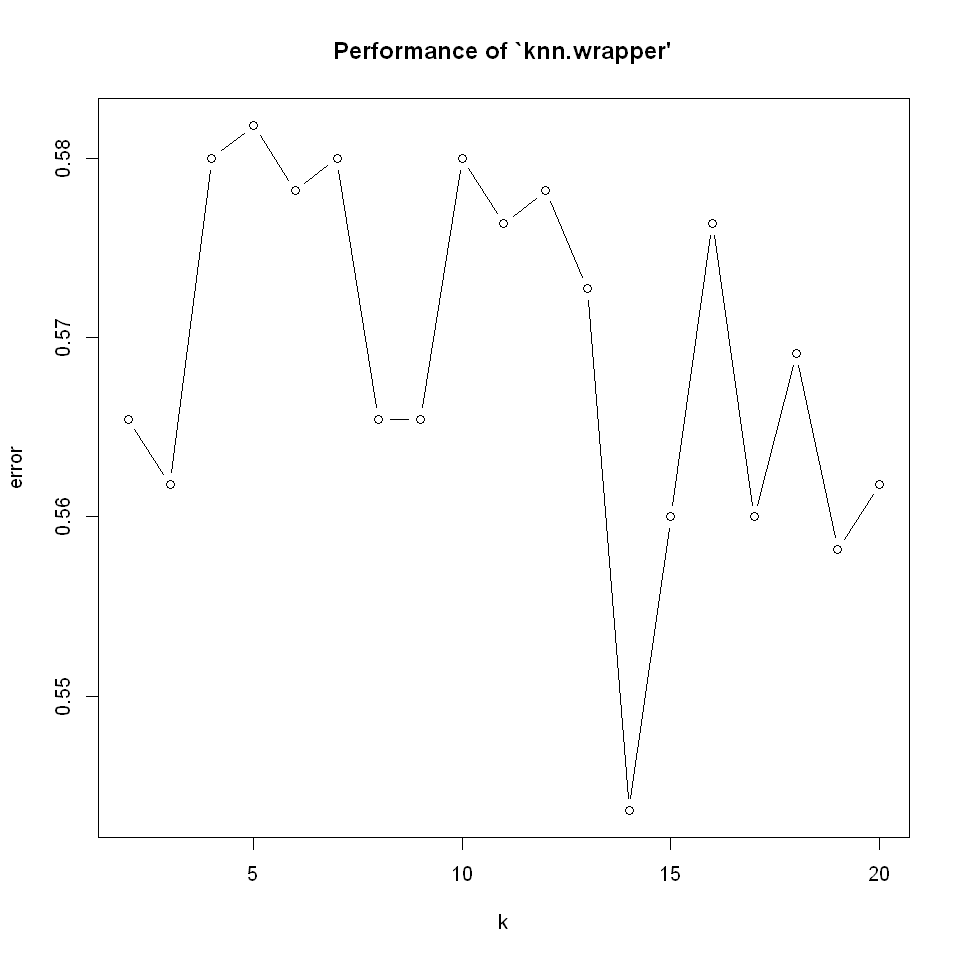

In [85]:
# k plus proches voisins: optimisation de k
plot(tune.knn(as.matrix(datappq[,c(-1,-17)]),as.factor(datappq[,17]),k=2:20))

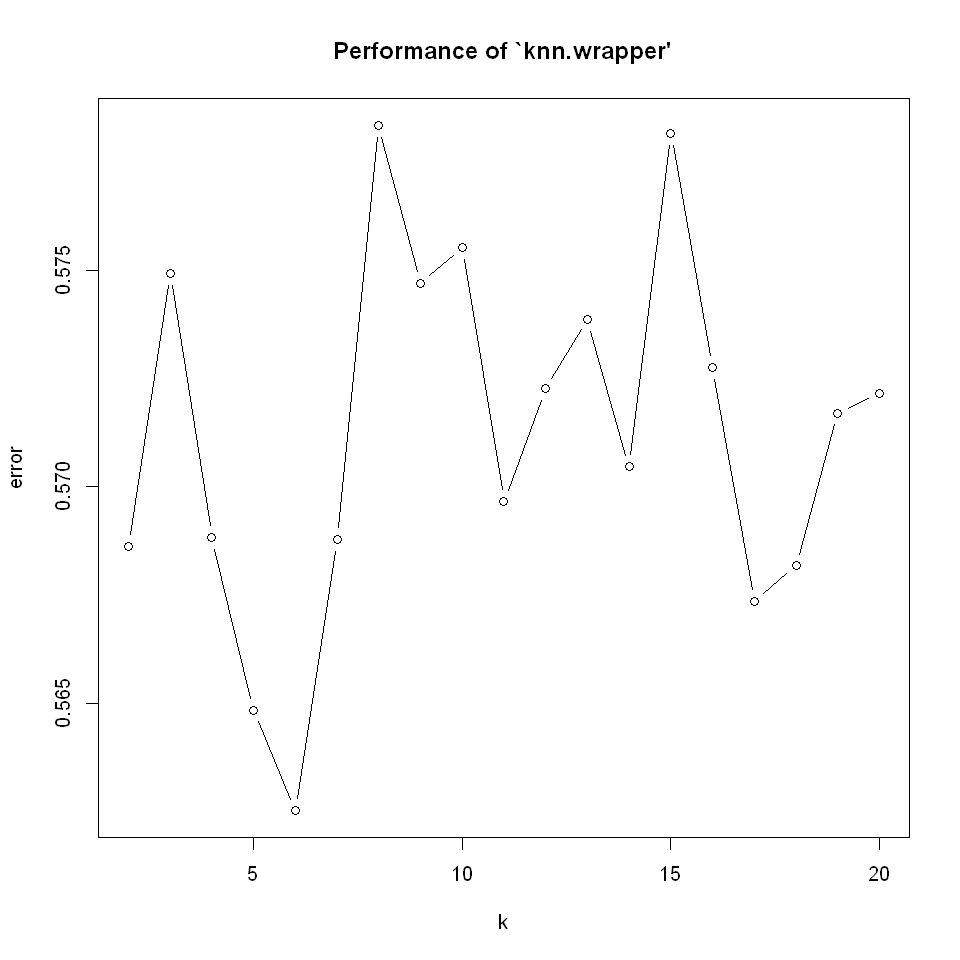

In [86]:
plot(tune.knn(as.matrix(datappq[,c(-1,-17)]),as.factor(datappq[,17]),k=2:20,tunecontrol=tune.control(sampling="boot")))

In [87]:
tune.control()

$random
[1] FALSE

$nrepeat
[1] 1

$repeat.aggregate
function (x, ...) 
UseMethod("mean")
<bytecode: 0x0000000011296fc0>
<environment: namespace:base>

$sampling
[1] "cross"

$sampling.aggregate
function (x, ...) 
UseMethod("mean")
<bytecode: 0x0000000011296fc0>
<environment: namespace:base>

$sampling.dispersion
function (x, na.rm = FALSE) 
sqrt(var(if (is.vector(x) || is.factor(x)) x else as.double(x), 
    na.rm = na.rm))
<bytecode: 0x000000000c3c0b20>
<environment: namespace:stats>

$cross
[1] 10

$fix
[1] 0.6666667

$nboot
[1] 10

$boot.size
[1] 0.9

$best.model
[1] TRUE

$performances
[1] TRUE

$error.fun
NULL

attr(,"class")
[1] "tune.control"

In [88]:
help(tune.knn)

In [89]:
help(kmeans)

**Q** Quelle procédure de validation croisée est exécutée par défaut par la fonction `tune`?

<FONT COLOR = "blue"> La méthode de validation croisée exécutée par défaut est **10-fold cross validation** : on découpe nos données en 10 folds et à chaque itérations 9 folds serviront d'échantillon d'entraînement et le dixième servira d'échantillon de test. On fait 10 itérations. </font>

Lancer plusieurs exécutions successives de cette "optimisation".

**Q** Pourquoi la valeur de $k$ optimale diffère à chaque exécution?

<FONT COLOR = "blue"> La valeur optimale de $k$ diffère à chaque exécution car les sets formés pour la cross validation ne sont jamais les mêmes. Malgré le fait que k varie à chaque exéxution, la prédiction obtenue ne varie pas beaucoup. On peut voir que la table de confusion change légèrement mais les résultats obtenus restent dans le même ordre de grandeur.
    
</font>

Comparer avec les erreurs précédentes estimées également par validation croisée.

**Q** Quelle analyse discriminante retenir ? Pourquoi?

<FONT COLOR = "blue"> On va retenir l'analyse discriminante linéaire, car elle fournit de meilleures prédictions. Comme le montre la table de confusion, l'analyse discriminante quadratique n'a pas fournit de bons résultats. </font>

In [90]:
help(tune)

### Prévision de l'échantillon test

#### Matices de confusion

Les commandes suivantes calculent la matrice de confusion pour la "meilleure" méthode d'analyse discriminante au sens de la validation croisée. Cette "meilleure" méthode peut être edifférente d'un participant à l'autre.

In [91]:
disc.lda=lda(datappq$rain_class~.,data=datappq[,-17])  
table(predict(disc.lda,datestq[,-17])$class,datestq[,"rain_class"])

           
            high_rain low_rain no_rain
  high_rain        17       10       4
  low_rain         17       38      14
  no_rain           2       15      21

<FONT COLOR = "blue"> **LDA : Analyse de la table de confusion :** Quand la variable observée est : 
- **high_rain** : La prédiction est bonne dans 47% des cas
- **low_rain** : La prédiction est bonne dans 60% des cas
- **no_rain** : La prédiction est bonne dans 53% des cas
    
On en déduit que le modèle obtenu par l'analyse discriminante linéaire obtient des résultats raisonnables pour la validation croisée pour la prédiction de **low_rain**. En revanche, les prédictions obtenues pour **high_rain** et **no_rain** ne sont pas bonnes, le modèle se trompe une fois sur deux. Dans les deux cas il prédit la variable **low_rain** presque aussi souvent que **high_rain** et **no_rain**.
</font> 

A titre indicatif, voici l'estimation de l'erreur sur l'échantillon test pour la méthode des $k$ plus proches voisins.

In [92]:
disc.knn=knn(as.matrix(datappq[,c(-1,-17)]),as.matrix(datestq[,c(-1,-17)]),datappq$rain_class,k=15)
table(disc.knn,datestq$rain_class)

           
disc.knn    high_rain low_rain no_rain
  high_rain        21       16       7
  low_rain         12       32      17
  no_rain           3       15      15

<FONT COLOR = "blue"> **LDQ : Analyse de la table de confusion :** Quand la variable observée est : 
- **high_rain** : La prédiction est bonne dans 52% des cas
- **low_rain** : La prédiction est bonne dans 52% des cas
- **no_rain** : La prédiction est bonne dans 43% des cas
    
On en déduit que le modèle obtenu par l'analyse discriminante quadratique obtient de mauvais résultats. Il se trompe une fois sur deux lorsqu'il prédit **high_rain** et **low_rain**, et même plus d'une fois sur deux pour la prédiction de no_rain. Tout comme le modèle de la **lda**, il prédit la variable low_rain presque aussi souvent que high_rain et no_rain quand ce sont ces classes là qui sont observées. 
    
En comparaison, le modèle **lda** est finalement légèrement meilleur dans ses prévisions que le modèle **ldq**, même s'il ne reste pas très bon.
</font> 

#### Courbes ROC
<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

**Q** Une méthode est-elle uniformément meilleure sur cet échantillon test ?

## [Arbre de décision binaire](http://wikistat.fr/pdf/st-m-app-cart.pdf)

<font color = "blue"> La librairie  `rpart` est celle la plus couramment utilisée pour la construction d'arbres de décision. Deux types d'arbres peuvent être estimés selon que la variable à modéliser est la quantité totale de précipitation le jour suivant **rain_mod** ou la catégorie de précipitations  **rain_class** (no_rain, low_rain, high_rain). </font>

<font color = "blue"> Différents paramètres  contrôlent l'exécution de l'algorithme: la pénalisation  minimale (`cp`) pour la construction de l'arbre maximal, le nombre minimal d'observation par noeud, le nombre de validations croisées (par défaut 10)... </font>

**NB.** Une séquence de valeurs de la pénalisation `cp` est associée à une séquence d'arbres emboîtés.


### Estimation et élagage de l'arbre de régression
**Q** Quel critère est optimisé lors de la création d'un noeud? de l'arbre?

<font color = "blue"> Nous débutons par la régression et donc $Y = $ **rain_mod**. Pour commencer, nous traçons un arbre complet (avec très peu d'élagage).

In [93]:
tree.reg=rpart(rain_mod~.,data=datappr,control=rpart.control(cp=0.001))
## La commande ci-dessous fournit un descriptif de l'arbre obtenu
# summary(tree.reg)  
## mais un graphe est  préférable

In [94]:
help(rpart.control)

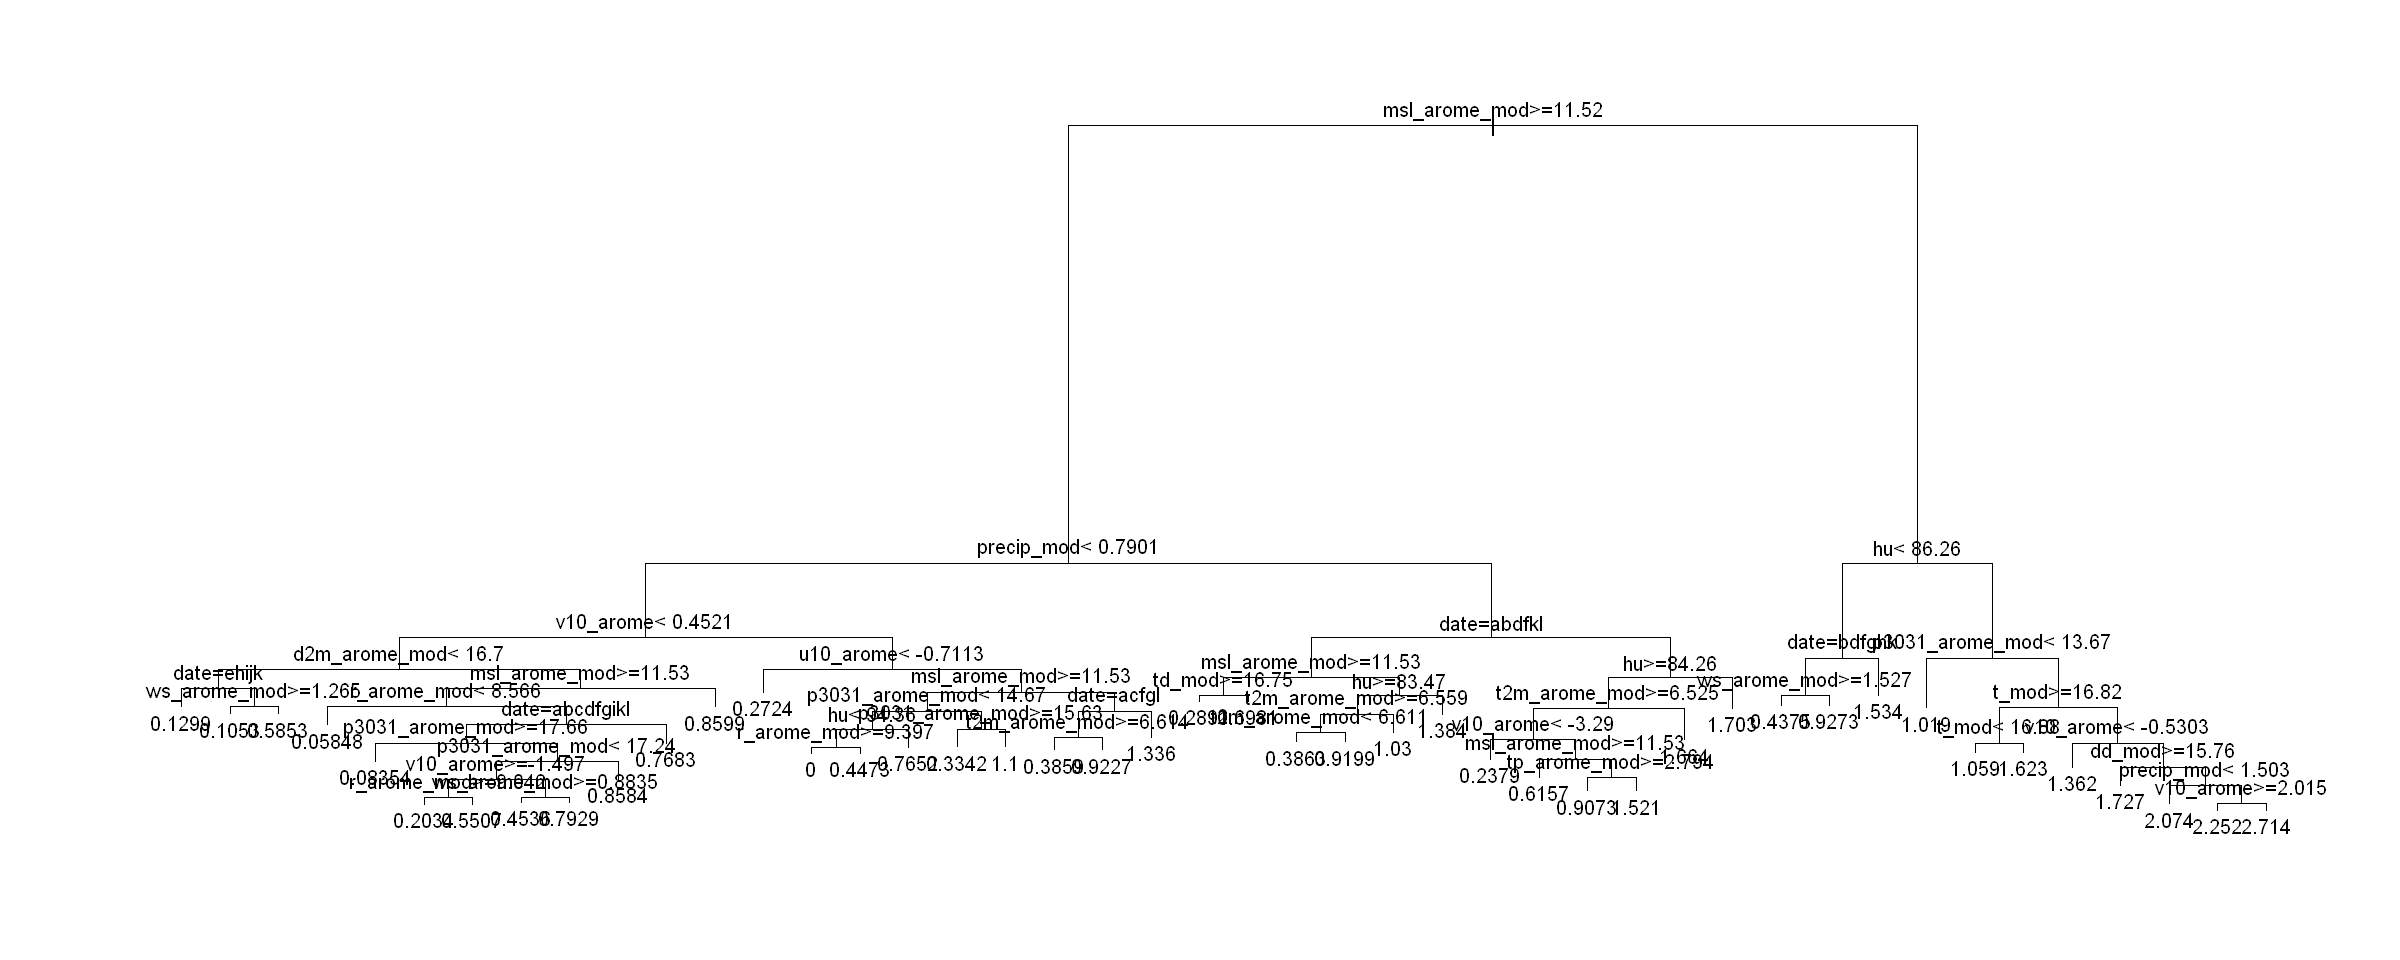

In [95]:
options(repr.plot.width = 20, repr.plot.height = 8)
plot(tree.reg)
text(tree.reg)

<font color = "blue"> A chaque feuille de l'arbre, nous cherchons à minimiser le critère suivant : $$ Crit(A)=D(A)+\gamma\times |A| ~~~~~~~~~(\gamma > 0)$$
où 
- <font color = "blue">$D(A) = \sum_{\kappa=1}^{|A|} D_{\kappa} $ est la somme des hétérogénéités des feuilles de chaque arbre 
- <font color = "blue">$ D_{\kappa}$ est l'hétérogénéité du noeud terminal ${\kappa}$
- <font color = "blue">$|A|$ est le nombre de feuilles de l'arbre
- <font color = "blue">$\gamma$ est la force du terme de pénalisation

<font color = "blue"> Plus $\gamma$ augmente et plus l'arbre obtenu est élagué. La séquence de Breeman fonctionne de la façon suivante : 
    
- <font color = "blue">  ETAPE 1 : Calcul de l'arbre maximal. Pour ce faire, à chaque noeud, on divise selon une variable et un seuil qui est choisi tel que le découpage maximise la décroissance en hétérogénéité. (on veut minimiser l'hétérogénéité à chaque noeud). 
    
    
- <font color = "blue"> ETAPE 2 : On élague l'arbre maximal :
    -  <font color = "blue">  Si $\gamma$ = 0, $A_{max}$ (l'arbre maximal) minimise $Crit(A)$ car $D(A_{max}) = 0$
    - <font color = "blue"> Si $\gamma$ augmente, la division de l'arbre pour laquelle l'amélioration en hétérogénéité est $\le \gamma$ est annulée. 
    - <font color = "blue"> Dans ce cas, on "coupe" les feuilles issues de cette division (élagage)
    - <font color = "blue"> Le noeud père devient un noeud terminal
    - <font color = "blue"> L'arbre maximal que nous avions à l'étape précédente noté $A_{\kappa}$ devient $A_{\kappa - 1}$, un sous arbre de l'arbre maximal.

    <font color = "blue"> Après itération de cet algorithme, nous avons une séquence d'abres imbriqués :  $A_{max} \supset A_{\kappa} \supset A_{\kappa-1} \supset ... \supset A_1$


<font color = "blue"> Dans la fonction ci-dessus, `cp` est le complexity parameter. Tout split dont la dércoissance en hétérogénéité n'est pas d'au moins la valeur `cp`, n'est pas réalisé (donc élagué). Donc si `cp` est très petit, on élague peu, plus `cp` est grand plus on élague l'arbre donc moins l'arbre est complexe. Ici cp=0.001, donc il y a très peu d'élagage. 

L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par  validation croisée *10-fold* pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité. La séquence de ces valeurs est implicitement celle fournit par `rpart`. 

In [96]:
xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"rain_mod"])^2
CVerr=apply(xerr,2,sum) # on applique la somme (FUN=sum) sur les colonnes (MARGIN=2) de la matrice xerr
CVerr  # Cross validation error en fonction de cp

0.607998052 0.100710832 0.041528774 0.030044328 0.022022785 0.019084654 
   324.4862    257.2831    261.2534    255.6511    263.5379    267.6815 
0.017910277 0.016563422 0.015630544 0.015461385 0.013605119 0.011598625 
   272.9400    271.4802    271.4324    272.5769    272.2309    274.4557 
0.010356356 0.009518048 0.009116423 0.008454692 0.007912578 0.007195509 
   285.8868    288.6327    290.5931    291.9414    290.5750    291.3011 
0.006654933 0.006323393 0.005851478 0.005280783 0.004770955 0.004495016 
   289.9818    293.8401    299.8223    294.6857    300.2259    299.4626 
0.004375695 0.004312680 0.004258869 0.003852130 0.003485672 0.003263333 
   298.5680    300.2644    300.5450    302.3058    300.6484    298.6978 
0.002938512 0.002758556 0.002612365 0.002323493 0.001462081 
   304.8769    307.1211    307.2144    307.7510    309.6664

<font color = "blue"> La liste ci-dessus présente pour chaque valeur du coefficient de complexité, l'erreur calculée par validation croisée 10 folds (CV) associée. Ex : 0.607998052 (=cp) associée à 324.098489614118 (erreur de CV) pour le premier élément de la liste affichée. 
    
<font color = "blue"> On rapelle que l'erreur de Cross-Validation (CV) permet d'estimer **l'erreur de généralisation** qui est un indicateur de la performance de notre algorithme. On souhaite donc avoir une valeur de CV la plus faible possible.

In [97]:
help(xpred.rpart)

<font color = "blue"> On cherche la valeur de `cp` correspondant à la plus petite erreur CV afin de l'utiliser pour construite un arbre amélioré.

In [98]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.03004433

In [99]:
#redéfinition de l'abre de régression avec la valeur de cp optimale
tree.reg=rpart(rain_mod~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

La librairie `partykit` propose une construction graphique de l'arbre:

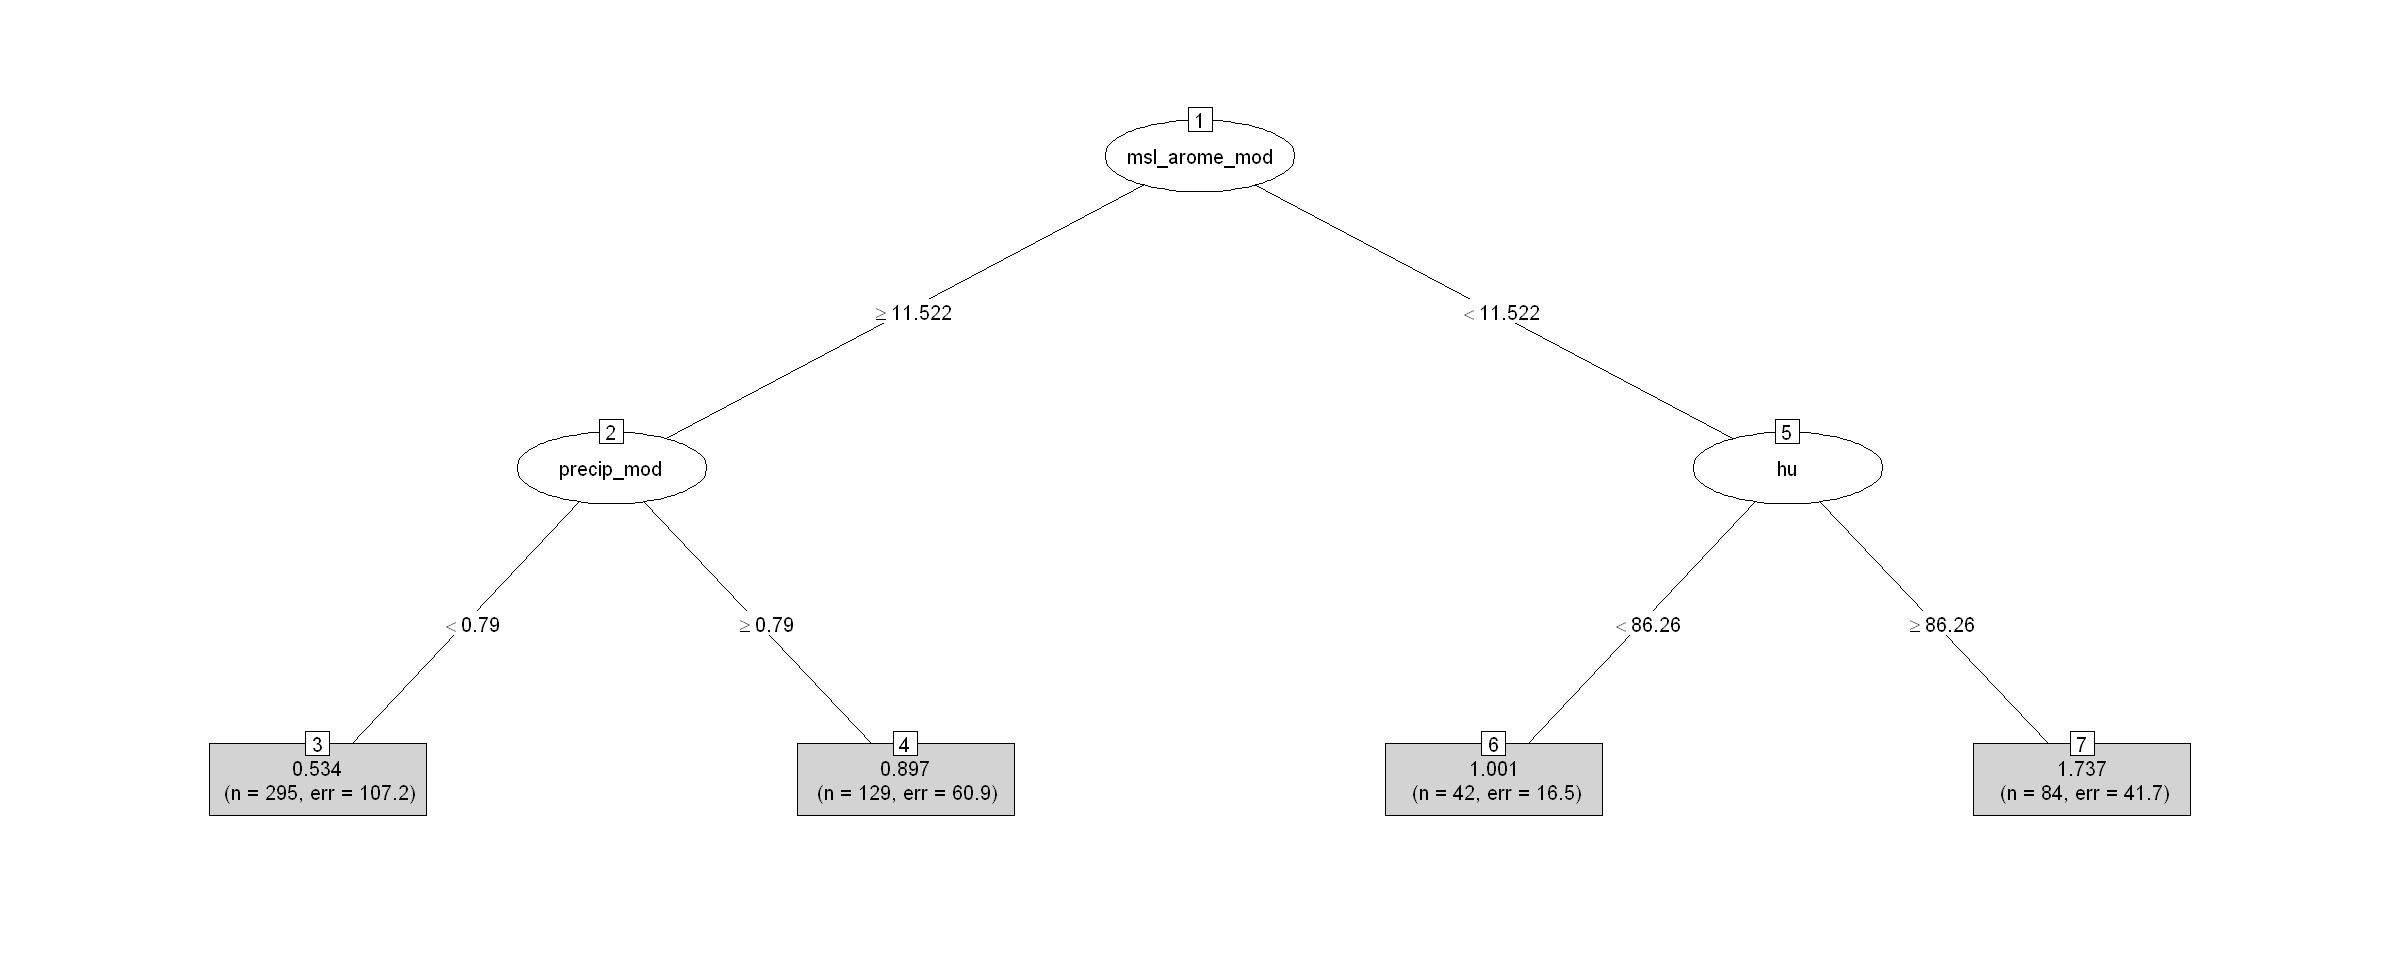

In [100]:
plot(as.party(tree.reg), type="simple")

<font color = "blue"> Nous pouvons remarquer que l'abre est bien plus élagué que précédemment. En effet, pour le premier arbre nous avions cp = 0.001 ce qui est plus petit cp = 0.030044322 pour l'abre ci-dessus. </font> 

La fenêtre est trop petite pour représenter les distributions (histogramme) de la variable cible (concentration en ozone) dans chaque feuille. 

**Q** Quelle est la variable qui contribue le plus à l'interprétation?


<font color = "blue"> Les variables permettant la décision sont : 
- <font color = "blue"> msl_arome_mod: pression atmosphérique du jour J+1 prédite par le modèle AROME
- <font color = "blue"> precip_mod : quantité totale des précipitation du jour J
- <font color = "blue"> hu : l'humidité du jour J. 

<font color = "blue"> La variable qui contribue le plus à l'interprétation est la pression atmosphérique du jour J+1 prédite par AROME msl_arome_mod.    
    
<font color = "blue"> Ceci semble logique car nous souhaitons prédire **rain_mod** qui est la quantité totale des précipitations au jour J+1. Le plus souvent, le temps est à la pluie lorsque la pression atmosphérique est basse ce qui peut expliquer que ce soit la première variable de l'arbre.

Graphe des résidus

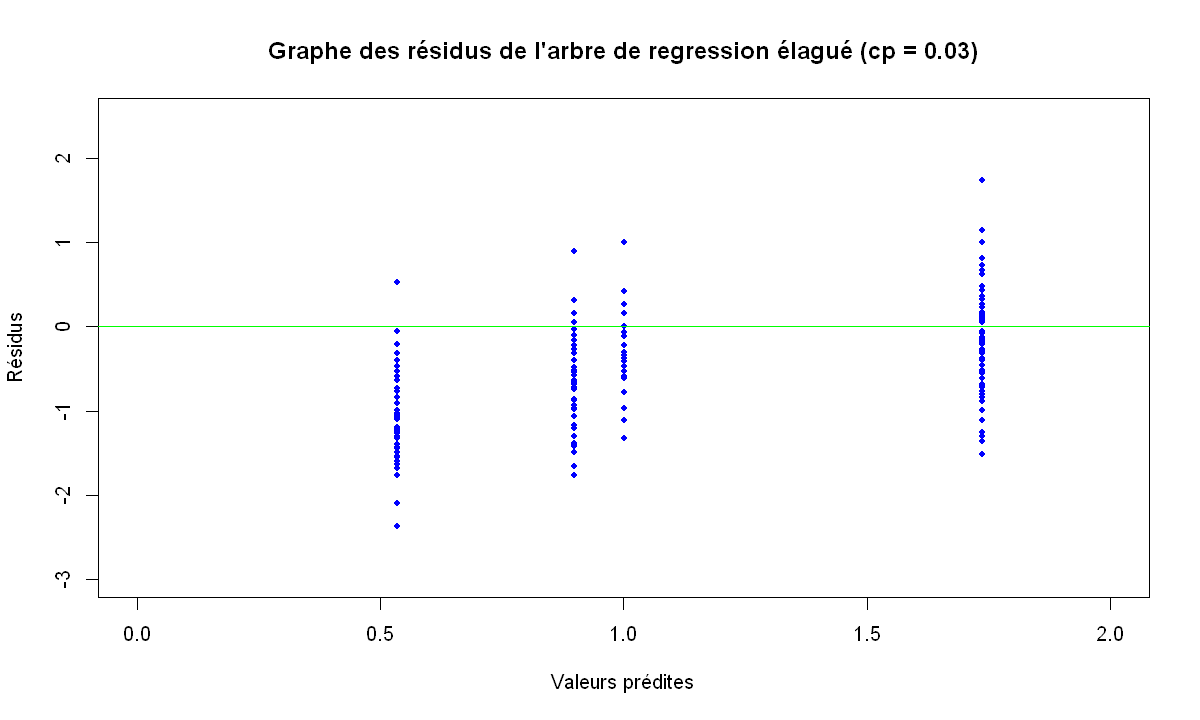

In [101]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"rain_mod"]

options(repr.plot.width = 10, repr.plot.height = 6)
plot.res(x = fit.tree,y = res.tree, titre = "Graphe des résidus de l'arbre de regression élagué (cp = 0.03)"
         ,lim_x = c(0, 2),lim_y = c(-3, 2.5))

**Q** A quoi est due la structure particulière de ce graphe?

<font color = "blue"> Notre arbre optimal présente 4 feuilles. La valeur prédite pour chaque feuille est constante et correspond à la moyenne des observations $Y_i$ tombées dans la feuille. Il y a autant de prédiction que de feuilles d'arbres. Pour prédire la valeur d'une nouvelle observation, il suffit de faire passer cette observation dans l'abre et de lui assigner la valeur de la feuille dans laquelle l'observation est tombée. 
Cette prédiction constante par morceaux explique la forme striée du graphe (en abscisse chaque valeur correspond à la valeur d'un noeud). 

### Estimation et élagage d'un arbre de discrimination

<font color = "blue"> Nous poursuivons par la classification (ou discrimination) et donc $Y = $ **rain_class**. Pour commencer, nous traçons un arbre complet (avec très peu d'élagage).

Dans le cas d'une discrimination, le critère par défaut est l'indice de concentration de Gini ; il est possible de préciser un autre critère (split="information") ainsi que des poids sur les observations, une matrice de coûts de mauvais classement ainsi que des probabilités *a priori* (?rpart pour plus de détails).

**Q** Quel autre critère d'hétérogénéité est utilisé?

<font color = "blue"> Un autre critère qui peut etre utilisé est la cross entropy. Cette valeur est minimale si seule une classe de Y est présente et maximale si toutes les classes sont présentes. On vise donc à minimiser ce critère dans le cas de la classification.

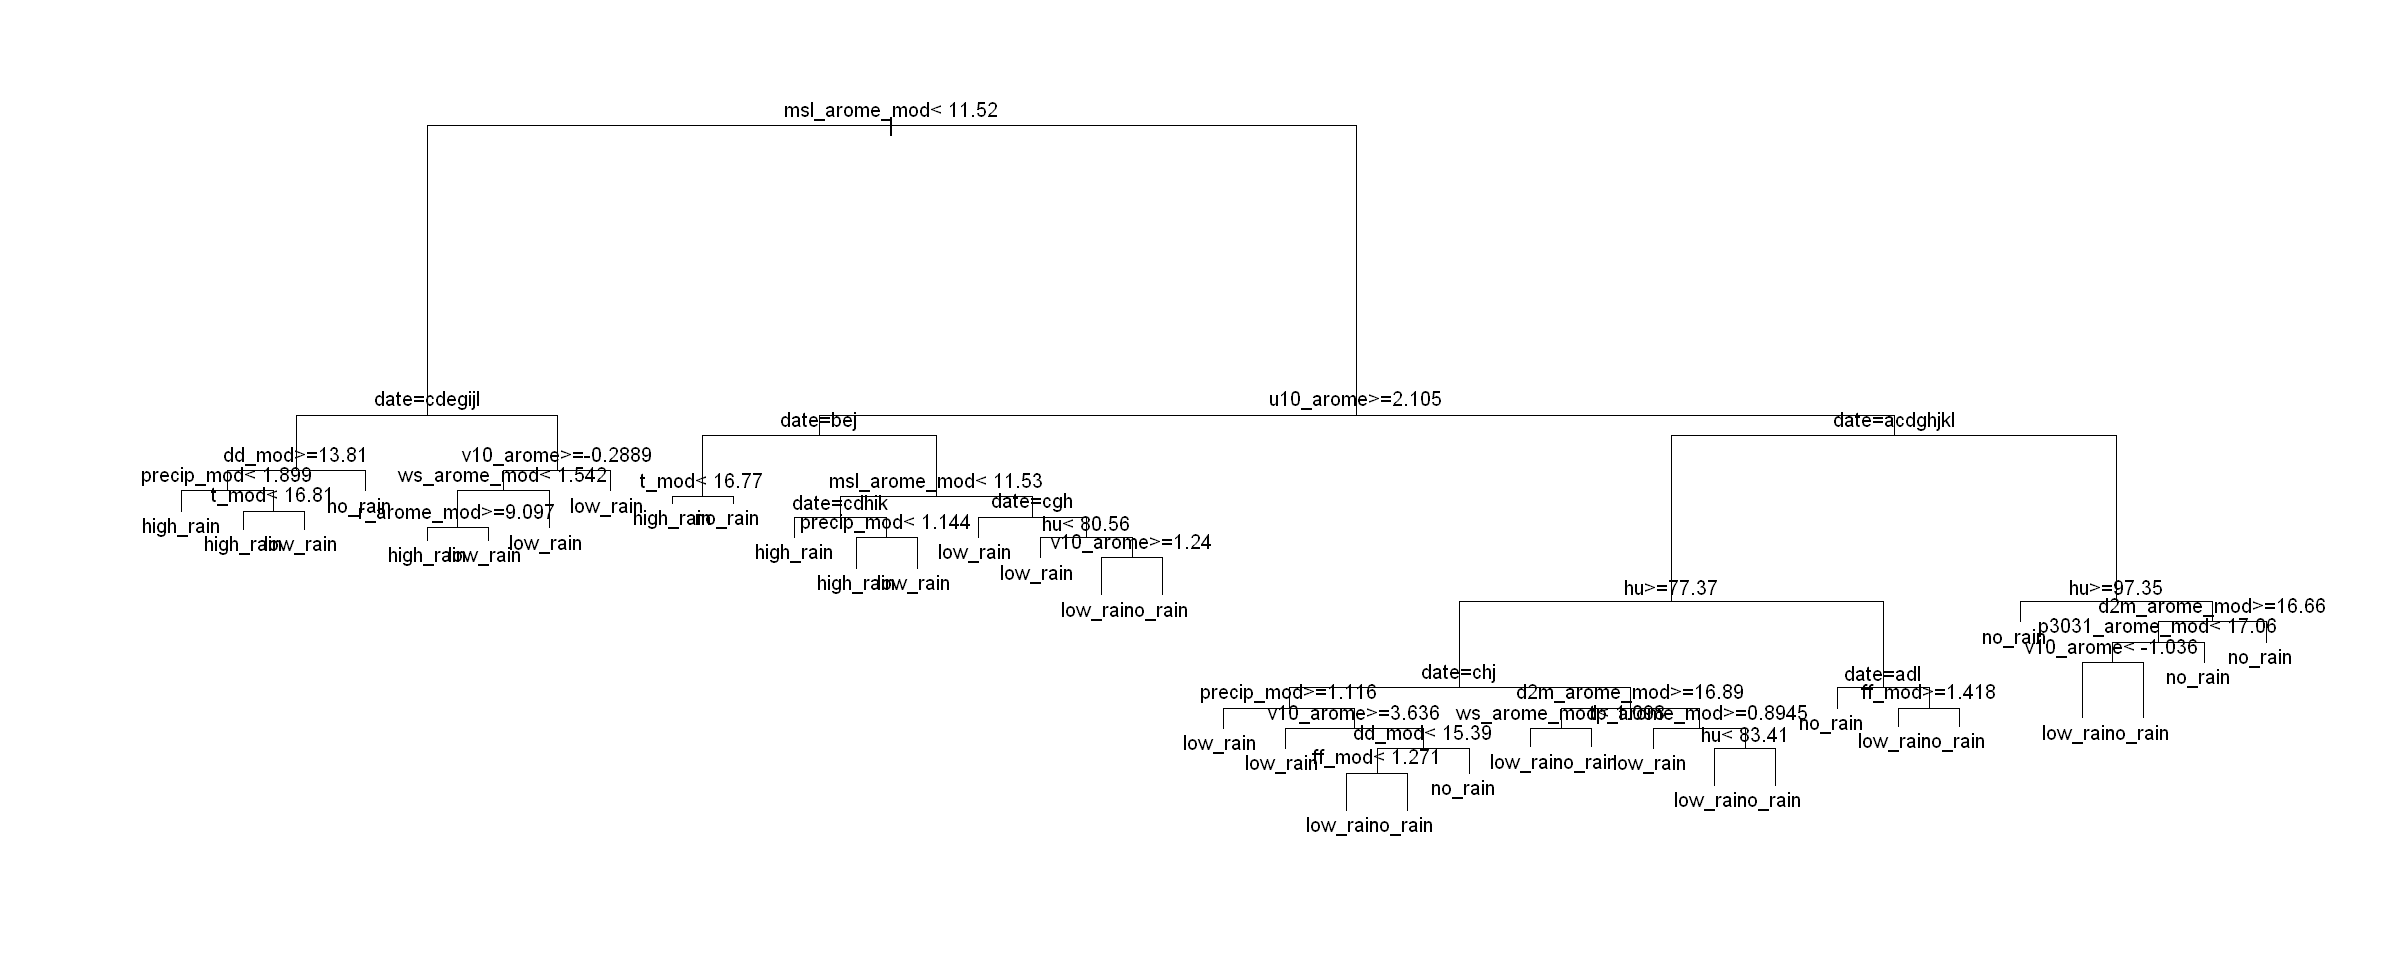

In [102]:
options(repr.plot.width = 20, repr.plot.height = 8)
tree.dis=rpart(rain_class~.,data=datappq,parms=list(split="information"),cp=0.001)
plot(tree.dis) 
text(tree.dis)  

La même procédure d'élagage par validation croisée est mise en place mais avec un expression différente de l'erreur de prévision: taux de mal classés plutôt qu'erreur quadratique.

In [103]:
xmat = xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
A = datappq$rain_class
levels(A) <- c(1,2,3) #renome les levels de A pour que ça corresponde aux levels de xmat
xerr = A != xmat
# Calcul  des estimations des taux d'erreur
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr

0.573208723 0.078471288 0.036196106 0.029553997 0.016187391 0.008436177 
  0.5836364   0.5109091   0.5472727   0.5381818   0.5163636   0.4836364 
0.007440009 0.006729741 0.005395797 0.003815405 0.001765011 
  0.4818182   0.4981818   0.5000000   0.5000000   0.4945455

In [104]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.007440009

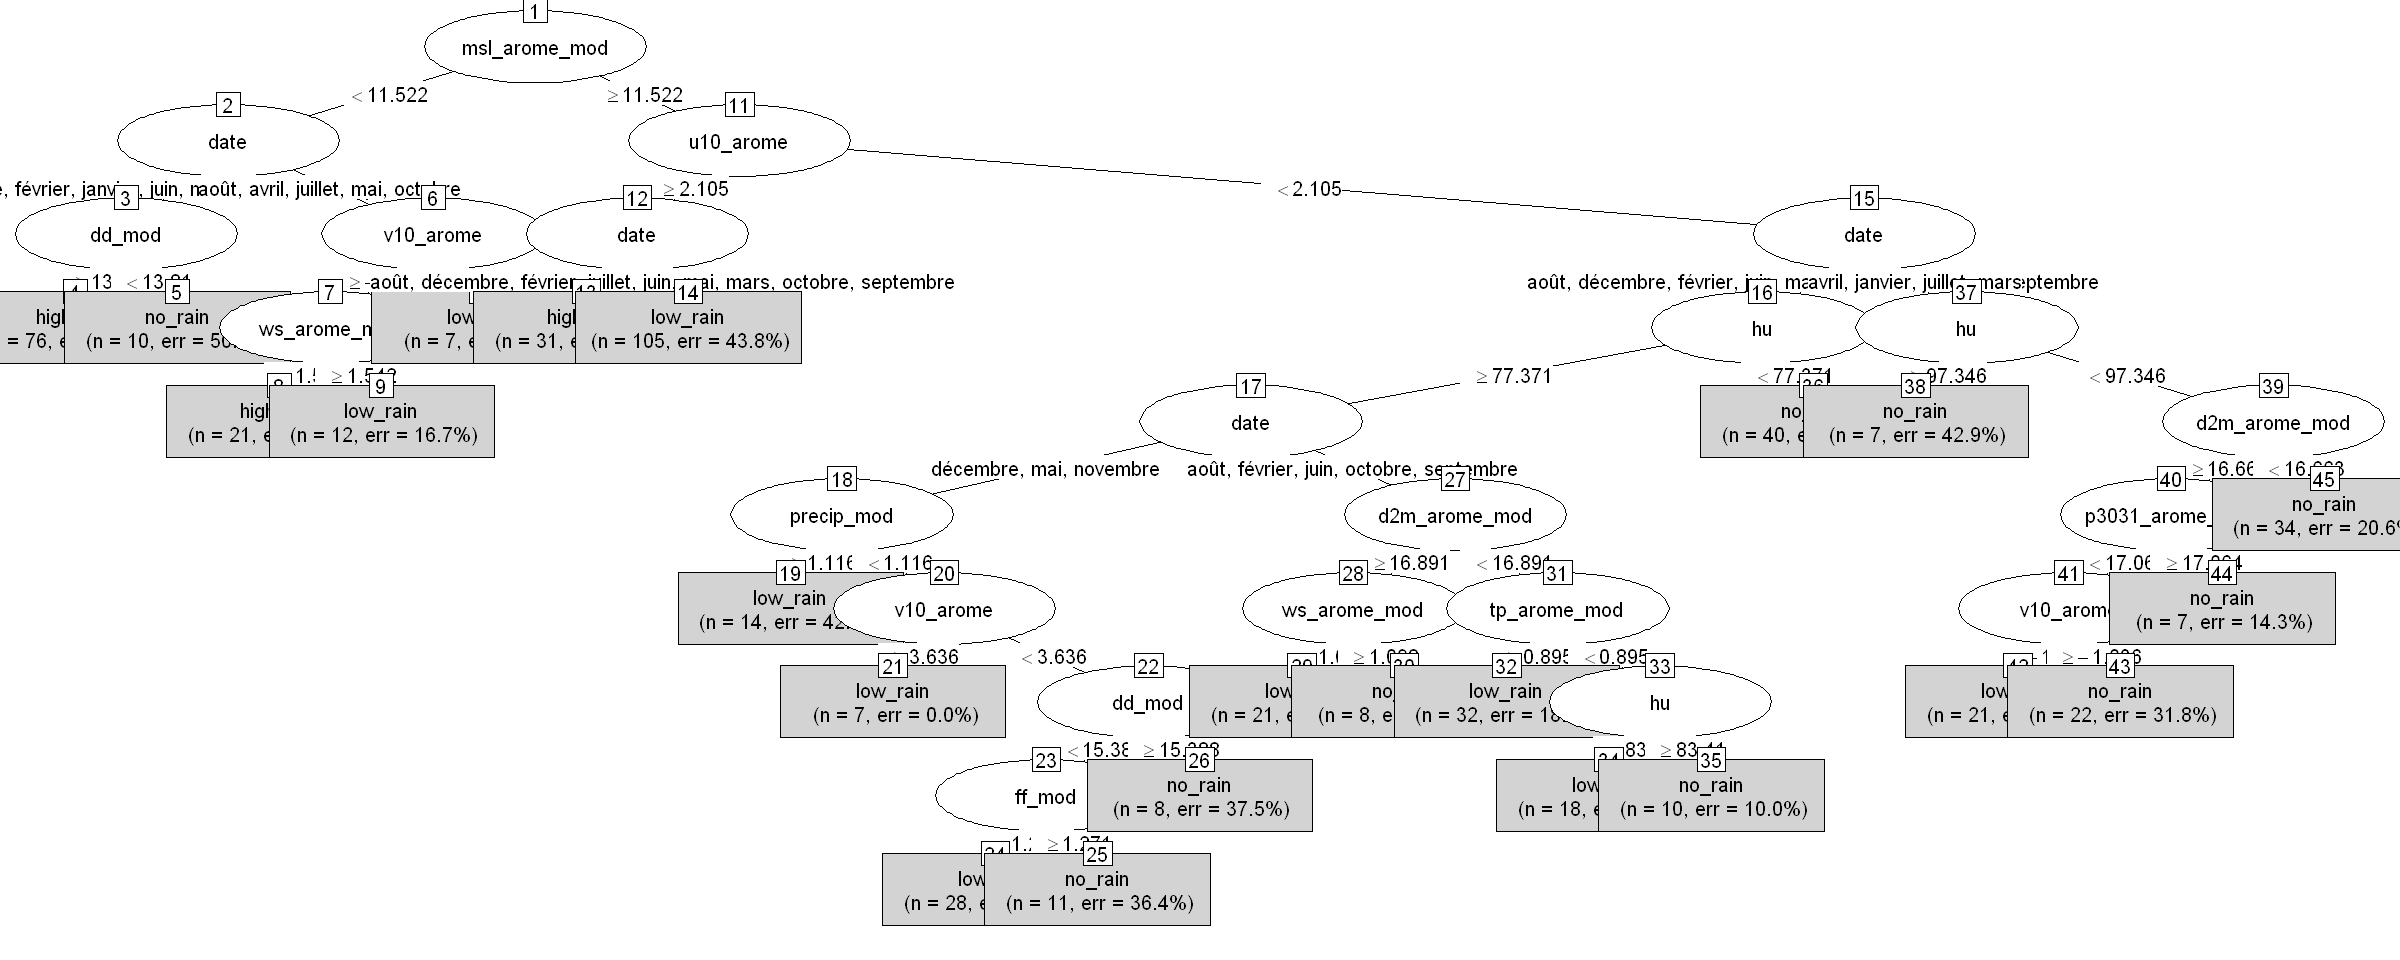

In [105]:
tree.dis=rpart(rain_class~.,data=datappq,parms=list(split="information"),
               cp=as.numeric(attributes(which.min(CVerr))$names))
plot(as.party(tree.dis), type="simple")

<font color = "blue"> De même que précedemment, nous pouvons remarquer que l'abre est bien plus élagué que précédemment. En effet, pour le premier arbre nous avions cp = 0.001 ce qui est plus petit cp = 0.016187391 pour l'abre ci-dessus. </font> 

<font color = "blue"> Les variables permettant la décision sont : 
- <font color = "blue"> msl_arome_mod: pression atmosphérique du jour J+1 prédite par le modèle AROME
- <font color = "blue"> hu : l'humidité du jour J. 
- <font color = "blue"> date : mois actuel
- <font color = "blue"> u10_arome : composantes du vent d'Ouest à Est prise à 10m de hauteur
   

<font color = "blue"> La variable qui contribue le plus à l'interprétation est la pression atmosphérique du jour J+1 prédite par AROME msl_arome_mod. Si cette variable semble logique car nous souhaitons prédire **rain_class**, les autres variables de décisions ne semblent pas pertinentes. Le mois de l'année peut aussi avori une effet sur les précipitations, et la direction du vent peut amener des nuages qui engendrent la pluie. </font> 
    
    
<font color = "red">  **Attention, quand on fait tourner plusieurs fois l'algo, on peut obtenir des résultats différents. Est-ce normal ?**

### Prévision de l'échantillon test

Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision. 

#### Erreur de régression

In [106]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur de généralisation en régression sur l'échantillon de test (arbre élagué)
paste("erreur de généralisation: ",sum((pred.treer-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'échantillon d'apprentissage 
paste("MSE : ",mean(res.tree^2)) #res = rédidus

[1] "erreur de généralisation:  0.501367623244928"

[1] "MSE :  0.411395806162474"

#### Erreur de classification (matrice de confusion)

In [107]:
# Même chose pour l'arbre de discrimination
pred.treeq = predict(tree.dis,newdata=datestq)
#extraction de la modalité associé à la plus forte proba :
pred.treeq = colnames(pred.treeq)[apply(pred.treeq, 1, which.max)] 
table(pred.treeq,datestq[,"rain_class"])

           
pred.treeq  high_rain low_rain no_rain
  high_rain        15       10       4
  low_rain         15       31      16
  no_rain           6       22      19

In [191]:
paste("Purity arbre classification: ", purity(table(pred.treeq,datestq[,"rain_class"])))
paste("F1_score arbre classification: ", F1_Score(pred.treeq,datestq[,"rain_class"]))

[1] "Purity arbre classification:  0.471014492753623"

[1] "F1_score arbre classification:  0.461538461538462"

**Q** Quelle stratégie semble meilleure à ce niveau?

<font color = "blue"> Dans les deux cas (regression et classification) nous n'obtenons pas de très bons résultats. Pour la regression, l'erreur de regression est elevée ($\approx 0.5$) et pour la classification nous avons : 
    
- <font color = "blue">  lorsque la valeur observée est **high_rain** le modèle se trompe une fois sur deux et prédit low_rain.
- <font color = "blue">  lorsque la valeur observée est **low_rain** le modèle se trombe aussi une fois sur deux et prédit high_rain et no_rain avec même probabilité.  
- <font color = "blue">  lorsque la valeur observée est **no_rain** le modèle se trombe encore une fois sur deux et prédit low_rain. 
 
<font color = "blue"> Ces résultats ne sont pas convaincants. Il s'agit d'un inconvénient de l'abre de classification/regression seul. En effet, ce modèle très explicable mais il donne souvent des résultats de mauvaises qualité. Par la suite, nous allons aggréger plusieurs arbres en forêt afin d'obtenir une meilleure prédiction bien que l'on perde en explicabilité de l'algorithme. 

<font color = "blue"> On transforme la regression en classification :

In [109]:
#transformation de la régression en classification
#--------------------------------------------------
pred.treer.C = table(RegToClassif(pred.treer), datestq[, "rain_class"])
print("Table de contingence de l'abre de décision binaire")
print("où on a transformé la régression en classification")
pred.treer.C 

paste("Purity arbre regression transformé en classification : ",purity(pred.treer.C))
paste("F1_score arbre regression transformé en classification : ", F1_Score(RegToClassif(pred.treer),datestq[,"rain_class"]))

[1] "Table de contingence de l'abre de décision binaire"
[1] "où on a transformé la régression en classification"


           
            high_rain low_rain no_rain
  high_rain         9        4       2
  low_rain         27       59      37

[1] "Purity arbre regression transformé en classification :  0.492753623188406"

[1] "F1_score arbre regression transformé en classification :  0.352941176470588"

#### Courbes ROC (pas faisable car on a 3 classes)

<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

Comparer les qualités  de prévision.

**Q** Une meilleure méthode se dégage-t-elle?

# <FONT COLOR="Red">Épisode 3</font>

## [Réseau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf)

### Introduction

Il s'agit d'estimer un modèle de type *perceptron* avec en entrée les variables qualitatives ou quantitatives et en sortie la variable à prévoir. Des fonctions R pour l'apprentissage d'un perceptron élémentaire ont été réalisées par différents auteurs et sont accessibles sur le réseau. La librairie `nnet` de (Ripley, 1999), est limitée au perceptron à une couche. Ce n'est pas de l'*apprentissage profond* ! mais suffisant dans bien des cas. Une librairie R associée au logiciel éponyme H2O propose des réseaux à plusieurs couches et "convolutionnels".

Comme pour les arbres, la variable à expliquer est soit quantitative soit qualitative ; la fonction de transfert du neurone de sortie d'un réseau doit être adaptée en conséquence. 

**Q** Quelle fonction de transfert pour le dernier neurone en régression ?

<font color = "blue"> En regression on utilise la fonction : $\Psi = $ *Identité* (pas de fonction d'activation appliquée) </font> (p.94 poly)

**Q** Quelle fonction de transfert pour le dernier neuronne en discrimination binaire?

<font color = "blue"> En classification binaire on utilise la fonction sigmoïde $\Psi (x) = \frac{1}{1+e^{-x}} $

**Q** Quid de la discrimination avec plusieurs classes?*
    
<font color = "blue"> En classification multiclasse on utilise la fonction softmax multidimensionnelle : $\Psi (x)_i = softmax (x)_i = \frac{exp(z_i)}{\sum_j{exp(z_j)}} $

**Q** Quel est le choix par défaut pour les neurones de la couche cachée?
    
<font color = "blue"> La fonction d'activation par défaut sur les couches cachées est la fonction sigmoid : $\phi (x) = \frac{1}{1+e^{-x}}$ (sur les réseaux de neurones historiques des années 80).
    
<font color = "blue"> Sur les CNN(convolution neural network) et le deeplearning sous python on utilise la fonction RELU.

Différentes stratégies sont proposées pour éviter le sur-apprentissage. La première conciste à optimiser le nombre de neurones sur la couche cachée. Très approximativement il est d'usage de considérer, qu'en moyenne, il faut une taille d'échantillon d'apprentissage 10 fois supérieure au nombre de poids c'est-à-dire au nombre de paramètres à estimer. On remarque qu'ici la taille de l'échantillon d'apprentissage (832) est modeste pour une application raisonnable du perceptron. Seuls des nombres restreints de neurones peuvent être considérés et sur une seule couche cachée. 

**Q** Quel est le paramètre `decay` de la fonction `nnet`?
    
<font color = "blue"> Le paramètre `decay` (valeur par défaut = 0) est le terme de pénalisation $\lambda$ dans la formule p95 du poly: $L_n(\theta) = \frac{1}{n}\sum_{i=1}^n {l(Y_i,f(X_i,\theta))} +\lambda \Omega(\theta)$. Il s'agit d'un paramètre de régularisation pour éviter l'over-fitting en pénalisant les modèles trop complexes.

**Q** Indiquer une autre façon déviter le sur-apprentissage.

<font color = "blue"> Aujourd'hui, on utilise plutôt le **drop-out** qui consiste à mettre à 0 certains poids du réseau pour une certaine probabilité p et indépendemment des autres (p101).

### Cas de la régression

<font color = "blue"> Nous commençons par appliquer un réseau de neurones à une couche cachée (avec la librairie `nnet`) dans le cas de la regression pour expliquer la variable **rain_mod**

In [110]:
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(rain_mod~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  141
initial  value 1317.343662 
iter  10 value 325.296921
iter  20 value 305.653570
iter  30 value 276.206011
iter  40 value 245.397390
iter  50 value 235.863682
iter  60 value 231.891723
iter  70 value 230.121863
iter  80 value 227.804103
iter  90 value 226.159221
iter 100 value 224.901717
iter 110 value 223.989359
iter 120 value 223.719038
iter 130 value 222.841403
iter 140 value 221.122254
iter 150 value 220.733605
iter 160 value 220.645582
iter 170 value 220.546229
iter 180 value 220.343246
iter 190 value 220.131264
iter 200 value 220.011564
iter 210 value 219.971706
iter 220 value 219.966060
iter 230 value 219.964676
final  value 219.964376 
converged


a 26-5-1 network with 141 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.08   -0.34    0.18    0.60    0.50   -0.26    0.26    0.06    0.41    0.95 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.04   -0.69    0.29    0.35    0.32   -0.14   -0.97    0.48    0.21    0.00 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 
   0.45   -0.33    0.31    0.40   -0.28   -0.09    0.77 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.00   -0.01    0.31   -0.34    0.24    0.02    0.17   -0.05    0.26    0.04 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.07    0.74    0.15   -0.43   -0.42    0.13    0.36    0.34    0.12    0.60 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 
  -0.50    0.29   -0.06   -0.32   -0.51    0.28   -0.10 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h

La commande donne la "trace" de l'exécution avec le comportement de la convergence mais le détail des poids de chaque entrée de chaque neurone ne constituent pas des résultats très explicites ! Contrôler le nombre de poids estimés.

L'optimisation des paramètres nécessite encore le passage par la validation croisée. Il n'y a pas de fonction dans la librairie `nnet` permettant de le faire mais la fonction ` tune.nnet` de la librairie `e1071` est adaptée à cette démarche.

<font color = "blue"> `tune.nnet` consiste à faire une grille de test. On fait varier :
- <font color = "blue"> size (c'est le nombre de neurones par couche) de 1 à 5
- <font color = "blue"> decay de 1 à 10 

<font color = "green"> **Attention** : cette cellule est longue à tourner : 

In [111]:
test_nnet <- tune.nnet(rain_mod~.,data=datappr,size=1:5,decay=1:10,maxit=200,linout=TRUE)

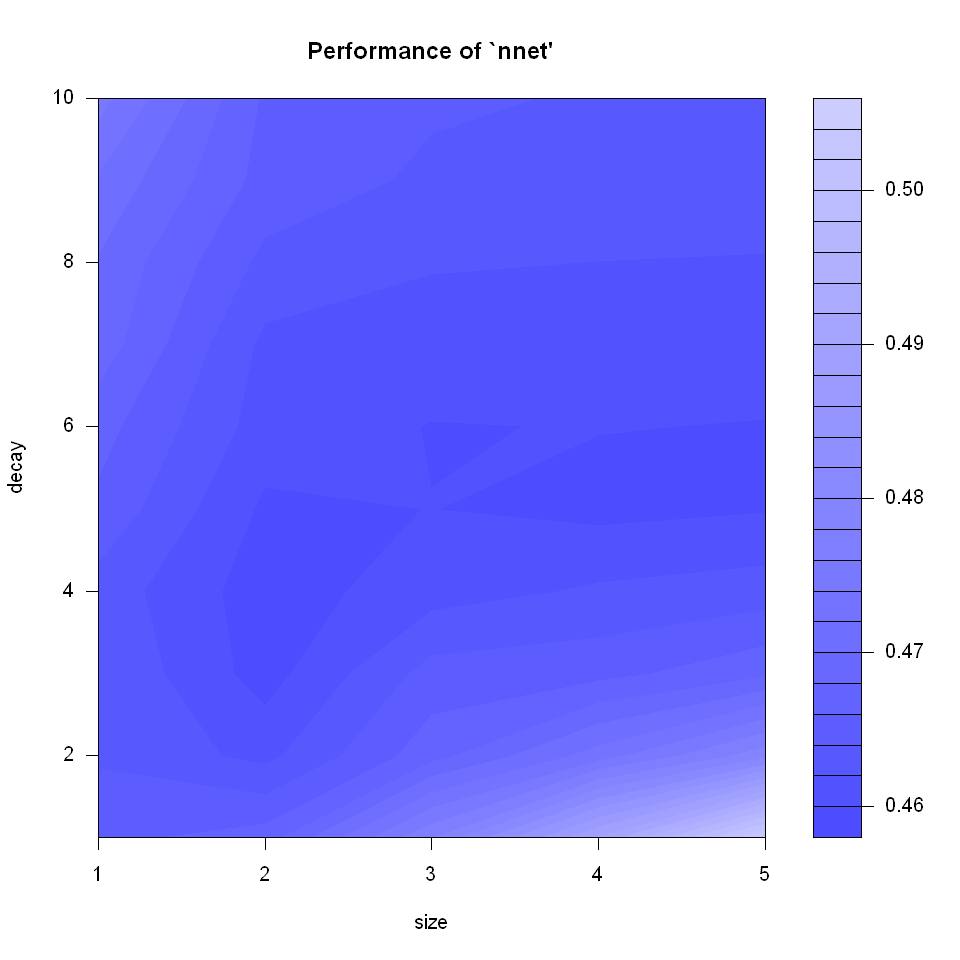

In [112]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot(test_nnet)

<font color = "blue"> Les graphes ci-dessus correspondent à l'erreur que l'on cherche à minimiser. Les paramètres minimisant l'erreur sont ceux pour lesquels le graphe est le plus foncé. \
On choisit alors `decay` = 4 et `size` = 3.

Faire éventuellement varier la grille des paramètres (zoom), noter la taille et le `decay` optimaux. Il faudrait aussi  faire varier le nombre total d'itérations. Cela risque de prendre un peu de temps ! Noter également que chaque exécution donne des résultats différents... il n'est donc pas très utile d'y passer beaucoup de temps !

Ré-estimer le modèle supposé optimal avant de tracer le graphe des résidus. 

In [113]:
nnet.reg=nnet(rain_mod~.,data=datappr,size=3,decay=4,linout=TRUE,maxit=200)

# weights:  85
initial  value 2350.914832 
iter  10 value 338.592945
iter  20 value 303.522067
iter  30 value 284.190589
iter  40 value 277.373890
iter  50 value 272.725578
iter  60 value 266.349141
iter  70 value 262.022941
iter  80 value 252.713124
iter  90 value 249.249412
iter 100 value 248.605814
iter 110 value 248.541513
iter 120 value 248.479520
iter 130 value 248.457394
iter 140 value 248.450430
final  value 248.449077 
converged


<font color = "blue"> Nous pouvons observer qu'avec les valeurs optimales pour `decay` et `size` le nombre de poids impléqués dans le réseau de neurones a diminué en passant de 141 à 85. Le nombre d'itérations pour atteindre la convergence est aussi plus court passant de 220 à 110.

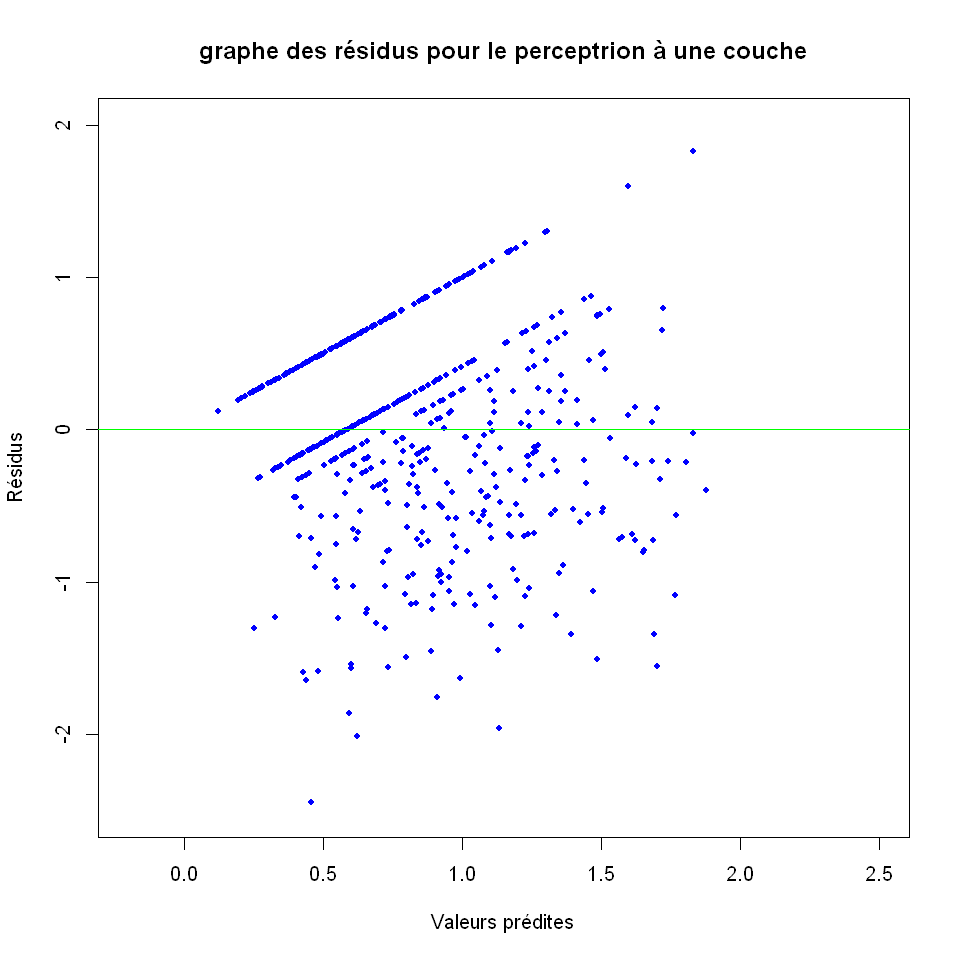

In [114]:
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"rain_mod"]
plot.res(fit.nnetr,res.nnetr,titre="graphe des résidus pour le perceptrion à une couche",
         lim_x = c(-0.2, 2.5), lim_y = c(-2.5, 2))

### Cas de la discrimination

<font color = "blue"> Nous poursuivons en appliquant un réseau de neurones à une couche cachée dans le cas de la classification pour expliquer la variable **rain_class**

In [115]:
# apprentissage
nnet.dis=nnet(rain_class~.,data=datappq,size=5,decay=0) 
summary(nnet.reg)

# weights:  153
initial  value 722.250830 
iter  10 value 563.620372
iter  20 value 536.677653
iter  30 value 525.542840
iter  40 value 522.854746
iter  50 value 521.840347
iter  60 value 520.912852
iter  70 value 519.243088
iter  80 value 517.940536
iter  90 value 517.906228
final  value 517.906089 
converged


a 26-3-1 network with 85 weights
options were - linear output units  decay=4
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.01   -0.10    0.14    0.02   -0.01   -0.15    0.08    0.18   -0.06    0.26 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.09   -0.04   -0.03   -0.05   -0.05    0.03    0.09    0.52   -0.04   -0.15 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 
  -0.11    0.27    0.01   -0.05   -0.11    0.11    0.05 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.02   -0.11    0.18    0.13    0.12   -0.21    0.10    0.04    0.15    0.41 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.12   -0.25    0.03   -0.08   -0.07   -0.04   -0.03    0.60   -0.04    0.27 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 
   0.26    0.12    0.02   -0.06   -0.03    0.12    0.14 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3

La validation croisée est toujours nécessaire afin de tenter d'optimiser les choix en présence : nombre de neurones, `decay` et éventuellement le nombre max d'itérations. 

L'initialisation de l'apprentissage d'un réseau de neurone comme celle de l'estimation de l'erreur par validation croisée sont aléatoires. Chaque exécution donne donc des résultats différents. À ce niveau, il serait intéressant de construire un plan d'expérience à deux facteurs (ici, les paramètres de taille et `decay`) de chacun trois niveaux. Plusieurs réalisations pour chaque combinaison des niveaux suivies d'un test classique d'anova permettraient de se faire une idée plus juste de l'influence de ces facteurs sur l'erreur. 

Noter la taille et le `decay` optimaux et ré-estimer le modèle pour ces valeurs.

<font color = "green"> **Attention** : cette cellule est longue à tourner : 

In [116]:
test_nnet2 <- tune.nnet(rain_class~.,data=datappq,size=2:5,decay=1:8,maxit=200,linout=TRUE)

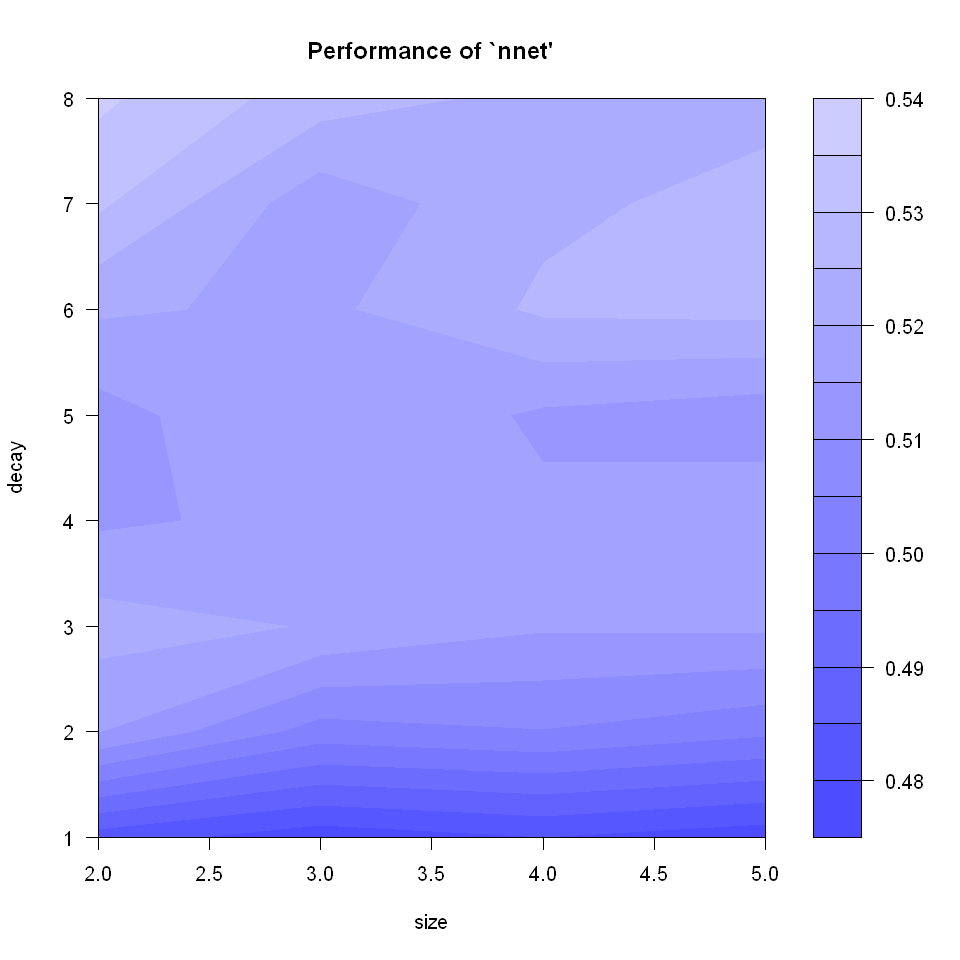

In [117]:
plot(test_nnet2)

<font color = "blue"> Les graphes ci-dessus correspondent à l'erreur que l'on cherche à minimiser. Les paramètres minimisant l'erreur sont ceux pour lesquels le graphe est le plus foncé. \
On choisit alors `decay` = 5 et `size` = 3.

In [118]:
nnet.dis=nnet(rain_class~.,data=datappq,size=5,decay=5) 

# weights:  153
initial  value 807.111546 
iter  10 value 591.289684
iter  20 value 572.213702
iter  30 value 566.142061
iter  40 value 562.081777
iter  50 value 560.449009
iter  60 value 557.647429
iter  70 value 555.287248
iter  80 value 554.346826
iter  90 value 554.161682
iter 100 value 554.125097
final  value 554.125097 
stopped after 100 iterations


### Prévisions de l'échantillon test

Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision. 


#### Erreur de régression

In [119]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision = erreur de généralisation sur l'échantillon de test
paste("erreur de généralisation: ",sum((pred.nnetr-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'échantillon d'apprentissage 
paste("MSE : ",mean(res.nnetr^2)) #res = rédidus

[1] "erreur de généralisation:  0.426652205472196"

[1] "MSE :  0.426172952104282"

<font color = "blue"> On observe une erreur de regression plus faible pour le réseau de neurones que pour l'abre de décision binaire, mais à peu près identique à l'erreur de la forêt aléatoire.

#### Erreur de classification (matrice de confusion)

In [120]:
# Calcul des prévisions
pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Même chose pour la discrimination
RealData = data.matrix(datestq[,"rain_class"]) #tranforme le dataframe en matrice
prediction = argmax(pred.nnetq,rows = TRUE) #calcule l'argmax pour chaque ligne
#transforme le n° des lignes obtenues avec argmax en un caratère "high_rain", "low_rain" ou "no_rain"
prediction[which(prediction == 1, arr.ind=TRUE)] = "high_rain" 
prediction[which(prediction == 2, arr.ind=TRUE)] = "low_rain"
prediction[which(prediction == 3, arr.ind=TRUE)] = "no_rain"
table(prediction,RealData)

           RealData
prediction  high_rain low_rain no_rain
  high_rain        19       12       6
  low_rain         16       37      19
  no_rain           1       14      14

In [121]:
paste("Purity réseau de neurones classification",purity(table(prediction,RealData)))
paste("F1_score réseau de neurones classification",F1_Score(prediction,datestq[,"rain_class"]))

[1] "Purity réseau de neurones classification 0.507246376811594"

[1] "F1_score réseau de neurones classification 0.520547945205479"

<font color = "blue"> On observe :     
- <font color = "blue">  lorsque la valeur observée est **high_rain** le modèle se trompe une fois sur deux et prédit low_rain.
- <font color = "blue">  lorsque la valeur observée est **low_rain** le modèle se trombe aussi une fois sur deux et prédit high_rain et no_rain avec même probabilité.  
- <font color = "blue">  lorsque la valeur observée est **no_rain** le modèle se trombe encore une fois sur deux et prédit low_rain. 

<font color = "blue"> Nous obtenons alors exactement les mêmes résultats que pour l'arbre de classification ce qui n'est pas très concluant.

<font color = "blue"> Nous transformons la regression en classification :

In [122]:
pred.nnetr.C = table(RegToClassif(pred.nnetr), datestq[, "rain_class"])
print("Table de contingence de l'abre du réseau de neurones")
print("où on a transformé la régression en classification")
pred.nnetr.C 

paste("Purity réseau de neurones où on transformé la régression en classification",purity(pred.nnetr.C))
paste("F1_score réseau de neurones où on transformé la régression en classification",F1_Score(RegToClassif(pred.nnetr),datestq[, "rain_class"]))

[1] "Table de contingence de l'abre du réseau de neurones"
[1] "où on a transformé la régression en classification"


           
            high_rain low_rain no_rain
  high_rain        13        6       4
  low_rain         23       57      35

[1] "Purity réseau de neurones où on transformé la régression en classification 0.507246376811594"

[1] "F1_score réseau de neurones où on transformé la régression en classification 0.440677966101695"

#### Courbes ROC

<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

**Q** Une méthode semble-t-elle significativement meilleure?

## [Agrégation de modèles](http://wikistat.fr/pdf/st-m-app-agreg.pdf)

### Introduction

Les sections précédentes ont permis d'expérimenter les constructions d'un modèle de prévision assorties du problème récurrent lié à l'optimisation de la complexité d'un modèle. Cette section aborde d'autres stratégies dont l'objectif est de s'affranchir de ce problème de choix, par des méthodes se montrant pas ou très peu sensibles au sur-apprentissage ; c'est le cas des algorithmes d'agrégation de modèles.

Cette section propose de mettre en évidence la plus ou moins grande influence des paramètres de ces méthodes. 
* *Random forest*: nombre d'arbres et `mtry` et intérêt des critères de Breiman permettant de mesurer l'influence des variables au sein d'une famille agrégée de modèles. 
* Le *bagging*, cas particulier de forêt aléatoire, n'est pas traité;
* *Boosting*: profondeur d'arbre, nombre d'itérations ou d'arbres et coefficient de *shrinkage*.

**Q** Quel est le paramètre `mtry` de la fonction `randomForest`?

<font color = "blue"> `mtry` : nombre de variables qui sont choisies aléatoirement comme candidat possible à chaque split. Les valeurs par défaut de m sont :
- <font color = "blue"> $ m = \frac{p}{3}$ dans le cas de la regression
- <font color = "blue">$ m = \sqrt{p} $ dans le cas de la classification

**Q** En quoi le bagging est un cas particulier des forêts aléatoires?
    
    
<font color = "blue"> Le **bagging** ajoute une composante aléatoire à l'abre de décision. L'objectif est d'augmenter l'indépendance de la forêt d'abres en choisissant aléatoirement $m$ variables parmi les $p$ disponibles pour effecteur un découpage à un noeud. On choisit alors le meilleur découpage (on découpe selon une variable) et le meilleur seuil parmi ces $m$ variables. Les arbres construits sont donc moins corrélés entre eux car le fait de sélectionner aléatoirement $m$ variables parmi $p$ permet de sélectionner des variables qui n'auraient jamais été sélectionnés autrement car les variables plus explicatives (qui permettent de faire diminuer le plus l'hétérogénéité) auraient été préférées. C'est un cas particulier par rapport à l'algorithme de random forest, car dans ramdom forest, on ne ferait pas de sélection aléatoire de $m$ variables parmi $p$ à chaque noeud. 

### Forêts aléatoires

Le programme est disponible dans la librairie *randomForest*. Il est écrit en fortran, donc en principe efficace en terme de rapidité d'exécution, et facile à utiliser grâce à une interface avec R. La comparaison avec Python montre qu'il n'est finalement pas très efficace sans doute à cause de l'interface avec R. Les paramètres et sorties sont explicités dans l'aide en ligne.

En R et pour des gros fichiers, privilégier la librairie `ranger` à la place de `ranfomForest`. 

In [123]:
help(randomForest)

<font color = "blue">  Les paramètres de la librairie `randomForest` sont : 
- <font color = "blue">   `ntree` : nombre d'abres crées. Cette valeur ne doit pas être trop faible, afin de s'assurer que chaque ligne d'entrée dans notre matrice individus/variables est prédite au moins quelques fois. 
- <font color = "blue">  `importance` : importance des prédicteurs    

<font color = "blue">  On renormalise les données : 

In [124]:
#datappr_s = scale(x = datappr[-1],center = TRUE, scale = TRUE) #on enlève la date qui est qualitative
#datappr_s = datappr -> ajouter la date 
#datestr_s = scale(x = datestr[-1],center = TRUE, scale = TRUE)

#### Régression

<font color = "blue">  Nous débutons par le cas de la regression où $Y$ = **rain_mod** est une variable réelle. Nous espérons obtenir de meilleurs résultats en agrégeant les arbres en forêt que lorsque nous avions un seuil arbre de décision. 

In [125]:
rf.reg=randomForest(rain_mod~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"rain_mod"],
   ntree=500,do.trace=50,importance=TRUE) 

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |   0.4214    71.73 |   0.4455    78.93 |
 100 |   0.4148    70.62 |   0.4461    79.02 |
 150 |    0.412    70.14 |   0.4416    78.24 |
 200 |   0.4118    70.10 |   0.4378    77.56 |
 250 |   0.4091    69.64 |   0.4356    77.18 |
 300 |   0.4082    69.49 |   0.4346    76.99 |
 350 |    0.408    69.45 |   0.4343    76.95 |
 400 |   0.4068    69.25 |   0.4342    76.93 |
 450 |   0.4077    69.40 |   0.4342    76.92 |
 500 |   0.4077    69.40 |   0.4362    77.27 |


<font color = "blue"> L'algorithme construit ci-dessus procède de la façon suivante : 
- <font color = "blue"> Il construit `ntree=500` arbres CART (où pour chaque arbre, on autorise de choisir $m$ variables explicatives parmi $p$ $(m<p)$ pour découper à chaque noeud). Cela permet de choisir des variables de séparation au niveau des noeuds qui n'auraient pas été choisies car de meilleures variables auraient été préférées. 
- <font color = "blue"> Ensuite il effectue une étape d'agrégation. Pour trouver la prédiction $\hat{Y_0}$ d'une nouvelle observation $x_0$, on fait passer cette observation dans chaque arbre de la forêt et on regarde dans quelle branche elle tombe. En classification, on prédit pour $x_0$ la classe majoritaire (classe obtenue le plus grand nombre de fois pour $\hat{Y_0}$ parmi les 500 arbres) et en regression, on prédit pour $x_0$ la moyenne de tous les $\hat{Y_0}$ prédits par les 500 arbres.
- <font color = "blue"> Le paramètre `do.trace=50` permet d'afficher le résultat de l'algorithme tous les 50 arbres. 

    
<font color = "blue"> Par la suite, au début du TP nous avions isolé un échantillon de test **datestr** représenté sur la colonne la plus à droite de la sortie ci-dessus (`Test set`). Cet échantillon est totalement indépendant de l'échantillon d'entraînement **datappr** et permet d'évaluer le modèle. Pour cela, on effectue une prédiction avec l'échantillon de test et on calcule le MSE associé. Cependant, en réalité nous n'avons généralement pas assez de données pour pouvoir isoler cet échantillon de test sans impacter négativement les résultats que l'on obtient avec l'échantillon d'apprentissage. On utilise alors les données issues des échantillons **Out-Of-Bag** pour évaluer l'algorithme.    
    
    
<font color = "blue"> *Rappel* sur l'échantillon **Out-Of-Bag**: afin de construire les arbres constituant la forêt, nous seléctionnons plusieurs échantillons **bootstrap** dans nos données. Un éhantillon bootstrap est constitué en tirant aléatoirement avec remise $n$ données parmi nos $n$ données d'apprentissage (plusieurs données peuvent donc être tirées plusieurs fois). Le boostrapping permet d'améliorer l'indépendance entre les arbres de la forêt car à chaque fois, l'abre construit sur un échantillon bootstrap n'utilise pas tout à fait les mêmes données qu'un autre arbre constuit sur un autre échantillon bootstrap. Statistiquement, 1/3 des données ne sont pas tirées lors de la formation d'un échantillon boostrap. Ces données non tirées forment l'échantillon **Out-Of-Bag** et peuvent servir comme échantillon de test (au lieu de **datestr** ici).
    
    
<font color = "blue"> Ainsi, la deuxième colonne de la sortie ci-dessus (`Out-of-bag`) calcule l'erreur la MSE sur le données **Out-Of-Bag**. Nous pouvons comparer la MSE obtenue sur l'échantillon de test et celle obtenue avec les données Out-Of-Bag. On constate que les deux résultats sont différents. Ceci est attendu car dans le cas des données Out-Of-Bag, les échantillons ne sont pas totalement indépendants entre eux et donc la réduction de variance obtenue sera plus faible que dans le cas d'un échantillon de test totalement indépendant des données d'apprentissage. Ainsi, on observe que la MSE est sous-estimée pour les échantillons Out-Of-Bag.

In [126]:
attributes(rf.reg)
rf.reg$mtry

$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

**Q** Quelles est la valeur par défaut de `mtry`?

<font color = "blue"> Nous voyons que la valeur par défaut est `mtry = 5`. A chaque noeud, on tire donc aléatroiement $m$ = 5 variables parmi $p$ = 16 (ncol(datestr) - 1 en enlevant la variable à expliquer rain_mod). </font> 

Relancer en faisant varier les paramètres `mtry` et `ntree` pour expérimenter leur peu d'influence sur les erreurs.

In [127]:
Mtries = seq (4,12,1) #rappel : il y a p = 16 variables en tout
for (m in Mtries) {
    print(paste("test de random forest avec mtry = ",m))
    rf.reg2=randomForest(rain_mod~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"rain_mod"],
       ntree=500,do.trace=500,mtry = m, importance=TRUE) 
    }

[1] "test de random forest avec mtry =  4"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4137    70.43 |   0.4331    76.73 |
[1] "test de random forest avec mtry =  5"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4124    70.21 |   0.4388    77.74 |
[1] "test de random forest avec mtry =  6"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4131    70.32 |   0.4438    78.63 |
[1] "test de random forest avec mtry =  7"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4167    70.94 |   0.4326    76.64 |
[1] "test de random forest avec mtry =  8"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4147    70.60 |   0.4385    77.69 |
[1] "test de random forest avec mtry =  9"
     |      Out-of-bag   |       Test

<font color = "blue"> Quand `mtry` augmente :
- <font color = "blue"> MSE et Var(y) du Out-of-Bag diminuent 
- <font color = "blue"> MSE et Var(y) du test set augmentent

<font color = "blue"> Quand `mtry` diminue : sur les deux set :
- <font color = "blue"> Le MSE augmente 
- <font color = "blue"> La variance diminue 
    
    
<font color = "blue"> En faisant varier la valeur de `mtry` on voit que 9 variables minimisent la MSE sur l'échantillon de test pour `ntree` = 500. 
    
    
<font color = "blue"> Nous allons faire varier le nombre d'arbres `ntree` avec `mtry` = 5 fixé

In [128]:
print("test de random forest en faisant varier ntree")
rf.reg2=randomForest(rain_mod~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"rain_mod"],
       ntree=800,do.trace=50,mtry = 5, importance=TRUE)

[1] "test de random forest en faisant varier ntree"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |   0.4417    75.19 |   0.4256    75.40 |
 100 |   0.4275    72.77 |   0.4246    75.22 |
 150 |   0.4184    71.23 |   0.4274    75.72 |
 200 |   0.4124    70.20 |   0.4266    75.57 |
 250 |   0.4083    69.51 |   0.4266    75.58 |
 300 |   0.4098    69.76 |   0.4268    75.62 |
 350 |   0.4111    69.98 |   0.4299    76.17 |
 400 |   0.4101    69.82 |    0.431    76.36 |
 450 |   0.4095    69.70 |   0.4321    76.55 |
 500 |   0.4096    69.72 |   0.4335    76.79 |
 550 |   0.4107    69.91 |   0.4328    76.68 |
 600 |   0.4102    69.83 |   0.4313    76.42 |
 650 |   0.4106    69.90 |   0.4305    76.27 |
 700 |     0.41    69.80 |   0.4305    76.27 |
 750 |   0.4105    69.88 |   0.4311    76.38 |
 800 |   0.4113    70.01 |   0.4317    76.47 |


<font color = "blue"> On observe que `ntree` = 550 minimise la MSE sur l'échantillon de test.  
    
<font color = "blue"> Redéfinition de la forêt avec les paramètres optimaux `ntree` = 650  et `mrty` = 5 : 

In [129]:
rf.reg=randomForest(rain_mod~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"rain_mod"],
       ntree=650,do.trace=NULL,mtry = 5, importance=TRUE)

Calcul et graphe des résidus.

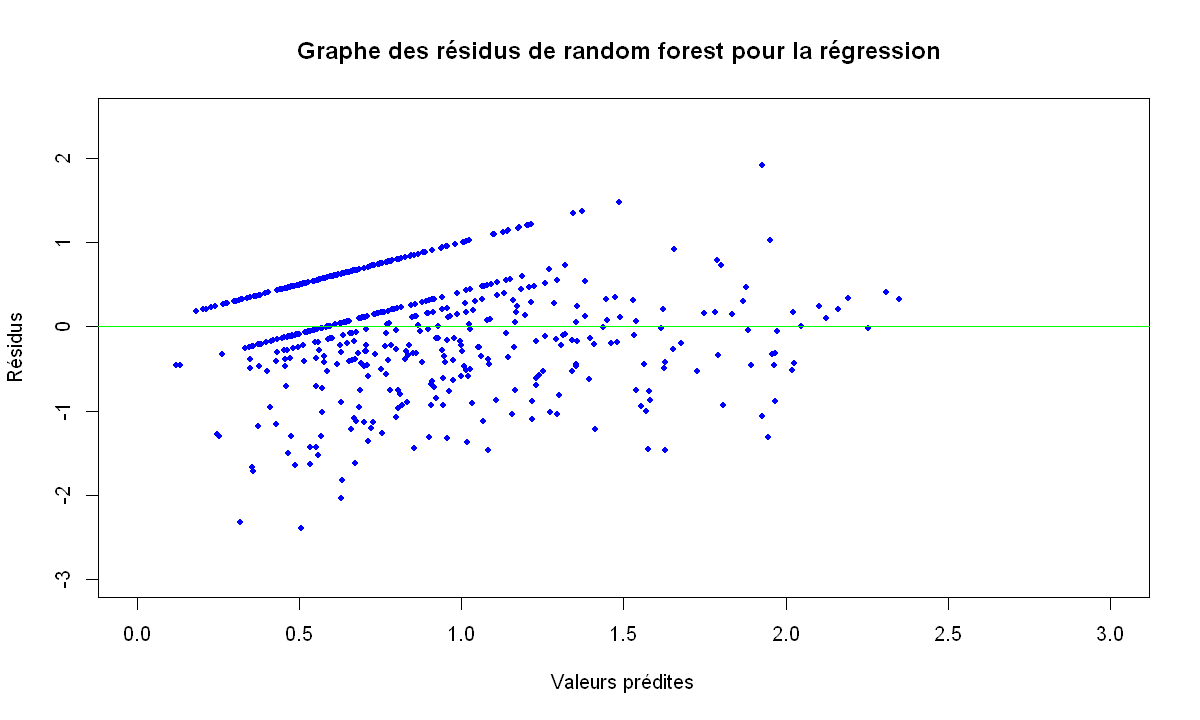

In [130]:
options(repr.plot.width = 10, repr.plot.height = 6)
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"rain_mod"]
plot.res(x = fit.rfr,y = res.rfr, titre = "Graphe des résidus de random forest pour la régression "
         ,lim_x = c(0, 3),lim_y = c(-3, 2.5))

<font color = "blue"> Nous traçons l'indice d'importance des variables :

In [131]:
rf.reg$importance

,%IncMSE,IncNodePurity
date,0.02652800,28.92756
ff_mod,0.01319485,11.90802
t_mod,0.02887324,13.01083
td_mod,0.02259563,12.34371
hu,0.03350001,17.64344
dd_mod,0.04286525,15.57418
precip_mod,0.06356185,29.55021
ws_arome_mod,0.01583693,13.32228
p3031_arome_mod,0.02535070,14.59616
u10_arome,0.04004005,18.76042


<font color = "blue"> Nous traçons ensuite le graphe de l'importance des variables. Pour cela, nous sélectionnons la MDA (%IncMSE)

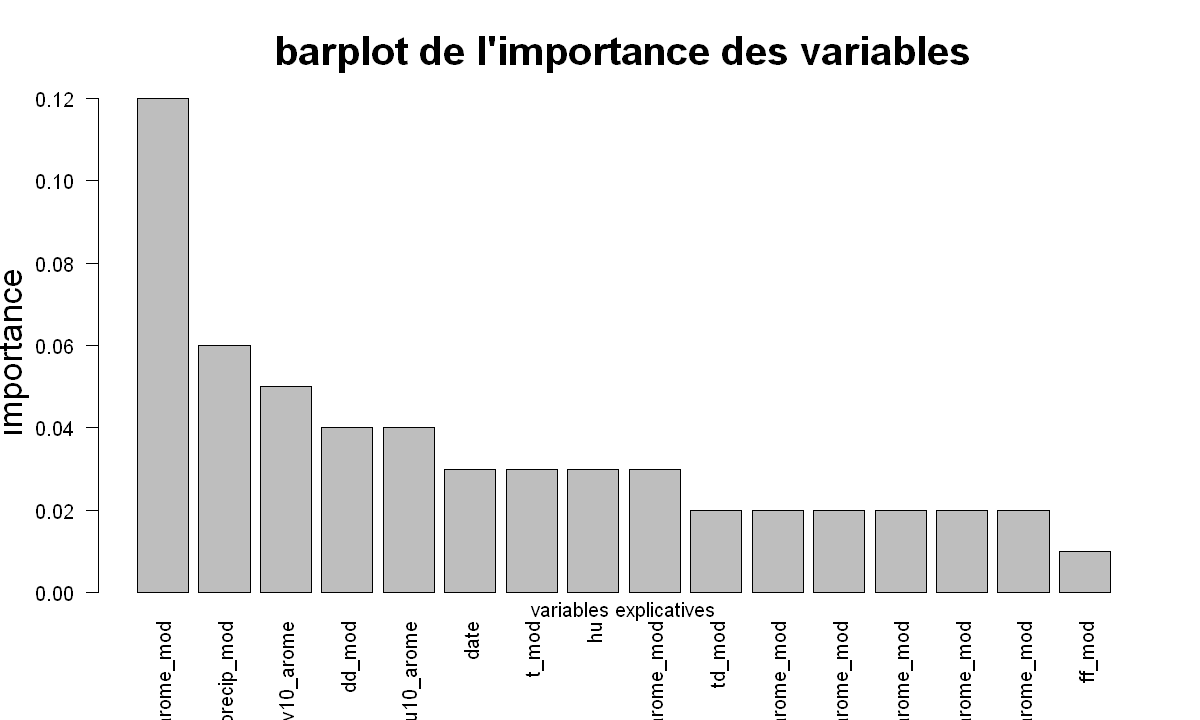

In [132]:
A = rf.reg$importance[,"%IncMSE"]
options(repr.plot.width = 10, repr.plot.height = 6)
barplot(sort(round(A, 2), decreasing=TRUE), main="barplot de l'importance des variables",
        xlab="",
        ylab="importance ",
        cex.main=2, cex.lab=1.7, cex.sub=1.2, las = 2)
mtext("variables explicatives", side=1,line=0)

<font color = "blue"> On voit que les paramètres ayant le plus d'importance sont arome_mod et precip_mod et u10_arome. Ce sont les variables que nous retrouvions lors de la construction d'un seul arbre CART.

<font color = "blue"> Calculons l'erreur de regression :

In [133]:
# Calcul des prévisions
pred.forestr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision en régression = erreur de généralisation sur échantillon de test
paste("erreur de généralisation: ",sum((pred.forestr-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'échantillon d'apprentissage 
paste("MSE : ",mean(res.rfr^2)) #res = rédidus


[1] "erreur de généralisation:  0.432930345032424"

[1] "MSE :  0.415435032230498"

<font color = "blue"> Ici, nous avons une erreur un peu moins importante que dans la cas d'un seul arbre (de 0.50 pour un seul arbre à 0.43 pour la forêt).  
    
<font color = "blue"> La regression est adaptée dans le cas où a variable à expliquer est continue. Or, ici, il y a beaucoup de jours àù la pluie est nulle, donc il y a une grosse masse d'observations autour de 0. Donc les méthodes qui utilisent la regression ne sont peut-être pas adaptées à notre jeu de données.

#### Discrimination
**Q** Quelle est la valeur par défaut de `mtry`?

<font color = "blue"> $m = \sqrt{p} $ dans le cas de la classification

<font color = "blue"> Donc ici $m=\sqrt{9}=3$

In [134]:
rf.dis=randomForest(rain_class~.,data=datappq,xtest=datestq[,-17],ytest=datestq[,
   "rain_class"],ntree=500,do.trace=50,importance=TRUE)

ntree      OOB      1      2      3|    Test      1      2      3
   50:  48.91% 46.71% 40.61% 62.13%|  48.55% 58.33% 41.27% 51.28%
  100:  48.36% 44.74% 41.48% 60.95%|  47.10% 52.78% 41.27% 51.28%
  150:  47.27% 46.05% 36.68% 62.72%|  47.10% 52.78% 44.44% 46.15%
  200:  46.73% 45.39% 36.24% 62.13%|  47.83% 52.78% 44.44% 48.72%
  250:  47.45% 46.71% 36.68% 62.72%|  47.83% 50.00% 46.03% 48.72%
  300:  46.18% 44.74% 37.12% 59.76%|  50.00% 50.00% 47.62% 53.85%
  350:  46.18% 46.71% 37.55% 57.40%|  50.00% 50.00% 49.21% 51.28%
  400:  46.36% 46.05% 38.43% 57.40%|  50.00% 50.00% 49.21% 51.28%
  450:  46.55% 47.37% 37.55% 57.99%|  49.28% 50.00% 47.62% 51.28%
  500:  46.91% 47.37% 38.43% 57.99%|  48.55% 50.00% 46.03% 51.28%


<font color = "blue"> Avec le graphique ci-dessus, on obtient taux de mal classés dans chaque classe, ce qui est important, même pour 500 arbres.
    
<font color = "blue"> Nous pouvons faire varier les paramètres pour trouver leur valeur optimale dans le cas de la discrimination.

In [135]:
Mtries = seq (3,8,1) #rappel : il y a p = 16 variables en tout
for (m in Mtries) {
    print(paste("test de random forest avec mtry = ",m))
    rf.dis2=randomForest(rain_class~.,data=datappq,xtest=datestq[,-17],ytest=datestq[,
   "rain_class"],ntree=500,do.trace=500,mtry = m,importance=TRUE)
    }

[1] "test de random forest avec mtry =  3"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  47.82% 47.37% 38.86% 60.36%|  47.83% 52.78% 46.03% 46.15%
[1] "test de random forest avec mtry =  4"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  46.55% 46.71% 36.24% 60.36%|  50.72% 52.78% 50.79% 48.72%
[1] "test de random forest avec mtry =  5"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  47.27% 46.71% 38.43% 59.76%|  48.55% 52.78% 46.03% 48.72%
[1] "test de random forest avec mtry =  6"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  47.45% 46.05% 40.61% 57.99%|  50.72% 52.78% 50.79% 48.72%
[1] "test de random forest avec mtry =  7"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  48.18% 49.34% 38.43% 60.36%|  52.90% 58.33% 52.38% 48.72%
[1] "test de random forest avec mtry =  8"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  47.82% 4

In [136]:
print("test de random forest en faisant varier ntree")
rf.dis2=randomForest(rain_class~.,data=datappq,xtest=datestq[,-17],ytest=datestq[,
   "rain_class"],ntree=800,do.trace=50,mtry = 4,importance=TRUE)

[1] "test de random forest en faisant varier ntree"
ntree      OOB      1      2      3|    Test      1      2      3
   50:  50.00% 47.37% 40.17% 65.68%|  52.17% 58.33% 50.79% 48.72%
  100:  49.45% 48.68% 40.17% 62.72%|  50.72% 58.33% 47.62% 48.72%
  150:  48.91% 48.68% 41.48% 59.17%|  51.45% 58.33% 49.21% 48.72%
  200:  48.55% 48.68% 40.17% 59.76%|  49.28% 55.56% 46.03% 48.72%
  250:  48.91% 47.37% 40.61% 61.54%|  47.83% 52.78% 47.62% 43.59%
  300:  48.73% 48.03% 40.17% 60.95%|  49.28% 55.56% 47.62% 46.15%
  350:  48.73% 47.37% 40.17% 61.54%|  50.72% 55.56% 50.79% 46.15%
  400:  48.18% 45.39% 39.74% 62.13%|  50.00% 52.78% 50.79% 46.15%
  450:  47.27% 44.08% 38.43% 62.13%|  49.28% 52.78% 49.21% 46.15%
  500:  47.45% 44.08% 38.86% 62.13%|  49.28% 52.78% 49.21% 46.15%
  550:  46.91% 44.74% 38.43% 60.36%|  49.28% 52.78% 49.21% 46.15%
  600:  47.09% 44.74% 37.99% 61.54%|  49.28% 52.78% 49.21% 46.15%
  650:  46.36% 44.74% 36.24% 61.54%|  49.28% 52.78% 49.21% 46.15%
  700:  46.36% 45.39% 36

<font color = "blue"> On observe que les paramètres optimaux sont : `mtry` = 4 et `ntree` = 700 (car 50 arbres semble trop faible).

<font color = "blue"> On redéfinit la forêt avec les paramètres optimaux :

In [137]:
rf.dis=randomForest(rain_class~.,data=datappq,xtest=datestq[,-17],ytest=datestq[,
   "rain_class"],ntree=700,mtry = 4,importance=TRUE)

In [138]:
rf.dis$importance

,high_rain,low_rain,no_rain,MeanDecreaseAccuracy,MeanDecreaseGini
date,0.017308824,0.0104562703,0.0082448811,0.011668674,30.25498
ff_mod,0.007975702,0.0037418689,-0.0011426211,0.003398131,17.80071
t_mod,0.029923022,0.0074923319,0.0001836386,0.011283731,19.22893
td_mod,0.015426418,0.0065957542,0.0023353077,0.007705199,19.31609
hu,0.023352123,0.0043463501,0.0186367352,0.013982771,24.53218
dd_mod,0.023656703,0.0001408644,0.0052565600,0.008277381,20.39876
precip_mod,0.028790122,-0.0005751952,0.0355506699,0.018482589,21.14990
ws_arome_mod,0.005630870,0.0060673424,0.0001965784,0.004058304,18.82092
p3031_arome_mod,0.022880790,0.0043807654,0.0049203895,0.009570786,21.79411
u10_arome,0.013604166,0.0056140250,0.0153784690,0.010857865,24.31784


<font color = "blue"> Il y a deux critères d'importance MDI et MDA. Ils sont calculés après avoir construit notre forêt. En effet, lorsque nous aggrégeons les arbres, l'interprétation devient difficile : ce n'est pas parce que'un variable est située au premier split d'un arbre qu'elle est la plus importante (car on a sélectionné aléatoirement $m$ variables parmi $p$). Afin d'aider à l'inteprétation du modèle, on calcule les indices d'importances des variables MDA et MDI. Si une variable a un indice d'importance élevé, c'est une variable qui a été décisive dans la construction de l'arbre et qui influence le résultat obtenu.
    
<font color = "blue"> Nous traçons un graphique de l'importance des variables :     

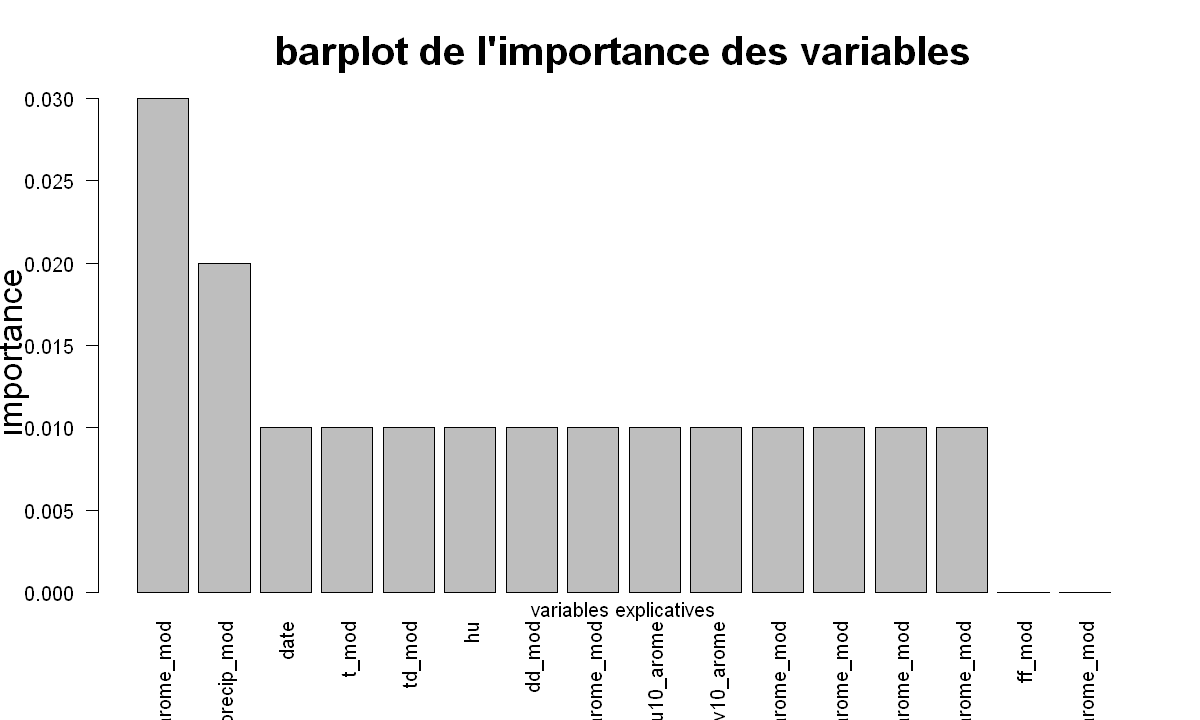

In [139]:
A = rf.dis$importance[,"MeanDecreaseAccuracy"]
options(repr.plot.width = 10, repr.plot.height = 6)
barplot(sort(round(A, 2), decreasing=TRUE), main="barplot de l'importance des variables",
        xlab="",
        ylab="importance ",
        cex.main=2, cex.lab=1.7, cex.sub=1.2, las = 2)
 mtext("variables explicatives", side=1,line=0)

<font color = "blue"> On trace le graphique de l'indice d'importance de la MeanDecreaseAccuracy. On voit que les paramètres ayant le plus d'importance sont arome_mod et precip_mod. Ce sont les variables que nous retrouvions lors de la construction d'un seul arbre CART.

<font color = "blue"> Calculons la table de contingence : 

In [140]:
# Même chose pour l'arbre de discrimination
table(rf.dis$test$predicted,datestq[,"rain_class"])

           
            high_rain low_rain no_rain
  high_rain        17       15       5
  low_rain         17       31      13
  no_rain           2       17      21

In [141]:
paste("Purity arbre forêt aléatoire :", purity(table(rf.dis$test$predicted,datestq[,"rain_class"])))
paste("F1_Score arbre forêt aléatoire :", F1_Score(rf.dis$test$predicted,datestq[,"rain_class"]))

[1] "Purity arbre forêt aléatoire : 0.5"

[1] "F1_Score arbre forêt aléatoire : 0.465753424657534"

- <font color = "blue">  lorsque la valeur observée est **high_rain** le modèle se trompe une fois sur deux et prédit low_rain.
- <font color = "blue">  lorsque la valeur observée est **low_rain** le modèle se trombe aussi une fois sur deux et prédit high_rain et no_rain avec même probabilité.  
- <font color = "blue">  lorsque la valeur observée est **no_rain** le modèle se trombe encore une fois sur deux et prédit low_rain. 
 

<font color = "blue"> Ces résultats sont les mêmes que sur un arbre CART ce qui n'est pas satisfaisant. Dans ce cas, l'aggrégation n'a pas amélioré notre modèle. 

<font color = "blue"> On transforme la régression en classification :

In [142]:
pred.forestr.C = table(RegToClassif(pred.forestr), datestq[, "rain_class"])
print("Table de contingence de la forêt aléatoire")
print("où on a transformé la régression en classification")
pred.forestr.C

paste("Purity forêt aléatoire où on a transformé la régression en classification:", purity(pred.forestr.C))
paste("F1_Score orêt où on a transformé la régression en classification:", F1_Score(RegToClassif(pred.forestr), datestq[, "rain_class"]))

[1] "Table de contingence de la forêt aléatoire"
[1] "où on a transformé la régression en classification"


           
            high_rain low_rain no_rain
  high_rain        13        6       3
  low_rain         23       57      36

[1] "Purity forêt aléatoire où on a transformé la régression en classification: 0.507246376811594"

[1] "F1_Score orêt où on a transformé la régression en classification: 0.448275862068966"

### Boosting

Deux librairies proposent des versions relativement  sophistiquées des algorithmes de *boosting* dans R. La librairie *boost* propose 4 approches : *adaboost, bagboost* et deux *logitboost*. Développées pour une problématique particulière : l'analyse des données d'expression génomique, elle n'est peut-être pas complètement adaptée aux données étudiées ; elles se limitent à des prédicteurs quantitatifs et peut fournir des résultats étranges. La librairie *gbm* lui est préférée ; elle offre aussi plusieurs versions dépendant de la fonction coût choisie. Une librairie plus récente `xgboost` intègre des fonctionnalités de parallélisation (pas sous Windows) et fait intervenir plusieurs autres paramètres.

La variable à prévoir doit être codée numériquement (0,1) pour cette implémentation. Le nombre d'itérations, ou nombre d'arbres, est paramétré ainsi qu'un coefficient de rétrécissement (*shrinkage*).

**Q** Comment intervient le *schrinkage* en *boosting*? 

<font color = "blue"> Le *schrinkage* (seuillage) consiste à redimensionner (scaling) la contribution de chaque arbre par un facteur $\nu$ ce qui permet d'éviter l'overfitting.</font>

**Q** Pour quel boosting? Ou que signifie `gbm`?

<font color = "blue"> Le *schrinkage* intervient dans les *Gradient Boosting Models (GBM)*.</font>
    
*Attention*, par défaut, ce paramètre a une valeur très faible (0.001) et il faut un nombre important d'itérations (d'arbres) pour atteindre une estimation raisonnable. La qualité est visualisée par un graphe représentant l'évolution de l'erreur d'apprentissage. D'autre part, une procédure de validation croisée est incorporée afin d'optimiser le nombre d'arbres car la version de *boosting* considérée est (légèrement) sujette au sur-apprentissage.

<font color = "red"> **Attention** : Dans le Boosting, les résultats numériques changent à chaque run. </font>

#### Régression

In [143]:
boost.reg = gbm(rain_mod ~ ., data = datappr, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
#fixer verbose à FALSE pour éviter trop de sorties
#n.minobsinnode : Integer specifying the minimum number of observations in the terminal nodes of the trees.

<font color = "blue"> Le nombre d'itérations $M$ est un paramètre à calibrer. Chaque itération d'un algorithme de boosting réduit la **training error** et donc de grandes valeurs de $M$ mènent à de **l'overfitting**. On peut calibrer ce paramètre en estimant la **generalization error** sur un échantillon de validation (par exemple en utilisant la cross-validation) et on choisit la valeur de $M$ qui minimise cette erreur.

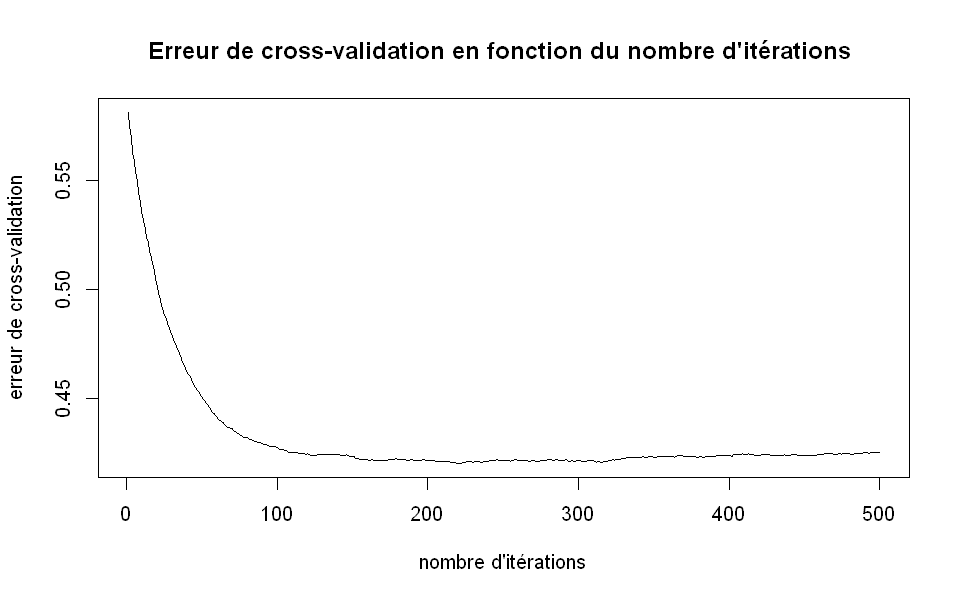

In [144]:
options(repr.plot.width = 8, repr.plot.height = 5)
plot(boost.reg$cv.error, xlab = "nombre d'itérations", ylab = "erreur de cross-validation",
     type = "l", main = "Erreur de cross-validation en fonction du nombre d'itérations ")

<font color = "blue"> Le graphique ci-dessus est présente l'erreur de cross-validation en fonction du nombre d'itérations $M$. Dans la cellule ci-dessous, on choisit la valeur de $M$ qui minimise l'erreur de cross-validation.

[1] "nombre d'itérations optimal : 220"


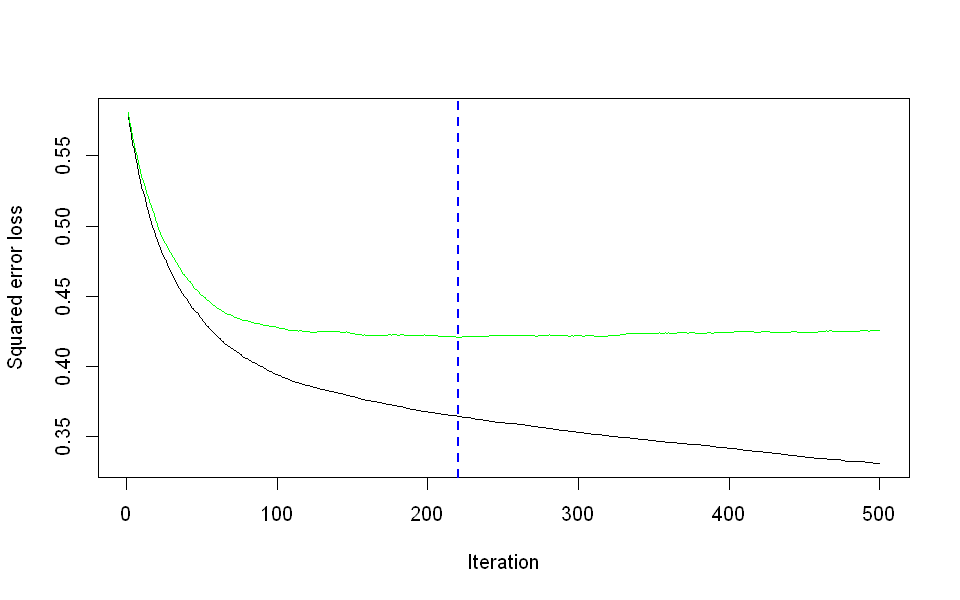

In [145]:
# nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(boost.reg,method="cv")
print(paste("nombre d'itérations optimal :", best.iter))

<font color = "blue"> La commande ci-dessus génère 2 plots :
- <font color = "blue"> en noir : l'erreur de généralisation (`boost.reg$train.error`) en fonction du nombre d'itérations.
- <font color = "blue"> en vert : l'erreur de cross-validation (`boost.reg$cv.error`) en fonction du nombre d'itérations
    
<font color = "blue"> On observe donc que $M $ = `best.iter` itérations minimise ces deux erreurs. 

On peut s'assurer de l'absence d'un phénomène de sur-apprentissage critique en calculant puis traçant l'évolution de l'erreur sur l'échantillon test en fonction du nombre d'arbre dans le modèle. L'erreur reste stable autour du nombre d'arbres sélectionné et matérialisé par la ligne verticale. 

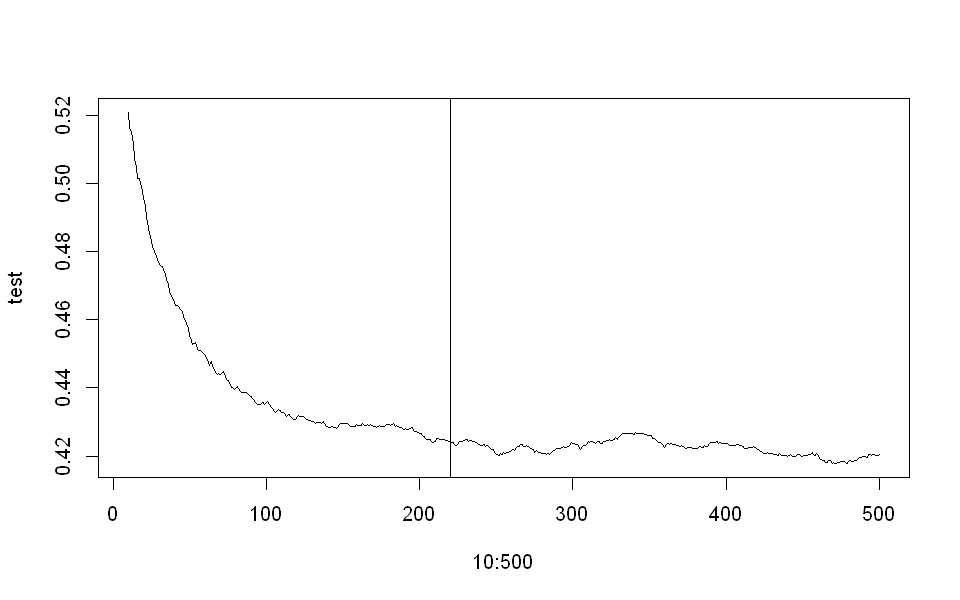

In [146]:
test=numeric()
for (i in 10:500){
pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
err=sum((pred.test-datestr[,"rain_mod"])^2)/nrow(datestr)
test=c(test,err)
}
plot(10:500,test,type="l")
abline(v=best.iter)

**Q** Tester ces fonctions en faisant varier le coefficient de rétrécissement.

<font color = "blue"> Nous pouvons faire varierle paramètre de *shrinkage* et choisir celui qui donne la plus petite erreur de généralisation pour un nombre d'itérations fixé $M$ = `best.iter`.

In [147]:
ntries = best.iter
s = seq (0.01, 0.1, 0.02)
test_s=numeric()
tab_err = matrix(, nrow = length(s), ncol = 2) 
#tab_err : colonne 1 : la valeur du shrinkage, colonne 2 : la valeur de l'erreur

for (i in  1:length(s)) {
    boost.reg_s = gbm(rain_mod ~ ., data = datappr, distribution = "gaussian", n.trees = ntries, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = s[i], verbose = FALSE)
    
    pred.test_s = predict(boost.reg_s,newdata=datestr,n.trees=ntries)
    err_s =sum((pred.test_s-datestr[,"rain_mod"])^2)/nrow(datestr)
    tab_err[i,1] = s[i]
    tab_err[i,2] = err_s  
}

In [148]:
tab_err
best.shrink.r = tab_err [which(tab_err == min(tab_err[,2]), arr.ind=TRUE)[1],1]
print(paste("shrinkage minimisant l'erreur de généralisation : ",best.shrink.r))

0.01,0.4389684
0.03,0.4275772
0.05,0.4317562
0.07,0.4298733
0.09,0.4253137


[1] "shrinkage minimisant l'erreur de généralisation :  0.09"


<font color = "blue"> On redéfinit le boosting avec les paramètres optimaux :

In [149]:
boost.reg = gbm(rain_mod ~., data = datappr, distribution = "gaussian", n.trees = best.iter, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = best.shrink.r, verbose = FALSE)

#### Discrimination

Attention, la variable à modéliser doit être codée $(0, 1)$ et il faut préciser un autre paramètre de distribution pour considérer le bon terme d'erreur.

<font color = "blue"> Pas besoin de transformer les modalités entre (0,1), il suffit d'utiliser `distribution = "multinomial"` dans la méthode `gbm`. Ceci aurait été utile si nous avions 2 classes et que nous pouvions utiliser *Adaboost*.

In [150]:
#Ce code transforme les 3 modalités en valeurs numériques comprises entre (0,1)*
#Il s'avère que ce n'est pas utile si in utilise distribution = "multinomial" dans gbm
datappq2=datappq
datappq2[,"rain_class"]=as.numeric(datappq[,"rain_class"])
#rescale les données entre 0 et 1
datappq2[,"rain_class"] = (datappq2[,"rain_class"] - min(datappq2[,"rain_class"])) / (max(datappq2[,"rain_class"]) - min(datappq2[,"rain_class"]))
# on obtient : 
# 0.0 : high_rain
# 0.5 : low_rain 
# 1.0 : no_rain

In [151]:
boost.dis=gbm(rain_class~.,data=datappq, distribution = "multinomial", n.trees=500, cv.folds=10,
              n.minobsinnode = 5,shrinkage=0.03,verbose=FALSE)

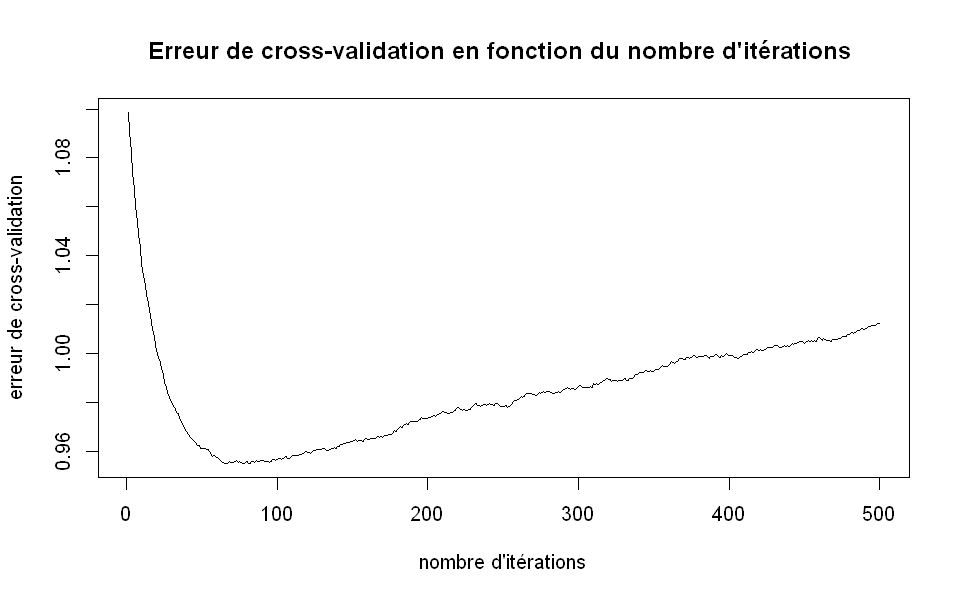

In [152]:
options(repr.plot.width = 8, repr.plot.height = 5)
plot(boost.dis$cv.error,type="l", xlab = "nombre d'itérations", ylab = "erreur de cross-validation",
     main = "Erreur de cross-validation en fonction du nombre d'itérations ")

[1] "nombre d'itérations optimal : 81"


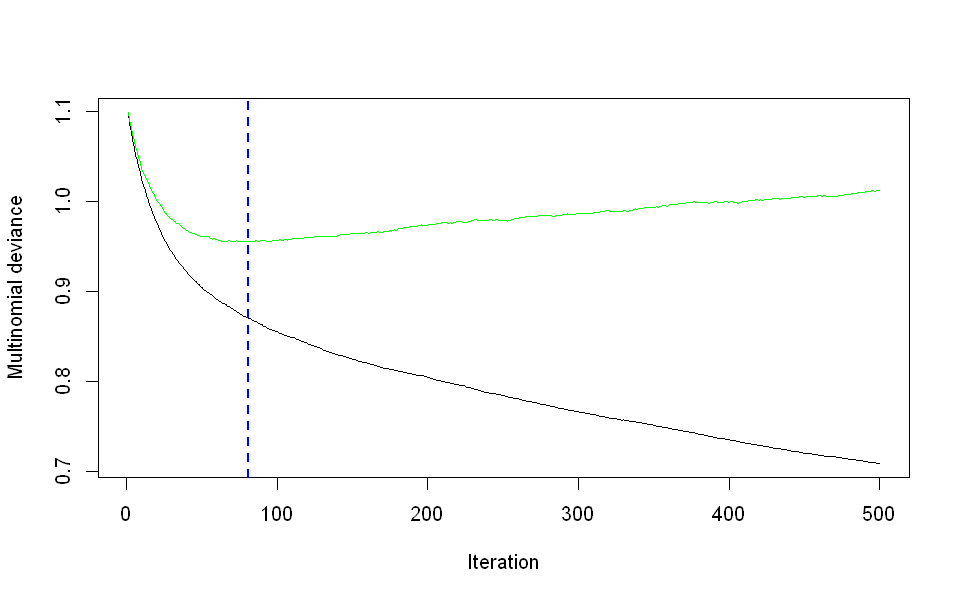

In [153]:
# nombre optimal d'itérations 
best.ited=gbm.perf(boost.dis,method="cv")
print(paste("nombre d'itérations optimal :", best.ited))

<font color = "blue"> Comme pour la regression, on a 2 plots :
- <font color = "blue"> en noir : l'erreur de généralisation (`boost.dis$train.error`) en fonction du nombre d'itérations.
- <font color = "blue"> en vert : l'erreur de cross-validation (`boost.dis$cv.error`) en fonction du nombre d'itérations
    
<font color = "blue"> On observe donc que $M $ = `best.ited` itérations minimise ces deux erreurs. 

Comme pour la régression, il est possible de faire varier le coefficient de rétrécissement en l'associant au nombre d'arbres dans le modèle.

<font color = "blue"> Nous pouvons faire varier le paramètre de *shrinkage* et choisir celui qui donne la meilleure pureté pour un nombre d'itérations fixé $M$ = `best.iter`.

In [154]:
ntries = best.ited
s = seq (0.01, 0.1, 0.02)
test_s=numeric()
purityTab = matrix(, nrow = length(s), ncol = 2) 
#purityTab : colonne 1 : la valeur du shrinkage, colonne 2 : la valeur de la pureté

for (i in  1:length(s)) {
    boost.dis_s = gbm(rain_class~.,data=datappq, distribution = "multinomial", n.trees=ntries, cv.folds=10,
              n.minobsinnode = 5,shrinkage=s[i],verbose=FALSE)
    #prédiction
    pred.boostd_s = predict(boost.dis_s,newdata=datestq,n.trees=ntries,type="response")
    #construction d'une table de confusion 
    pred.boostd_s = colnames(pred.boostd_s)[apply(pred.boostd_s, 1, which.max)]
    table_s = table (pred.boostd_s,datestq[,"rain_class"])
    purityTab[i,1] = s[i]
    purityTab[i,2] = purity(table_s)
   
}

In [155]:
purityTab
best.shrink.d = purityTab [which(purityTab == min(purityTab[,2]), arr.ind=TRUE)[1],1]
print(paste("shrinkage maximisant la pureté : ",best.shrink.d))

0.01,0.5362319
0.03,0.5144928
0.05,0.5144928
0.07,0.5362319
0.09,0.5144928


[1] "shrinkage maximisant la pureté :  0.03"


<font color = "blue"> On redéfinit le boosting avec les paramètres optimaux.

In [156]:
boost.dis = gbm(rain_class~.,data=datappq, distribution = "multinomial", n.trees=best.ited, cv.folds=10,
              n.minobsinnode = 5,shrinkage=best.shrink.d,verbose=FALSE)

Calcul des résidus et graphe.

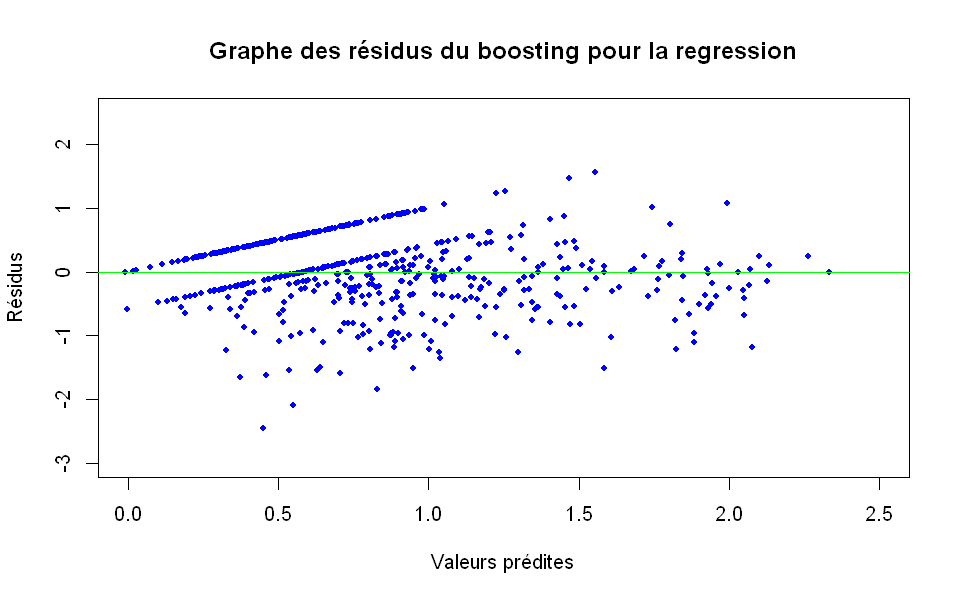

In [157]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"rain_mod"]
plot.res(fit.boostr,res.boostr,titre = "Graphe des résidus du boosting pour la regression"
         ,lim_x = c(0, 2.5),lim_y = c(-3, 2.5))

### Prévision de l'échantillon test

#### Erreur de régression

In [158]:
# Boosting 
pred.boostr=predict(boost.reg,newdata=datestr,n.trees=best.iter)
# Erreur quadratique moyenne de prévision = erreur de généralisation sur l'échantillon de test
paste("erreur de généralisation: ",sum((pred.boostr-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'échantillon d'apprentissage 
paste("MSE : ",mean(res.boostr^2)) #res = rédidus


[1] "erreur de généralisation:  0.435567267296028"

[1] "MSE :  0.322478725906414"

<font color = "blue"> On peut observer de meilleurs résultats (erreur plus faible) que pour les algorithmes d'*abre de décision binaire*, *Réseau de neurones*, ou encore *Forêt aléatoire*

#### Erreur de classification (matrices de confusion)

In [192]:
# Boosting 
# Même chose pour la discrimination
pred.boostd = predict(boost.dis,newdata=datestq,n.trees=best.ited, type="response")
#si on ne met pas type="response" on a log probabilities. 
#en mettant type="response", on a la probabilité de chaque modalité.
pred.boostd = colnames(pred.boostd)[apply(pred.boostd, 1, which.max)]
table(pred.boostd,datestq[,"rain_class"])

           
pred.boostd high_rain low_rain no_rain
  high_rain        16       11       4
  low_rain         19       40      15
  no_rain           1       12      20

In [193]:
paste("Purity pour le Boosting", purity (table(pred.boostd,datestq[,"rain_class"])))
paste("F1_Score pour le Boosting", F1_Score(pred.boostd,datestq[,"rain_class"]))

[1] "Purity pour le Boosting 0.550724637681159"

[1] "F1_Score pour le Boosting 0.477611940298507"

<font color = "blue"> Nous observons :
    
- <font color = "blue">  lorsque la valeur observée est **high_rain** le modèle se trompe une fois sur deux et prédit low_rain.
- <font color = "blue">  lorsque la valeur observée est **low_rain** le modèle se trompe aussi une fois sur deux et prédit high_rain et no_rain avec même probabilité environ.  
- <font color = "blue">  lorsque la valeur observée est **no_rain** le modèle se trompe encore une fois sur deux et prédit low_rain. 

**Q** Quelle  stratégie d'agrégation de modèles vous semble fournir le meilleur résultat de prévision? 

**Q** Est-elle, sur ce jeu de données, plus efficace que les modèles classiques expérimentés auparavant ?

<font color ="blue"> Nous transformons la régression en classification :

In [161]:
pred.boostr.C = table(RegToClassif(pred.boostr), datestq[, "rain_class"])
print("Table de contingence de le Boosting")
print("où on a transformé la régression en classification")
pred.boostr.C

paste("Purity pour le Boosting où on a transformé la régression en classification :",purity (pred.boostr.C))
paste("F1_Score pour le Boosting où on a transformé la régression en classification :",F1_Score(RegToClassif(pred.boostr),datestq[,"rain_class"]))

[1] "Table de contingence de le Boosting"
[1] "où on a transformé la régression en classification"


           
            high_rain low_rain no_rain
  high_rain        13        7       2
  low_rain         23       55      36
  no_rain           0        1       1

[1] "Purity pour le Boosting où on a transformé la régression en classification : 0.5"

[1] "F1_Score pour le Boosting où on a transformé la régression en classification : 0.448275862068966"

#### Courbes ROC

<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

**Q** Qu'indique la comparaison des coubes ROC?

# <FONT COLOR="Red">Épisode 4</font>

## [Séparateur à Vaste Marge (SVM)](http://wikistat.fr/pdf/st-m-app-svm.pdf)

### Introduction

Malgré les assurances théoriques concernant ce type d'algorithme, les résultats dépendant fortement du choix des paramètres. Nous nous limiterons d'abord au noyau gaussien (choix par défaut) ; la fonction `tune.svm` permet de tester facilement plusieurs situations en estimant la qualité de prévision par validation croisée sur une grille. Le temps d'exécution en R est un peu long... 

**Q** Le temps d'exécution pour les SVM est-il plus sensible au nombre d'observations ou au nombre de varaibles ? Pourquoi ?


<FONT COLOR = "blue"> Le temps d'exécution des SVM n'est pas sensible au nombre d'observations car seuls les vecteurs supports (données mal classées, à l'intérieur ou sur les marges) interviennent dans le problème de minimisation que doit résoudre l'algorithme des SVM. En revanche, un produit scalaire entre les individus intervient dans le calcul des SVM. Ainsi, plus le nombre de variables augmente et plus le produit scalaire sera long à calculer.

    
<FONT COLOR = "blue"> La fonction svm de R peut être utilisée pour de la classification (pour la variable **rain_class**), pour de la régression (pour la variable **rain_mod**) ou pour de la détection d'outliers.

### Régression

Bien qu'initialement développés dans le cas d'une variable binaire, les SVM ont été étendus aux problèmes de régression. L'estimation et l'optimisation du coefficient de pénalisation sont obtenues par les commandes suivantes.  


In [162]:
# réalisation d'une SVM pour la régression : avec la variable rain_mod (quantitative)
#--------------------------------------------------------------
svm.reg0 = svm(rain_mod ~ ., data = datappr, type = "eps",cross = 5) 
#type = "eps" : regression, kernel = radial par défault (noyau gaussien)
#cross = 5: k-fold cross validation on the training data to assess the quality of the model (mean square error)
summary(svm.reg0)


Call:
svm(formula = rain_mod ~ ., data = datappr, type = "eps", cross = 5)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.03703704 
    epsilon:  0.1 


Number of Support Vectors:  499



5-fold cross-validation on training data:

Total Mean Squared Error: 0.4281628 
Squared Correlation Coefficient: 0.28278 
Mean Squared Errors:
 0.4121141 0.5174432 0.4071596 0.3954091 0.408688 




<FONT COLOR = "blue"> Dans le cas de la regression, la SVM essaie de trouver une fonction $f$ qui approche au mieux les données (la différence entre $f(x_i)$ et $y_i$ est au plus de $\epsilon$) et qui est la plus droite/plate possible ie: on essaye de trouver une fonction qui s'apparente à une droite et qui fit au mieux nos données envoyées dans un certain espace de hilbert (RKHS). Pour envoyer nos données dans cet espace de hilbert, on utilise un kernel (ici le kernel gaussien).  
   
    
<FONT COLOR = "blue"> Nous ne pouvons pas tracer de graphe ici car il s'agit de regression.
    
<FONT COLOR = "blue"> Le noyeau gaussien est défini par : $K(x,y)= exp (−\gamma \sum_{n=1}^{p} (x_{ij}–y_{ij})^2)$ qui ne présente qu'un seul paramètre $\gamma$. 
    
- <FONT COLOR = "blue">  Nous observons qu'il y a 499 vecteurs supports. En regression, les vecteurs supports sont les points du dataset qui sont sur les marges où en dehors des marge
    
- <FONT COLOR = "blue"> Nous avons par défaut `cost` = 1. La variable `cost` correspond au critère de pénalisation C dans le problème de minimisation que résout les SVM (p.65 poly). Plus la pénalité C augmente et plus on réduit le nombre de vecteurs supports. En effet, plus C augment, plus les slack variables 𝜉𝑖 sont petits et donc plus on rapproche les marges et moins on a de vecteurs supports. Ici, `cost` = 1 donc C = 1 (paramètre par défaut). Si C -> $\infty$ alors nous aurons que 3 vecteurs supports (ce qui est le nombre de points minimal pour tracer les marges qui sont 2 droites parallèles) et on risque de faire du surapprentissage. L'algorithme deviendra peu robuste à de nouvelles obervations.   

- <FONT COLOR = "blue"> Avec `cross` = 5 nous effectuons une 5-fold cross validation. Nous obtenons alors une valeur de `Mean Squared Errors` pour chaque étape de la cross-validation (= performance de l'algo calculée sur chacun des folds par validation-croisée). La `Total Mean Squared Error` est la moyenne des `Mean Squared Errors`.
    
- <FONT COLOR = "blue"> `epsilon` = 0.1 (valeur par défaut) est la $\epsilon$ - sensitive loss function $l_{\epsilon}$ (p.65 poly) qui est une fonction perte insensible aux erreurs + petites que $\epsilon$.
       
- <FONT COLOR = "blue"> Enfin `gamma` est un paramètre intervenant dans le kernel (default: 1/(data dimension))

In [163]:
help(svm)

In [164]:
# optimisation des paramètres pour la SVM régression
#--------------------------------------------------------------
#set.seed(2021)
svm.reg.tune = tune.svm(rain_mod ~ ., data = datappr, cost = c(0.3,0.4,0.5), gamma = seq(0.001, 0.1, by = 0.02))
#plot(svm.reg.tune) #on peut plot si on veut les paramètres optimaux

#tune.svm : parameter Tuning of Functions Using Grid Search
#We will obtain the optimal values for the cost, gamma, and coef0 (si il y est)

In [165]:
summary(svm.reg.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 0.021  0.5

- best performance: 0.4063127 

- Detailed performance results:
   gamma cost     error dispersion
1  0.001  0.3 0.4776717  0.1214075
2  0.021  0.3 0.4076337  0.1040823
3  0.041  0.3 0.4085083  0.1052563
4  0.061  0.3 0.4099741  0.1078852
5  0.081  0.3 0.4124507  0.1094619
6  0.001  0.4 0.4636052  0.1140309
7  0.021  0.4 0.4065282  0.1037593
8  0.041  0.4 0.4080577  0.1053592
9  0.061  0.4 0.4117990  0.1087427
10 0.081  0.4 0.4151241  0.1102054
11 0.001  0.5 0.4540076  0.1092759
12 0.021  0.5 0.4063127  0.1040230
13 0.041  0.5 0.4085696  0.1057204
14 0.061  0.5 0.4137987  0.1095000
15 0.081  0.5 0.4176742  0.1113919


<FONT COLOR = "blue"> Nous observons que les meilleurs paramètres sont obtenus avec `gamma` = 0.021 et `cost` = 0.5. En faisant varier plusieurs fois les valeurs de cost et gamma, on observe que plus la valeur optimale de gamma trouvée diminue et plus la valeur optimale de cost augmente. On observe que plusieurs intervalles pour gamma et cost donnent des résultats différents. L'optimisation des paramètres n'est pas unique.

Par défaut la pénalisation (cost) vaut 1. Noter la pénalisation optimale pour le noyau considéré (gaussien). Ré-estimer le modèle supposé optimal avant de tracer le graphe des résidus. Comme précédemment, observer que plusieurs exécutions conduisent à des résultats différents et donc que l'optimisaiton de ce paramètre est pour le moins délicate.

<FONT COLOR = "blue"> Nous effectuons alors la svm avec les paramètres optimaux :

In [166]:
# redéfinition de la SVM en utilisant les paramètres optimaux trouvés precédemment.
#--------------------------------------------------------------
svm.reg = svm(rain_mod ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
              gamma = svm.reg.tune$best.parameters$gamma,cross = 5)

In [167]:
summary(svm.reg)


Call:
svm(formula = rain_mod ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, cross = 5)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  0.5 
      gamma:  0.021 
    epsilon:  0.1 


Number of Support Vectors:  494



5-fold cross-validation on training data:

Total Mean Squared Error: 0.4074598 
Squared Correlation Coefficient: 0.3074696 
Mean Squared Errors:
 0.4252767 0.3132174 0.4615686 0.4840812 0.3531551 




<FONT COLOR = "blue"> On observe que le nombre de vecteurs supports a faiblement diminué (de 499 à 494). La valeur de C a diminué (cost est passé de 1 à 0.5) donc on s'attendrait à avoir davantage de vecteurs supports. Ceci peut s'expliquer par le fait que la paramètre gamma intervenant dans la définition du kernel contrebalance l'effet de C.
    
<FONT COLOR = "blue"> Avec l'optimisation des paramètres, on observe que l'on a diminué la `Total Mean Squared Error` qui est passé de 0.4267061 à 0.4022425.

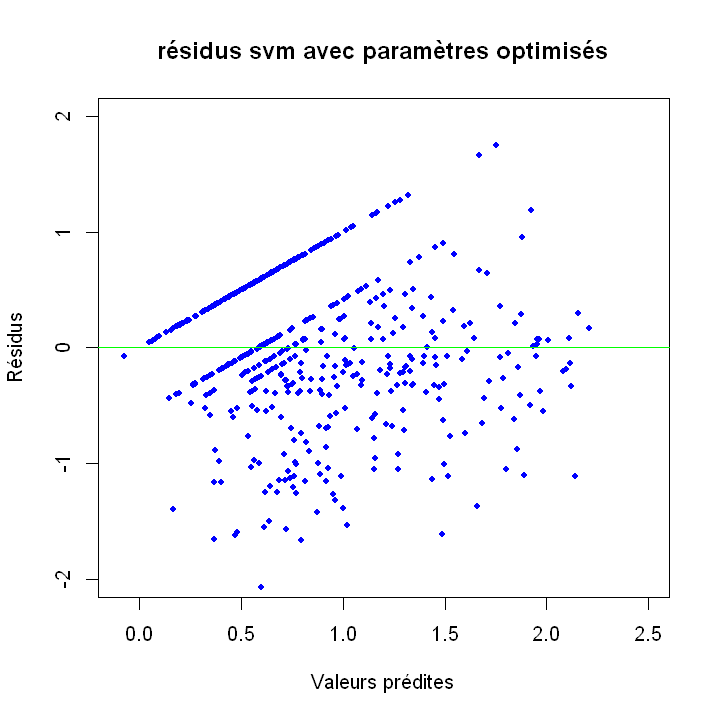

In [168]:
# calcul et graphe des résidus
options(repr.plot.width = 6, repr.plot.height = 6)
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"rain_mod"]
plot.res(fit.svmr,res.svmr,titre="résidus svm avec paramètres optimisés",lim_y = c(-2, 2),lim_x = c(-0.1, 2.5))

**Q** Qu'est-ce qui cause le rapprochement des résidus dans un "couloir"? Qu'observez-vous lorsque vous faîtes varier les paramètres cost et epsilon?

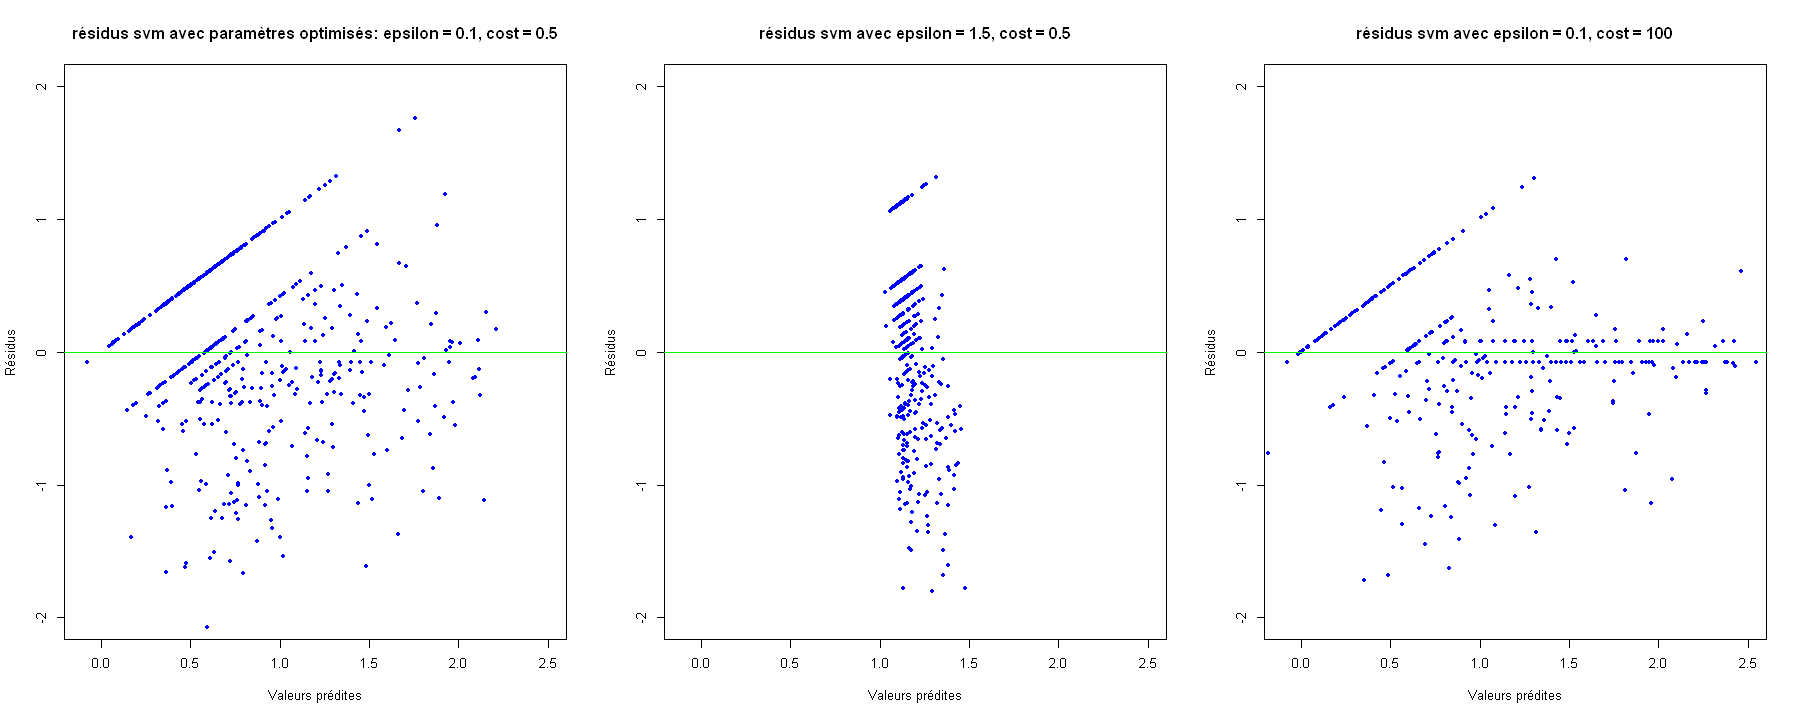

In [169]:
# Influence du paramètre epsilon
svm.reg.epsi = svm(rain_mod ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, epsilon = 1.5, 
                    gamma = svm.reg.tune$best.parameters$gamma)
options(repr.plot.width = 6, repr.plot.height = 6)

# Influence du paramètre cost
svm.reg.cost = svm(rain_mod ~ ., data = datappr, cost = 100, 
                    gamma = svm.reg.tune$best.parameters$gamma)

# Plot du graphe des résidus pour les paramètres optimaux
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1, 3))
plot.res(fit.svmr,res.svmr,titre="résidus svm avec paramètres optimisés: epsilon = 0.1, cost = 0.5",lim_y = c(-2, 2),lim_x = c(-0.1, 2.5))

# Plot du graphe des résidus pour epsilon modifié
fit.svmr.epsi=svm.reg.epsi$fitted
res.svmr.epsi=fit.svmr.epsi-datappr[,"rain_mod"]
plot.res(fit.svmr.epsi,res.svmr.epsi,titre="résidus svm avec epsilon = 1.5, cost = 0.5",lim_y = c(-2, 2),lim_x = c(-0.1, 2.5))

# Plot du graphe des résidus pour cost modifié
fit.svmr.cost=svm.reg.cost$fitted
res.svmr.cost=fit.svmr.cost-datappr[,"rain_mod"]
plot.res(fit.svmr.cost,res.svmr.cost,titre="résidus svm avec epsilon = 0.1, cost = 100",lim_y = c(-2, 2),lim_x = c(-0.1, 2.5))

<FONT COLOR = "blue"> On remarque que lorsque `epsilon` augmente les résidus ont tendance à tendre verus une droite verticale $\hat Y = a$ et $\hat \epsilon = Y - \hat Y = Y - a$ . Rappelons que la valeur de epsilon calibre la fonction perte  $l_{\epsilon}$ qui est $\epsilon$ - sensitive c'est à dire qu'elle est insensible aux erreurs + petites que $\epsilon$. Ainsi, plus $\epsilon$ augmente et plus les erreurs sont importantes (erreur = $\epsilon$ = déviation entre $f(x_i)$ et $y_i$) et donc moins la fonction $f$ d'ajuste aux données. Dans le cas extrême d'un epislon grand, la prédiction $\hat Y$ devient la   moyenne de toutes nos données et prend une valeur unique pour toutes nos données. 
    
<FONT COLOR = "blue"> Par la suite, on observe que lorsque `cost` augmente nos données commencent à former un tube de taille $\epsilon$ autour de 0. En effet, si cost augmente, alors les slack variables $\xi_i$ diminuent et donc on n'autorise pas d'erreurs plus grandes que $\epsilon$ (les $\xi_i$ permettent de considérer que certaines données hors du tube de taille $\epsilon$ sont aussi justes). Ainsi, lorsqu'une donnée à prédire est hors du tube de taille $\epsilon$, comme on n'a pas autorisé d'erreurs hors tube, alors les valeurs de $\hat Y$ prédites vont être constantes et valoir $\pm \epsilon$ pour tenter de s'approcher au mieux de la donnée sans toutefois sortir du tube. 

**Q** Quels autres noyaux sont disponibles dans cette implémentation des SVM?

<FONT COLOR = "blue"> Les autres noyaux proposés sont : linear, polynomial et sigmoid. 

<FONT COLOR = "green"> Faut-il tester d'autres kernels ? oui si on a le temps mais le noyau gaussien est le kernel à tester de préférence car il fonctionne bien presque tout le temps.

### Discrimination

<FONT COLOR = "blue"> La méthode SVM pour la classification est initialement implémentée pour une variable binaire $Y \in \left\{-1,1 \right\}$. 
Or il est possible de faire de la SVM Multiclass. Il s'agit d'apprendre une classe contre toutes les autres, ou de faire des modèle par paires de classes. Dans le cas de ce projet, nous avons 3 classes pour **rain_class** : no_rain (noté c1), low_rain (noté c2), high_rain (noté c3). On apprend d'abord c1 contre c2 et c3, puis c2 contre c1 et c3 et enfin c3 contre c1 et c2. 
        
<FONT COLOR = "blue"> Le prédicteur est : $\hat f(x) = 1_{\sum_{x_isv} y_i\alpha_i<x_i,x> + b ~\ge~ 0} - 1_{\sum_{x_isv} y_i\alpha_i<x_i,x> + b ~<~ 0}$
    
    
<FONT COLOR = "blue"> Nous allons obtenir les `svm.model$decision.values` qui sont un vecteur contenant les valeurs de $\sum_{x_isv} y_i\alpha_i<x_i,x> + b$ pour chaque $x_i$. Comme nous aurons 3 classes, nous avons 3 vecteurs. Ces $\sum_{x_isv} y_i\alpha_i<x_i,x> + b$ correspondent à des distances entre le datapoint et la marge donc pour choisir à quelle classe on attribue le datapoint $x_i$ on prendra la distance maximale parmi les 3 distances proposées par les 3 vecteurs. La distance la plus grande veut dire qu'on est le + loin de la ligne de séparation donc on est + sûrs de cette classification. 

In [170]:
# réalisation d'une SVM pour la classification : avec la variable rain_class (qualitative)
#--------------------------------------------------------------
svm.dis0 = svm(rain_class ~ ., data = datappq, type = "C",cross = 5) 
#type = "C" : classification, kernel = radial par défault (noyau gaussien)
#cross = 5: k-fold cross validation on the training data to assess the quality of the model (accuracy rate)
summary(svm.dis0)


Call:
svm(formula = rain_class ~ ., data = datappq, type = "C", cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  486

 ( 203 118 165 )


Number of Classes:  3 

Levels: 
 high_rain low_rain no_rain

5-fold cross-validation on training data:

Total Accuracy: 54.36364 
Single Accuracies:
 58.18182 52.72727 56.36364 54.54545 50 




La `Single Accuracy` est la valeur de la **1 - generalization error** pour chaque étape de la cross-validation (ici 5) = performance de l'algo calculée sur chacun des folds par validation-croisée. C'est le taux de bien classés et on voit que ce n'est pas optimal : c'est autour de 50% de bien classés. La validation croissée nous sert à estimer l'erreur de généralisation. On aurait pu aussi utiliser l'échantillon de test pour estimer cette erreur. 

La `Total Accuracy` est la moyenne de toutes les `Single Accuracy`. 

In [171]:
# optimisation des paramètres pour la SVM classification
#--------------------------------------------------------------
svm.dis.tune = tune.svm(rain_class ~ ., data = datappq, cost = c(0.75,1,1.25,1.5,1.75,2), 
    gamma = seq(0.02, 0.1, by = 0.02))

In [172]:
summary(svm.dis.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.02 1.75

- best performance: 0.4418182 

- Detailed performance results:
   gamma cost     error dispersion
1   0.02 0.75 0.4581818 0.07211867
2   0.04 0.75 0.4454545 0.06597437
3   0.06 0.75 0.4581818 0.06344850
4   0.08 0.75 0.4600000 0.05816288
5   0.10 0.75 0.4654545 0.05156860
6   0.02 1.00 0.4509091 0.06627987
7   0.04 1.00 0.4527273 0.05314706
8   0.06 1.00 0.4509091 0.05269592
9   0.08 1.00 0.4600000 0.05001377
10  0.10 1.00 0.4654545 0.04938557
11  0.02 1.25 0.4490909 0.07018276
12  0.04 1.25 0.4545455 0.04923660
13  0.06 1.25 0.4563636 0.04323893
14  0.08 1.25 0.4672727 0.04698436
15  0.10 1.25 0.4818182 0.05160420
16  0.02 1.50 0.4472727 0.06425386
17  0.04 1.50 0.4472727 0.05085134
18  0.06 1.50 0.4563636 0.03969581
19  0.08 1.50 0.4727273 0.04615620
20  0.10 1.50 0.4909091 0.06180630
21  0.02 1.75 0.4418182 0.05941249
22  0.04 1.75 0.4527273 0.04490578
23  0.06 1.7

In [173]:
# redéfinition de la SVM en utilisant les paramètres optimaux trouvés precédemment.
#--------------------------------------------------------------
svm.dis.tune$best.parameters
svm.dis=svm(rain_class~.,data=datappq,cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

,gamma,cost
,<dbl>,<dbl>
21,0.02,1.75


### Prévision de l'échantillon test

#### Erreur de régression

In [174]:
# Erreur quadratique moyenne de prévision = erreur de généralisation sur l'échantillon de test
pred.svmr=predict(svm.reg,newdata=datestr)
paste("erreur de généralisation: ",sum((pred.svmr-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'échantillon d'apprentissage 
paste("MSE : ",mean(res.svmr^2)) #res = rédidus

[1] "erreur de généralisation:  0.414246346875401"

[1] "MSE :  0.367012079212372"

#### Erreur de classification (matrices de confusion)

In [175]:
# Matrice de confusion 
pred.svmq=predict(svm.dis,newdata=datestq)
table(pred.svmq,datestq[,"rain_class"])

           
pred.svmq   high_rain low_rain no_rain
  high_rain        14       11       4
  low_rain         22       47      24
  no_rain           0        5      11

In [176]:
paste("Purity pour la SVM : ",purity(table(pred.svmq,datestq[,"rain_class"])))
paste("F1_Score pour la SVM : ",F1_Score(pred.svmq,datestq[,"rain_class"]))

[1] "Purity pour la SVM :  0.521739130434783"

[1] "F1_Score pour la SVM :  0.430769230769231"

<FONT COlOR = "blue"> Pour la matrice de confusion, les lignes représentent la classe prédite et les colonnes la classe réelle. 
    
- <FONT COlOR = "blue"> Pour la prédiction de low_rain on voit que le modèle n'est pas très bon : il se trompe une fois sur deux et prédit no_rain ou high_rain de façon équivalente.  
    
- <FONT COlOR = "blue"> Pour la prédiction de high_rain n'est pas très bon non plus. Il se trompe aussi une fois sur deux et prédit low_rain au lieu de high_rain
    
- <FONT COlOR = "blue"> Pour la prédiction de no_rain le modèle est un peu meilleur et donne une bonne prédiction dans 70M des cas.

<font color = "blue"> Transformons la régression en classification :

In [177]:
pred.svmr.C = table(RegToClassif(pred.svmr), datestq[, "rain_class"])
print("Table de contingence de la SVM")
print("où on a transformé la régression en classification")
pred.svmr.C

paste("Purity pour la SVM où on a transformé la régression en classification :",purity (pred.svmr.C))
paste("F1_Score pour la SVM où on a transformé la régression en classification :",F1_Score(RegToClassif(pred.svmr),datestq[,"rain_class"]))

[1] "Table de contingence de la SVM"
[1] "où on a transformé la régression en classification"


           
            high_rain low_rain no_rain
  high_rain        13        6       1
  low_rain         23       56      37
  no_rain           0        1       1

[1] "Purity pour la SVM où on a transformé la régression en classification : 0.507246376811594"

[1] "F1_Score pour la SVM où on a transformé la régression en classification : 0.464285714285714"

#### Courbes ROC (impossible ici car 3 classes)

<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

**Q** Les SVM apportent-ils une amélioration?